In [13]:
import pymysql

In [9]:
import numpy as np
def cluster_centroids(data, clusters, k=None):
    """Return centroids of clusters in data.

    data is an array of observations with shape (A, B, ...).

    clusters is an array of integers of shape (A,) giving the index
    (from 0 to k-1) of the cluster to which each observation belongs.
    The clusters must all be non-empty.

    k is the number of clusters. If omitted, it is deduced from the
    values in the clusters array.

    The result is an array of shape (k, B, ...) containing the
    centroid of each cluster.

    >>> data = np.array([[12, 10, 87],
    ...                  [ 2, 12, 33],
    ...                  [68, 31, 32],
    ...                  [88, 13, 66],
    ...                  [79, 40, 89],
    ...                  [ 1, 77, 12]])
    >>> cluster_centroids(data, np.array([1, 1, 2, 2, 0, 1]))
    array([[ 79.,  40.,  89.],
           [  5.,  33.,  44.],
           [ 78.,  22.,  49.]])

    """
    if k is None:
        k = np.max(clusters) + 1
    result = np.empty(shape=(k,) + data.shape[1:])
    for i in range(k):
        np.mean(data[clusters == i], axis=0, out=result[i])
    return result

import scipy.spatial

def kmeans(data, k=None, centroids=None, steps=20):
    """Divide the observations in data into clusters using the k-means
    algorithm, and return an array of integers assigning each data
    point to one of the clusters.

    centroids, if supplied, must be an array giving the initial
    position of the centroids of each cluster.

    If centroids is omitted, the number k gives the number of clusters
    and the initial positions of the centroids are selected randomly
    from the data.

    The k-means algorithm adjusts the centroids iteratively for the
    given number of steps, or until no further progress can be made.

    >>> data = np.array([[12, 10, 87],
    ...                  [ 2, 12, 33],
    ...                  [68, 31, 32],
    ...                  [88, 13, 66],
    ...                  [79, 40, 89],
    ...                  [ 1, 77, 12]])
    >>> np.random.seed(73)
    >>> kmeans(data, k=3)
    array([1, 1, 2, 2, 0, 1])

    """
    if centroids is not None and k is not None:
        assert(k == len(centroids))
    elif centroids is not None:
        k = len(centroids)
    elif k is not None:
        # Forgy initialization method: choose k data points randomly.
        centroids = data[np.random.choice(np.arange(len(data)), k, False)]
    else:
        raise RuntimeError("Need a value for k or centroids.")

    for _ in range(max(steps, 1)):
        # Squared distances between each point and each centroid.
        sqdists = scipy.spatial.distance.cdist(centroids, data, 'sqeuclidean')

        # Index of the closest centroid to each data point.
        clusters = np.argmin(sqdists, axis=0)

        new_centroids = cluster_centroids(data, clusters, k)
        if np.array_equal(new_centroids, centroids):
            break

        centroids = new_centroids

    return clusters

In [10]:
def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)

In [11]:
def clr(tmp):
    tmp = tmp.replace(',),','')
    tmp = tmp.replace(',','')
    tmp = tmp.replace(',)','')
    tmp = tmp.replace('(','')
    tmp = tmp.replace(')','')
    tmp = tmp.replace('\"','')
    tmp = tmp.replace('?','')
    #tmp = tmp.replace('/',' ')
    tmp = tmp.replace(".\'",'')
    tmp = tmp.replace("u'",'')
    tmp = tmp.replace("'s",'')
    tmp = tmp.replace(".",'')
    tmp = tmp.replace(":",'')
    tmp = tmp.lower()
    tmp = tmp.replace('-','')
#    for i in range(100):
 #       tmp = tmp.replace(str(i),'')
    return tmp

In [18]:
print IT_word

['Absorption Chillers', 'Access Method,Access Point', 'AP', 'Accountable Care Organization', 'ACO', 'Accredited Standards Committee', 'ASC', 'Active Data Dictionary', 'Active Directory', 'Active Matrix Organic Light-Emitting Diodes', 'AMOLED', 'ActiveX', 'Activity Stream', 'Activity-Based Costing', 'ABC', 'Activity-Based Management', 'ABM', 'Ad Ops', 'Adapters', 'Adaptive Learning', 'Additive Manufacturing', 'Addressable TV Advertising', 'Adsorption Chillers', 'Advanced Analytics', 'Advanced Clinical Research Information Systems', 'ACRIS', 'Advanced Distribution Management Systems', 'ADMS', 'Advanced Distribution Protection and Restoration Devices', 'Advanced Driver Assistance Systems', 'ADAS', 'Advanced Fraud Detection and Analysis Technologies', 'Advanced Message Queuing Protocol', 'AMQP', 'Advanced Metering Infrastructure', 'AMI', 'Advanced Planning and Scheduling', 'APS', 'Advanced Research Projects Agency Network', 'ARPANET', 'Advanced Server Energy Monitoring Tools', 'Advanced Sh

In [16]:
IT_word = ['Absorption Chillers', 'Access Method,Access Point', 'AP', 'Accountable Care Organization', 'ACO', 'Accredited Standards Committee', 'ASC', 'Active Data Dictionary', 'Active Directory', 'Active Matrix Organic Light-Emitting Diodes', 'AMOLED', 'ActiveX', 'Activity Stream', 'Activity-Based Costing', 'ABC', 'Activity-Based Management', 'ABM', 'Ad Ops', 'Adapters', 'Adaptive Learning', 'Additive Manufacturing', 'Addressable TV Advertising', 'Adsorption Chillers', 'Advanced Analytics', 'Advanced Clinical Research Information Systems', 'ACRIS', 'Advanced Distribution Management Systems', 'ADMS', 'Advanced Distribution Protection and Restoration Devices', 'Advanced Driver Assistance Systems', 'ADAS', 'Advanced Fraud Detection and Analysis Technologies', 'Advanced Message Queuing Protocol', 'AMQP', 'Advanced Metering Infrastructure', 'AMI', 'Advanced Planning and Scheduling', 'APS', 'Advanced Research Projects Agency Network', 'ARPANET', 'Advanced Server Energy Monitoring Tools', 'Advanced Shipment Notice', 'ASN', 'Advanced Technology', 'Advanced Technology Group', 'ATG', 'Advanced Threat Detection', 'ATD Appliances', 'Advanced Web Services', 'Advertisement Action', 'Advocacy Marketing', 'Aerial and Digital Imagery', 'Affective Computing', 'Agent Collaboration Tools', 'Agent Portal Solutions', 'Agile Marketing Project Management', 'Agile NeoRAD', 'AIM', 'AOL Instant Messenger', 'Algorithmic Business', 'All-in-One', 'AIO PCs', 'Alliance and Relationship Management', 'Alternative Card Networks', 'alternative delivery models', 'Ambient and Glanceable Displays', 'AMD', 'architected, model-driven development', 'American National Standards Institute', 'ANSI', 'American Standard Code for Information Interchange', 'ASCII', 'AMG', 'access media gateways', 'AMIA', 'American Medical Informatics Association', 'AMIS', 'Audio Messaging Interchange Specification', 'AMO', 'application management outsourcing', 'AMPS', 'advanced mobile phone service', 'AMR', 'adaptive multirate', 'Analytic Applications', 'Analytical Hierarchy Process', 'AHP', 'Analytics', 'Answer Marketplace', 'Applet', 'Appliances', 'Applicant Tracking Systems', 'ATS', 'Application Architecture', 'Application Control', 'Application Delivery Controller', 'ADC', 'Application Development', 'AD', 'Application Infrastructure', 'Application Infrastructure Suite', 'AIS', 'Application Integration', 'Application Life Cycle Management Platform as a Service', 'ALM PaaS', 'Application Management', 'Application Modernization Services', 'Application Obfuscation', 'Application Performance Monitoring', 'APM', 'Application Platform as a Service', 'aPaaS', 'Application Program', 'Application Release Automation', 'ARA', 'Application Server', 'Application Service Provider', 'ASP', 'Application Sharing', 'Application Software Services', 'Application, Channel, Technology and Industry', 'ACT I', 'Application-Specific Integrated Circuit', 'ASIC', 'Application-Specific Standard Product', 'ASSP', 'Applications Outsourcing', 'Applications Portfolio Analysis', 'APA', 'Architected Rapid Application Development', 'ARAD', 'Architecture', 'Artificial Intelligence', 'AI', 'Assemble to Order', 'Asset Performance Management', 'APM', 'Asynchronous Transfer Mode', 'ATM', 'Asynchronous Transmission', 'Attenuation', 'Audio Mining/Speech Analytics', 'Augmented Reality', 'AR', 'Authentication Service', 'Authentication Technologies', 'Authorization', 'Automated Backup', 'Automated Business Process Discovery', 'ABPD', 'Automated Document Factory', 'ADF', 'Automated Payment Tracking and Reconciliation Services', 'Automated System Operations', 'ASO', 'Automated Teller Machine', 'ATM', 'Automated Testing', 'Automated Vehicle Locating', 'AVL', 'Automatic Content Recognition', 'ACR', 'Automatic Restart', 'Automatic Storage Tiering', 'Auto-Tiering', 'Autonomous System', 'AS', 'Autonomous System Number', 'ASN', 'Autonomous Vehicles', 'Availability', 'Avatar', 'Average Inventory', 'Average Selling Price', 'ASP', 'Average Speed of Answer', 'ASA', 'B2B Gateway Software', 'B2B Web Services', 'Back-End', 'Backbone', 'Backbone Network', 'Backbone Router', 'Background Task', 'Backhaul', 'Backplane', 'Backup Server', 'Backup/Recovery Software', 'Balanced Scorecard', 'BSC', 'Band', 'Bandwidth', 'Bandwidth as Currency', 'Bank Tiers', 'Bar Code Marketing', 'Base Station', 'Base Station Controller', 'BSC', 'Base Transceiver Station', 'BTS', 'Baseband', 'Basic Input/Output System', 'BIOS', 'Basic Trading Area', 'BTA', 'Batch Processing', 'Battery-Powered Radio Frequency Identification', 'RFID', 'Baud', 'Behavior Learning Engines', 'BLE', 'Behavioral/Gestural Analytics', 'Benchmarking', 'Best Practice', 'Best-in-Class', 'Best-of-Breed', 'Beta Testing', 'Bid', 'Big Data', 'Bill of Lading', 'Bill-of-Materials', 'BOM', 'Bimodal', 'Binary Code', 'Binary Digit', 'Bit', 'Binary Large Object', 'BLOB', 'Binary Runtime Environment for Wireless', 'BREW', 'Binary Synchronous Communications', 'BSC', 'Binary Table', 'Byte', 'Biochips', 'Bioinformatics', 'Bioinformatics and Chemoinformatics', 'Biomass', 'Biometric ATMs', 'Biometric Authentication', 'Biometric Characteristic', 'Blade Servers', 'Blanking Interval', 'Block Error Rate', 'Blog', 'Blogging Platforms', 'Blu-ray', 'Bluetooth', 'Bluetooth 3.0', 'BT3.0', 'Bluetooth 4.0', 'BT4.0', 'Bluetooth Low Energy', 'LE', 'Bookmark', 'Bottleneck', 'BPM Pure-Play', 'Brand Extension', 'Brand Service Company', 'Branded Content Management', 'Bring Your Own Device', 'BYOD', 'Broadband', 'Broadband Wireless Access', 'BWA', 'Broadcast', 'Broadcast Storm', 'Brownout', 'Browser', 'Buffer', 'Bug', 'Build-Operate-Transfer', 'Building-Integrated Photovoltaics', 'BIPV', 'Bundling', 'Burst', 'Business Activity Monitoring', 'BAM', 'Business Analytics', 'Business Application Programming Interface', 'BAPI', 'Business Capability Modeling', 'Business Continuity Management Planning', 'BCMP', 'Business Continuity Manager', 'BCM', 'Business Continuity Planning', 'BCP', 'Business Impact Analysis', 'BIA', 'Business Intelligence', 'BI', 'Business Intelligence', 'BI Platforms', 'Business Intelligence', 'BI Services', 'Business Intelligence Competency Center', 'BICC', 'Business Pattern Recognition', 'Business Process', 'Business Process Analysis Tools', 'Business Process as a Service', 'BPaaS', 'Business Process Automation', 'BPA', 'Business Process Fusion', 'BPF', 'Business process management', 'BPM', 'Business Process Management', 'BPM Standards', 'Business Process Management Suites', 'BPMSs', 'Business Process Modeling', 'BPM', 'Business Process Outsourcing', 'BPO', 'Business Process Re-engineering', 'BPR', 'Business Process Utilities', 'BPUs', 'Business Rule Engines', 'BRE', 'Business Service Provider', 'BSP', 'Byte Code', 'C', 'Programming Language', 'C++', 'C-band', 'Cable Service Provider', 'Cache', 'Caching Server', 'Call Center', 'Call Detail Recording', 'CDR', 'Call Processing', 'Caller ID', 'Campaign Management', 'Capable-to-Promise', 'CTP Systems', 'Capacity Utilization', 'Captive Centers', 'Car Connectivity Consortium', 'CCC', 'Care Delivery Organization', 'CDO', 'Cargo Portals', 'Carrier Frequency', 'Carrier Network Infrastructure', 'CNI', 'Carrier System', 'Cascading Faults', 'Case Management Solutions', 'Case-Based Reasoning', 'CBR', 'Catalog Content Management', 'Category Management', 'cdma2000', 'Cell', 'Cell Site', 'Cell Splitting', 'Cellular Radio', 'Cellular to Wi-Fi Authentication', 'Certification Authority', 'CA', 'Change Management', 'Channel', 'Channel Analytics', 'Channel Bank', 'Channel Capacity', 'Channel Integration', 'Charge-Coupled Device', 'CCD', 'Check Digit', 'Checksum', 'Chip Design Starts', 'CIFS', 'Common Internet File System', 'CIM', 'Common Information Model', 'CIM', 'computer-integrated manufacturing', 'CIM', 'customer information management', 'CIMA', 'customer information management and application', 'CIO', 'chief information officer', 'CIR', 'committed information rate', 'circuit', 'circuit board', 'circuit grade', 'circuit switching', 'CIRP', 'cyber incident response plan', 'CIRT', 'cyber incident response team', 'CISC', 'complex instruction set computer', 'CISSP', 'Certified Information Systems Security Professional', 'Citizen Developer', 'CKO', 'chief knowledge officer', 'CLA', 'Corporate License Agreement', 'cladding', 'claims analytics', 'Claims Management Solutions', 'clamshell', 'class', 'Class-Based Queuing', 'CBQ', 'Classless Inter-Domain Routing', 'CIDR', 'CLI', 'Common Language Infrastructure', 'click-through', 'clicks and bricks', 'clickstream analysis', 'client', 'client appliance', 'client computing hardware services', 'Client Management Tools', 'client/server', 'Climate-Driven Forecasting', 'Clinical Context Object Workgroup', 'CCOW', 'Clinical Data Repository', 'CDR', 'Clinical Information Modeling Initiative', 'CIMI', 'Clinical Kiosks', 'Clinical Resource Management', 'clipping', 'clock, clocking', 'closed-loop MRP', 'closed-loop material requirements planning', 'Closed-Loop Performance Management', 'PM', 'Cloud Access Security Brokers', 'CASBs', 'Cloud Advertising', 'Cloud Application Development', 'AD Services', 'cloud communications service provider', 'Cloud Computing', 'Cloud Email', 'Cloud Encryption Gateways', 'cloud engineering', 'Cloud File Sharing', 'Cloud Management Platforms', 'Cloud Printing Services', 'CPS', 'Cloud Security Gateways', 'Cloud Service Elasticity', 'Cloud Services Brokerage', 'CSB', 'cloud sourcing deals anatomy', 'Cloud-Based Grid Computing', 'Cloudbursting', 'cluster controller', 'clustered system', 'clustering', 'CLV', 'constant linear velocity', 'CM', 'configuration management', 'CM', 'course management', 'CMC', 'common messaging calls', 'CME', 'corporate and major enterprise', 'CMMS', 'computerized maintenance management system', 'CMNS', 'Connection Mode Network Service', 'CMOL', 'CMIP over LLC', 'CMOS', 'complementary metal-oxide semiconductor', 'CMOT', 'CMIP over TCP/IP', 'CMP', 'Cellular Multi-Processing', 'CMS', 'campaign management system', 'CMV', 'controlled medical vocabulary', 'CMYK', 'sometimes YMCK or \xe2\x80\x9cprocess color printing\xe2\x80\x9d', 'CNP', 'Certified Network Professional', 'CNS', 'converged network services', 'Co-creation', 'coaxial cable', 'CoDA', 'context delivery architecture', 'Codd\xe2\x80\x99s Rule Zero', 'Code Division Multiple Access', 'CDMA', 'codec', 'coder/decoder', 'Cognitive Radio', 'COL', 'Component Object Library', 'COLD', 'computer output to laserdisc', 'Collaborative Commerce', 'C-Commerce', 'Collective', 'collective competency', 'College of Healthcare Information Management Executives', 'CHIME', 'Column-Store Database Management System', 'DBMS', 'COM', 'communications port', 'COM', 'Component Object Model', 'COM', 'computer output to microfilm or microfiche', 'comanagement processes', 'Combined Heat and Power', 'CHP', 'Commerce Everywhere', 'Commerce Experiences', 'commerce platform servers', 'Commercial Telematics', 'Committed Access Rate', 'CAR', 'Common Access Card', 'CAC', 'Common Gateway Interface', 'CGI', 'communications as a service', 'CaaS', 'communities', 'community', 'Community Cloud', 'community of practice', 'Compact Disc-ReWritable', 'CD-RW', 'compandor', 'competency center', 'Competitive Intelligence', 'CI', 'Complementary Metal-Oxide Semiconductor', 'CMOS Radio Frequency', 'RF Power Amplifiers', 'PAs', 'Complex-Event Processing', 'compliance', 'compliance', 'commercial', 'compliance', 'organizational', 'compliance', 'regulatory', 'component', 'Component-Based Development', 'CBD', 'Composite Application', 'Composite Content Applications', 'CCAs', 'composition', 'Compound Annual Growth Rate', 'CAGR', 'Computational-Fluid-Dynamic', 'CFD Analysis', 'Computer Emergency Response Team', 'CERT', 'Computer-Aided Design and Drafting', 'CADD', 'Computer-Aided Engineering', 'CAE', 'Computer-Aided Manufacturing', 'CAM', 'Computer-Aided Software Engineering', 'CASE', 'Computer-Based Physician Order Entry', 'CPOE', 'Computer-Brain Interface', 'computing appliance', 'computing platform products', 'concentrator', 'concurrent backup', 'concurrent database restore', 'Concurrent Engineering', 'CE', 'concurrent use', 'conditioning', 'conductor', 'Configuration Auditing', 'Configure, Price, Quote', 'CPQ Application Suites', 'connect time', 'connected devices', 'connected game handhelds', 'Connected Home', 'Connected Imaging Devices', 'connected portable media players', 'Connected Portable Media Players', 'PMPs', 'Connected Portable Navigation Devices', 'PNDs', 'connection', 'Connection Admission Control', 'CAC', 'connection-oriented service', 'connectionless', 'connectionless service', 'Consent Management', 'console', 'Constant Bit Rate', 'CBR', 'consultative selling', 'consumer broadband connections', 'consumer broadband services', 'Consumer Digital Rights Management', 'DRM', 'consumer Internet services', 'consumer NAS', 'consumer network attached storage', 'Consumer Telematics', 'Consumer Telepresence', 'consumer voice access lines', 'consumer voice services', 'Consumer Web Mashups', 'Consumer-Generated Media', 'CGM', 'Consumerization', 'Contact Center', 'Contact Center Infrastructure', 'Contact Center System', 'Contact Center Workforce Optimization', 'contact database', 'contactless card', 'Contactless Payments', 'content', 'content aggregation', 'Content Aggregator', 'Content Analytics', 'Content and Applications Service Provider', 'content awareness', 'Content Delivery Networks', 'CDNs', 'Content Management', 'CM', 'Content Management Systems', 'Content Marketing', 'Content Marketing Platforms', 'Content Optimization', 'Content Provider', 'Content Targeting', 'content, communications and collaboration', 'Content-Aware Data Loss Prevention', 'DLP', 'contention', 'context', 'context management engine', 'Context-Aware Computing', 'Context-Aware Security', 'Context-Enriched Content', 'Context-Enriched Services', 'contextual presence', 'contingent workforce', 'continuity check', 'Continuous Controls Monitoring', 'CCM', 'Continuous Data Protection', 'CDP', 'continuous improvement', 'Continuous Integration', 'CI', 'continuous moves', 'continuous operations', 'continuous production', 'Contract Life Cycle Management', 'CLM', 'control character', 'control charts', 'Control Code', 'Control Objectives for Information and Related Technology', 'COBIT', 'Convergent Charging', 'conversational media', 'cookie', 'Cooling Management Systems', 'cooperative processing', 'coordination mechanics', 'COPICS', 'Communications Oriented Production Information and Control System', 'CORBA', 'Common Object Request Broker Architecture', 'CORE', 'COMPARE Operational Readiness Evaluation', 'Core Banking System', 'core storage management', 'Corporate Website Activity', 'COS', 'class of service', 'COSE', 'Common Open Software Environment', 'Cost Optimization', 'cost to serve', 'Country Code', 'CPA', 'comprehensive production architecture', 'CPC', 'collaborative product commerce', 'CPC', 'cost per click', 'CPE', 'customer premises equipment', 'CPE business DSL router with embedded DSL modem', 'CPE external stand-alone modem', 'CPE internal modem', 'CPEMH', 'computer-aided patient-entered medical history', 'CPGA', 'cost per gross add', 'CPI', 'continuous process improvement', 'CPM', 'corporate performance management', 'CPM', 'critical path method or critical path management', 'CPM suites', 'CPMS', 'corporate property management software', 'CPP', 'commercial parallel processing', 'CPR', 'computer-based patient record', 'CPR system', 'CPRI', 'Common Public Radio Interface', 'CPS', 'certification practice statement', 'CPT', 'Current Procedural Terminology', 'CPU', 'central processing unit', 'CQI', 'continuous quality improvement', 'CRC', 'cyclic redundancy check', 'Crisis/Incident Management', 'C/IM Software', 'critical ratio', 'critical-path scheduling', 'CRL', 'certificate revocation list', 'CRM printing', 'CRM publishing', 'cross-certification', 'cross-compiler', 'cross-docking', 'cross-modulation', 'Crowdsourcing', 'CRP', 'capacity requirements planning', 'CRUD', 'create, retrieve, update, delete', 'CSD', 'circuit-switched data', 'CSD', 'consolidated service desk', 'CSF', 'critical success factor', 'CSP', 'communications service provider', 'CSS', 'customer service and support', 'CSU', 'channel service unit', 'CTI', 'computer-telephony integration', 'CTO', 'chief technology officer', 'CTQ', 'critical to quality', 'CTR', 'click-through rate', 'CTX', 'clear to send', 'CTX', 'corporate trade exchange', 'CU', 'compliance unit', 'CUG', 'closed user group', 'cumulative lead time', 'current loop', 'custom key set', 'Customer Analytics', 'Customer Communications Management', 'CCM', 'Customer Engagement Center', 'CEC', 'Customer Experience', 'Customer Experience Management', 'CEM', 'Customer Gateways', 'Customer Information File', 'CIF', 'Customer Relationship Management', 'CRM', 'Customer Relationship Management', 'CRM Analytics', 'customer self-service and support', 'customized network management', 'cyber library', 'cycle time', 'DAB', 'digital audio broadcasting', 'DAB+', 'digital audio broadcasting plus', 'daemon', 'daisy-chaining', 'DAP', 'Directory Access Protocol', 'DAP', 'Distributed Application Platform', 'DAPP', 'data analysis and provider profiling', 'Dark Data', 'dark fiber', 'DARPA', 'Defense Advanced Research Projects Agency', 'DAS', 'distributed antenna system', 'DAS', 'dual-attached station', 'DASD', 'direct-access storage device', 'DASH7', 'Dashboards', 'DAT', 'digital audiotape', 'DAT', 'dynamic address translation', 'Data Broker', 'Data Center', 'Data Center Bridging', 'DCB', 'Data Center Infrastructure Management', 'DCIM', 'Data Center Outsourcing', 'DCO', 'Data Center Storage Encryption', 'Data Deduplication', 'Data Dependency Mapping', 'Data Integration', 'Data Lake', 'Data Loss Protection', 'Data Mining', 'Data Monetization', 'Data Ops', 'Data Profiling', 'Data Quality Software as a Service', 'SaaS', 'data quality tools', 'data replication', 'Data Scientist', 'data synchronization', 'Data Warehouse', 'Data Wiping', 'Data-Driven Marketing', 'Database Activity Monitoring', 'DAM', 'Database Appliances', 'Database Audit and Protection', 'DAP', 'database design', 'Database Encryption', 'DBMS', 'database management system', 'DBMS management', 'DBS', 'direct broadcast satellite', 'DDBMS', 'distributed database management system', 'DDL', 'data definition language', 'deal sweet spot analysis', 'Demand Forecasting', 'Demand Pattern Analysis', 'Demand Response', 'DR', 'Demand Signal Repository', 'DSR', 'Demand-Driven Value Network', 'DDVN', 'Deming PDCA cycle', 'deployment', 'Descriptive Analytics', 'Design Thinking', 'Design-to-Demand', 'desktop outsourcing', 'Desktop Virtualization', 'DEVA', 'document-enabled vertical application', 'development and integration services', 'device resource management', 'Device-Embedded Biometric Authentication', 'DevOps', 'DFSS', 'design for Six Sigma', 'DFX', 'design for X', 'DGT', 'Directorate General of Telecommunications, Taiwan', 'Diagnostic Analytics', 'DIF', 'Data Interchange Format', 'digital', 'Digital Ad Operations Platforms', 'Digital Agencies', 'Digital Business', 'Digital Commerce', 'Digital Commerce Experience', 'Digital Cross-Connect', 'DXC', 'Digital Customer', 'digital dial tone', 'digital divide', 'Digital Forensics', 'digital loopback', 'Digital Marketer', 'Digital Marketing', 'Digital Marketing', 'Digital Marketing Hub', 'Digital Marketing Strategy', 'digital modem', 'digital network', 'Digital Pathology Scanners', 'Digital Signature', 'digital switching', 'Digital Thick Wallet Solutions', 'Digital Thin Wallet Solutions', 'Digital Transformation Consulting', 'DTC', 'Digital Wallet', 'Digital Watermarking', 'Digital Workplace', 'Digitalization', 'Digitization', 'digitize', 'direct channel', 'Direct Chip Cooling', 'directed speech recognition', 'directory services', 'dirty protocols', 'Disaster Recovery', 'DR', 'disciplined multisourcing', 'discrete manufacturing', 'discretionary security controls', 'discussion database', 'discussion forum', 'Dish/Stirling Engine', 'distributed computing', 'distributed data management', 'distributed database', 'distributed function', 'Distributed Generation', 'DG', 'Distributed Power Generation', 'Distributed Tape for Backup and Archiving', 'Distributed Version Control System', 'DVCS', 'DMAIC', 'define, measure, analyze, improve, control', 'DMB', 'digital multimedia broadcasting', 'DMI', 'data management and integration', 'DNA Logic', 'Dock Scheduling', 'Document Management', 'DM', 'document management hardware services', 'DoJa', 'DoCoMo Java', 'domain name', 'downlink', 'download', 'downtime', 'DPMO', 'defects per million opportunities', 'DPO', 'defects per opportunity', 'DPU', 'defects per unit', 'DR', 'distributed request', 'DRM', 'digital rights management', 'DRM', 'distributed resource management', 'DRP', 'disaster recovery planning', 'DRP', 'distribution requirements planning', 'drum, buffer, rope', 'DSL', 'digital subscriber line', 'DSL/cable-sharing residential/small-office gateway/router', 'DSM', 'distributed system management', 'DTH', 'direct to home', 'Dual Mode', 'Dual-Band', 'Dual-Band Network', 'Dual-View Displays', 'Dumb Terminal', 'Dye Sublimation', 'Dye-Sensitized Solar Cells', 'DSSCs', 'Dynamic Application Security Testing', 'DAST', 'Dynamic Business Process Management', 'BPM', 'Dynamic Content', 'Dynamic Data Masking', 'DDM', 'Dynamic Routing', 'Dynamic Web Application Tools', 'E-Book Readers', 'E-Readers', 'E-Business', 'E-Discovery Software', 'E-Learning', 'E-Procurement', 'E1', 'Earth Station', 'Elastic Multitenancy', 'Electro Mobility', 'E-Mobility', 'Electronic Bill Presentment and Payment', 'EBPP', 'Electronic Coupons', 'E-Coupons', 'Electronic Customer Relationship Management', 'E-CRM', 'Electronic Data Capture', 'EDC', 'Electronic Forms', 'E-Forms', 'Electronic Health Record', 'EHR', 'Electronic Paper', 'Electronic Prescribing', 'E-prescribing', 'Electronic Signature', 'e-Signature', 'Electronic Waste', 'E-Waste', 'Electrovibration', 'Embedded Analytics', 'Embedded Cellular Data', 'Embedded Software and Electronics Design', 'Emergent Structures', 'Emerging Data Protection Schemes', 'Emotion Detection', 'Encapsulation', 'Encryption', 'Endpoint Protection Platform', 'EPP', 'Energy Management Systems', 'EMSs', 'Energy Trading and Risk Management', 'ETRM', 'Enhanced Data Rates for Global Evolution', 'EDGE', 'Enhanced E-Books', 'Enhanced Messaging Service', 'EMS', 'Enhanced Network Delivery', 'Enhanced Observed Time Difference', 'E-OTD', 'Ensemble Interactions', 'Ensemble Programming', 'Enterprise Application Outsourcing', 'EAO', 'Enterprise Application Software', 'Enterprise Applications', 'Enterprise Architecture', 'EA', 'Enterprise Architecture', 'EA Assurance', 'Enterprise Architecture', 'EA Tools', 'Enterprise Asset Management', 'EAM', 'Enterprise Content Management', 'ECM', 'Enterprise Context', 'Enterprise Fraud Management', 'EFM', 'Enterprise Information Architecture', 'EIA', 'Enterprise Information Archiving', 'EIA', 'Enterprise Information Management', 'EIM', 'Enterprise Metadata Management', 'EMM', 'Enterprise Mobile Communications Gateway', 'EMCG', 'Enterprise Nervous System', 'ENS', 'Enterprise Performance Management', 'EPM', 'Enterprise Portal', 'EP', 'Enterprise Resource Planning', 'ERP', 'Enterprise Risk Management', 'ERM Applications', 'Enterprise Security Intelligence', 'ESI', 'Enterprise Social Software', 'Enterprise Solutions', 'Enterprise Technology Architecture', 'ETA', 'Enterprise Unified Communications Infrastructure', 'Enterprise-Class', 'Enterprise-Grade', 'Entitlement Management', 'Entity Resolution and Analysis', 'ER&A', 'Entry-Level Smartphone', 'Environmental Health and Safety', 'EH&S Applications', 'Erasable Paper Printing Systems', 'Ethernet', 'Ethernet Services', 'ETSI', 'European Telecommunications Standards Institute', 'event, fault and log management', 'Event-Driven Architecture', 'EDA', 'Event-Triggered Marketing', 'expert system', 'expertise location', 'Extensible Authentication Protocol', 'EAP', 'eXtensible Business Reporting Language', 'XBRL', 'Extensible Markup Language', 'XML', 'Extensible Stylesheet Language', 'XSL', 'Extensible Stylesheet Language Transformations', 'XSLT', 'External Services Provider', 'ESP', 'external social software', 'extranet', 'Extreme Low-Energy Servers', 'Eye Tracking', 'fabric computing', 'Fabric-Based Computing', 'FBC', 'Fabric-Based Infrastructure', 'FBI', 'Facebook Commerce', 'F-Commerce', 'Factory Scheduling', 'fast-packet switching', 'fault detection and isolation', 'FCC', 'Federal Communications Commission', 'FDD', 'frequency division duplex', 'FDDI', 'Fiber Distributed Data Interface', 'Feature Smartphone', 'Federated Application Life Cycle Management', 'FALM', 'Federated Identity Management', 'Federated Search', 'femtocell', 'Femtocells', 'FHMA', 'frequency-hopping multiple access', 'fiber optics', 'Fibre Channel Over Ethernet', 'FCoE', 'Field Service Management', 'field service management software', 'file server', 'financial analytical applications', 'financial footprint', 'finished branded product', 'finite loading', 'firecall', 'Firewall', 'first generation', '1G or analog', 'fixed wireless', 'fixed-line carrier', 'flexible media and conferencing switching', 'FM', 'facilities management', 'FM', 'frequency modulation', 'FMC', 'fixed-mobile convergence', 'FMEA', 'failure modes effects analysis', 'FMS', 'flexible manufacturing system', 'Folksonomies', 'Social Tagging', 'FOMA', 'Freedom of Mobile Multimedia Access', 'Footfall Analysis', 'Foreign/Global Trade Compliance', 'GTC', 'Forensic Software', 'Formula/Recipe Management', 'FP', 'function point', 'FPD', 'flat panel display', 'FPY', 'First Pass Yield', 'framework', 'framing', 'Fraud Detection', 'Free Cooling', 'Economizers', 'frequency', 'frequency band', 'frequency reuse', 'FTP', 'File Transfer Protocol', 'FTTH', 'fiber to the home', 'FTTP', 'fiber to the premises', 'fuel cell', 'Functional Programming Languages', 'fuzzy logic', 'gain sharing', 'Galileo', 'Gallium Nitride', 'GaN', 'Gamification', 'GAN', 'generic access network', 'gateway', 'gateway', 'transcoding server', 'gateway server', 'Gaze Control', 'gemba', 'gemba walk', 'Generation Scheduling', 'GEO', 'geosynchronous orbit', 'geofencing', 'Geographic Information System', 'GIS', 'Geospatial Mashups', 'geostationary satellite', 'Geothermal Cooling for Data Centers', 'Geothermal Power Generation', 'Gesture Control', 'gesture recognition', 'Global Delivery', 'global delivery model', 'Global Delivery Model', 'Global Positioning System', 'GPS', 'Global Regulatory Management', 'Glonass', 'granularity', 'gray market', 'gray scale', 'green belt', 'Green Money', 'Grid Computing', 'Grid Computing Without Using Public Cloud Computers', 'gross new connections', 'ground segment', 'Group Buying', 'groupware', 'guard interval', 'GUI', 'graphical user interface', 'hand-off', 'Handwriting Recognition', 'Haptics', 'Haptics in Automotive', 'hardware and software maintenance services', 'hardware maintenance and support services', 'HCPCS', 'Healthcare Procedural Classification System', 'HDML', 'handheld device markup language', 'Head-Mounted Displays', 'HMDs', 'Head-Up Displays', 'HUDs', 'Health Information Exchange', 'HIE', 'HEDIS', 'Health Plan Employer Data and Information Set', 'heijunka', 'Help Desk Management', 'Heterogeneous Architecture', 'HI', 'healthcare infomediary', 'hierarchical database', 'hierarchical storage management and archive software', 'High Performance Workplace', 'High Tj Systems', 'High-Concentration Photovoltaics', 'PV', 'High-Definition', 'HD Voice', 'High-Performance Computing', 'HPC', 'High-Speed Color Inkjet Printing', 'High-Temperature Superconductivity', 'highlight color', 'HIPAA', 'Health Insurance Portability and Accountability Act', 'HIS', 'hospital information system or healthcare information system', 'historian software', 'hit', 'HLR', 'home location register', 'Home Health Monitoring', 'Home Server', 'Home-Area Network', 'HAN', 'hoshin', 'Hosted PC Virtualization Software', 'Hosted Virtual Desktops', 'HVD', 'hot spot', 'HR disintermediation', 'HR Shared-Service-Center Tools', 'HRMS', 'human resource management system', 'HSM', 'hierarchical storage management', 'HTML', 'Hypertext Markup Language', 'HTML5', 'HTTP 2.0', 'hub', 'Human Augmentation', 'Human Capital Management', 'HCM', 'Human Capital Management', 'HCM Application Services', 'Human Capital Management', 'HCM in Social Software', 'Humanitarian Disaster Relief', 'Hundred Call Seconds', 'CCS', 'Hybrid Cloud Computing', 'Hybrid Electric Vehicles', 'HEVs', 'hybrid modeling', 'Hybrid MPLS', 'Internet WAN', 'Hybrid Storage Gateway Appliance', 'hybrid thinking', 'Hybrid Unified Communications and Collaboration', 'UCC', 'Hydrogen Economy', 'Hydrogen Fuel Cell Vehicles', 'Hype Cycle', 'hyperlink', 'hyperprotocol', 'hypertext', 'I/O', 'input/output', 'I/O bound', 'I/O channel', 'IAE', 'integrated applications environment', 'IAM as a Service', 'IAMaaS', 'IB', 'integration broker', 'ICD-10 Adoption Technology', 'iChat', 'IDA', 'Infocomm Development Authority of Singapore', 'IDARS', 'integrated document archive and retrieval system', 'IDE', 'integrated development environment', 'idea engine', 'Idea Management', 'IDEF', 'Integrated Definition Methodology', 'iDEN', 'integrated digital enhanced network', 'identity and access intelligence', 'Identity and Access Management', 'IAM', 'Identity-Aware Networks', 'IAN', 'Identity-Proofing Services', 'IDL', 'interface definition language', 'IDM', 'integrated document management', 'IDN', 'Integrated Digital Network', 'IDS', 'integrated delivery system', 'IDS', 'Internet document security', 'IE', 'information engineering', 'IEEE', 'Institute of Electrical and Electronics Engineers', 'IEFM', 'integrated e-form management', 'ILPT', 'instructor-led practical training', 'ILTC', 'instructor-led training in the classroom', 'IM', 'information management', 'IM', 'instant messaging', 'Image Recognition', 'IMAP', 'Internet Message Access Protocol', 'IMEI', 'international mobile equipment identifier', 'Immersive Learning Environments', 'ILEs', 'IMS', 'IP multimedia subsystem', 'IMSI', 'international mobile subscriber identity', 'IMT-2000', 'international mobile telecommunications-2000', 'IMT-A', 'international mobile telecommunications advanced', 'In-Rack Cooling', 'In-Row Cooling', 'incentive compensation management', 'industrialized IT services', 'Infocentric', 'Infonomics', 'information', 'knowledge assets', 'information architecture', 'Information Capabilities Framework', 'Information Cards', 'information delivery', 'Information Dispersal Algorithms', 'Information Governance', 'Information Life Cycle Management', 'ILM', 'Infrastructure as a Service', 'IaaS', 'infrastructure software', 'Innovation Management', 'INSPECT', 'Instruction Set Virtualization', 'integrated carrier', 'Integrated Marketing Management', 'integrated software', 'integration', 'integration appliances', 'integration as a service', 'IaaS', 'integration brokerage', 'IB', 'Integration Platform as a Service', 'iPaaS', 'intellectual property', 'Interactive Visualization', 'Intercompany Multimodal Unified Communications', 'UC', 'Internet', 'Internet of Things', 'Internet Protocol Television', 'IPTV', 'Internet Protocol Version 6', 'IPv6', 'Internet Radio', 'Internet telephony', 'Internet TV', 'interoperability', 'Interoperable Storage Encryption', 'intranet', 'Introspection', 'IP', 'Internet Protocol', 'IP address', 'Internet Protocol address', 'IP Centrex platforms', 'IP datacasting', 'IP extension line', 'IP Multimedia Subsystem', 'IMS', 'IP multimedia subsystem session control layer', 'IP seat license', 'IP telephony', 'IP-enabled PBX', 'IP-enabled PBX/KTS IP extension line', 'IP-PBX', 'IP-service control points', 'IPA', 'integrated publishing architecture', 'iPhone', 'IRD', 'integrated receiver decoder', 'irDA', 'Infrared Data Association', 'IRR', 'internal rate of return', 'ISDN', 'Integrated Services Digital Network', 'ISO', 'International Organization for Standardization', 'ISO', 'Internet sales outlet', 'ISO 9000', 'ISP', 'Internet service provider', 'ISV', 'independent software vendor', 'IT', 'information technology', 'IT Asset Management', 'ITAM', 'IT chargeback', 'IT consulting', 'IT consulting services', 'IT decision support', 'IT Governance', 'ITG', 'IT industrialization', 'IT infrastructure', 'IT Infrastructure Utility', 'IU', 'IT Management', 'IT management services', 'IT Operations', 'IT Outsourcing', 'IT risk', 'IT Service Desk', 'ITSD', 'IT Services', 'IT services sourcing', 'IT services strategic sourcing', 'IT Strategy', 'IT/OT Alignment', 'IT/OT Integration', 'ITIL', 'ITOM', 'IT Operations Management Software', 'ITSSM Tools', 'IT Service Support Management Tools', 'ITU', 'International Telecommunication Union', 'IUS', 'infrastructure utility services', 'IVR', 'interactive voice response', 'Java', 'Java applet', 'Java ME', 'Java Platform, Micro Edition', 'Java platform AD tools', 'Java Platform, Enterprise Edition', 'Java EE', 'Java servlet', 'JavaScript', 'jidoka', 'JIT', 'just in time', 'job scheduling', 'jukebox', 'K-map', 'knowledge map', 'Ka-band', 'Kurtz-above band', 'kaikaku', 'kaizen', 'kanban', 'Kano Model', 'KCC', 'Korea Communications Commission', 'Kerfless Wafering', 'kernel', 'Key Performance Indicator', 'KPI', 'KM strategy', 'knowledge access', 'knowledge architect', 'knowledge assets', 'knowledge audit', 'knowledge base', 'knowledge capital', 'knowledge capture', 'knowledge community', 'knowledge content owners', 'knowledge content specialists', 'Knowledge Management', 'KM', 'knowledge organization', 'knowledge representation', 'knowledge sharing', 'knowledge use', 'knowledge users', 'knowledge work management', 'knowledge workplace', 'kohai', 'KPIV', 'key process input variable', 'KPOV', 'key process output variable', 'Ku-band', 'Kurtz-under band', 'L-band', 'Labor Management System', 'Laboratory Information Management System', 'LIMS', 'lagging and leading key performance indicators', 'LAN', 'local-area network', 'LAN bridging', 'language-oriented development environments', 'distributed platforms, proprietary', 'language-oriented development environments', 'mainframe, mini and midrange', 'laser', 'laser disk', 'latency', 'LBS', 'location-based services', 'LCD', 'liquid crystal display', 'LCD', 'lowest common denominator', 'LCR', 'Lifetime Clinical Record', 'LDAP', 'Lightweight Directory Access Protocol', 'Lead Management', 'lean', 'lean enterprise', 'lean thinking', 'Learning Stack', 'LED', 'light-emitting diode', 'legacy application or system', 'LEO', 'low earth orbit', 'Level', 'Library', 'License', 'Life Span', 'Light-Emitting Polymer', 'Lights-Out Recovery Operations Management', 'Limited Disclosure Technology', 'Line', 'Line Balancing', 'Line Dot Matrix', 'Line Driver', 'Line Hit', 'Line Impact Dot Matrix', 'Line Inkjet', 'Line Load Control', 'Line Loading', 'Line of Business', 'Line of Code', 'Link Redundancy Level', 'Linux', 'Liquefied Natural Gas', 'LNG', 'Liquid Cooling', 'Liquid Crystal on Silicon', 'LCoS', 'Liquid Submersion Cooling', 'LISP', 'Lithium Battery Backup', 'Lithium Iron Phosphate', 'LiFePO4 Batteries', 'Load Balancing', 'Load Forecasting', 'Local Modifications Memory', 'Local Multipoint Distribution Service', 'Local Number Portability', 'Local Positioning System', 'Location-Aware Applications', 'Location-Aware Technology', 'Location-Based Advertising', 'LBA', 'Location-Based Marketing', 'LBM', 'Logistics Network Planning', 'Loopback', 'Loosely Coupled Multiprocessing', 'Low Frequency', 'Low-Cost IT', 'Loyads', 'LRC', 'longitudinal redundancy check', 'LTE-A', 'Lurker', 'M-business', 'M-commerce', 'Machine-to-Machine', 'M2M Communications', 'Magic Quadrant', 'Magnetic-Ink Character Recognition', 'Magneto-Optic', 'Magnetometer', 'Mainframe', 'Mainstream Notebook', 'Managed File Transfer', 'MFT', 'Managed Network Services', 'Managed Object', 'Managed Print Services', 'MPS', 'Managed Security Service Provider', 'MSSP', 'Managed Service Provider', 'MSP', 'Management Consulting', 'Management Information Base', 'Manufacturer', 'Manufacturing Execution System', 'Manufacturing Planning', 'Manufacturing Scheduling', 'MapReduce', 'Marketing Automation System', 'Marketing Content Management', 'Marketing Database System', 'Marketing Encyclopedia System', 'Marketing Mix and Product Portfolio Optimization', 'Marketing Mix Modeling', 'Marketing Mix Optimization', 'Marketing Performance Management', 'MPM', 'Marketing Resource Management', 'Marketing Service Providers', 'MSPs', 'MarketScope', 'Mashup', 'Mashups', 'Mass Collaboration', 'Massive Open Online Course', 'MOOC', 'Master Content Management', 'MCM', 'Master Data Management', 'MDM', 'Materials Management', 'Materials Management Information System', 'Media Access Control', 'Media Gateways', 'Media Objects', 'Media Tablet', 'Media-Embedded Merchandising', 'MEM', 'Medical Management', 'Megaportal', 'Memory Overcommit', 'Memristor', 'Mesh Network', 'Message Authentication', 'Message Authentication Code', 'Message Broker', 'Message Feedback', 'Message Format', 'Message Numbering', 'Message Passing', 'Message Queuing', 'Message Switching', 'Message Warehouse', 'Messaging', 'Messaging Application Programming Interface', 'MAPI', 'Messaging Device', 'Messaging Hypertext Markup Language', 'Metadata', 'Metadata and Data Modeling Tools', 'Metadirectory', 'Metalanguage', 'Metrication', 'Micro Fuel Cells', 'Micro-marketplace', 'Microblogging', 'Microbrowser', 'Microcode', 'Microfilm', 'Microgrid', 'Microgrids', 'Microinverters', 'Microprocessor', 'Microsoft Certified Professional', 'Middleware', 'Million Instructions per Second', 'MIPS', 'Minimum Cell Rate', 'Minutes of use', 'MOUs', 'Mobile Advertising', 'Mobile and Wireless Infrastructure Software Platforms', 'Mobile Application Stores', 'Mobile Browsers', 'Mobile Centrex', 'Mobile Cloud Synchronization', 'Mobile Deep Packet Inspection', 'DPI', 'Mobile Device Management', 'MDM', 'Mobile Device Management Services', 'MDM Services', 'Mobile DRM', 'Mobile Earth Station', 'Mobile High-Definition Link', 'MHL', 'Mobile IM', 'Mobile IP', 'Mobile Middleware', 'Mobile Network', 'Mobile Payment', 'Mobile PC', 'Mobile PC ODMs', 'Mobile Portal', 'Mobile Satellite Service', 'MSS', 'Mobile Satellite Services', 'MSS', 'Mobile Social Networks', 'Mobile Transformers', 'Mobile TV', 'Mobile Virtual Network Enabler', 'MVNE', 'Mobile Virtual Network Operator', 'MVNO', 'Mobile Voice Over Internet Protocol', 'mVoIP', 'Mobile Web Applications', 'Mobile Widgets', 'Mobile Wireless Local Loop', 'WLL', 'Mobile-Network Operator', 'Mobile/Wireless Portal', 'Mobility Managed Services', 'MMS', 'Model-Driven Architecture', 'MDA', 'Model-Driven Packaged Applications', 'Modulation', 'Molecular Transistors', 'Molten Salt Energy Storage', 'Money Clouds', 'Mood Recognition', 'Motion JPEG', 'Moves, Adds and Changes', 'Moving Picture Experts Group', 'MPEG', 'MPEG-4 Advanced Video Coding', 'AVC', 'MSO', 'management services organization', 'Multicarrier Code Division Multiple Access', 'Multichannel Campaign Management', 'Multichannel Feedback Management', 'Multichannel Loyalty', 'Multichannel Multipoint Distribution Service', 'Multicore Processor', 'Multidimensional Database Management System', 'Multifunction Product', 'Multimedia', 'Multimedia Markup Language', 'Multimedia Messaging Service', 'Multimodal TMS', 'Multimode Fiber', 'Multiple Input/Multiple Output', 'Multiple Instruction, Multiple Data', 'Multiplexing', 'Multipoint', 'Multipurpose Internet Messaging Extensions', 'Multitenancy', 'Multithreading', 'Multitouch', 'N-Channel Metal-Oxide Semiconductor', 'NMOS', 'nagara', 'Nanography', 'Nanomaterial Supercapacitors', 'Nanotube', 'NAP', 'network access point', 'narrowband channels', 'NAS', 'network-attached storage', 'Natural-Language Processing', 'NLP', 'Natural-Language Understanding', 'NC', 'network computer', 'NCCJ', 'native code compiler for Java', 'NCOP', 'network code of practice', 'NDC', 'networked data center', 'NDF', 'network dynamic functionality', 'Near Field Communication', 'NFC', 'necessary non-value-adding', 'nemawashi', 'net new connections', 'Net Present Value', 'Net-Liberated Organization', 'Netbooks', 'network', 'Network Access Control', 'NAC', 'Network and System Management', 'network appliance', 'network computing', 'Network Configuration and Change Management', 'NCCM Tools', 'network database', 'Network Fault Monitoring Tools', 'Network Intelligence', 'NI', 'Network Interface Card', 'network inventory', 'network management', 'Network Management Center', 'Network on Chip', 'NoC', 'Network Operating System', 'network outsourcing', 'enterprise and public network', 'Network Performance Monitoring Tools', 'Network Performance Tuning/Configuring Facilities', 'Network Redundancy', 'Network Security', 'Network Security Silicon', 'Network Sharing', 'Network Topology', 'Network Virtual Terminal', 'Network Virtualization', 'Neural Net or Neural Network', 'Neurobusiness', 'Next-Generation Firewalls', 'NGFWs', 'Next-Generation Network', 'Next-Generation Telematics Protocol', 'NGTP', 'Nexus of Forces', 'NMT-F', 'No-Email Initiatives', 'Node B', 'Nomadic Wireless', 'Non-Cable Consumer Fixed Broadband', 'Non-Value-Adding', 'Nonwireline Cellular Carrier', 'Notebook', 'OASIS', 'Object Class', 'Object Data Model', 'Object Instance', 'Object Late Binding', 'Object Request Broker', 'Object Role Modeling', 'Object Transaction Monitor', 'Object-Based Middleware', 'Object-Based Technologies', 'Object-Oriented Analysis and Design', 'Object-Oriented Database Management System', 'Object-Oriented Programming', 'Object-Oriented System', 'Object-Oriented Technology', 'Occam Process', 'ODM', 'own design manufacturer', 'ODP', 'on-device portal', 'Off the Shelf', 'Offshore Programming', 'Olfactory Interfaces', 'On-Device Monitoring', 'Onboarding', 'OneAPI', 'Online Complex Processing', 'Online Transaction Processing', 'Open Architecture', 'Open Compute Project', 'Open Data', 'Open Mobile Alliance', 'Open Source', 'Operating System', 'Operational Data Store', 'Operational Resilience', 'Operational Resource Management', 'Operational Technology', 'OT', 'Operations Services', 'Operations Support System', 'Opportunity Management System', 'Optical Transport', 'Optimization Routines', 'Option Analysis', 'Order Management', 'Organic Light-Emitting Diode', 'OLED', 'Original Equipment Manufacturer', 'OSI Management', 'Outage Management System', 'OMS', 'Over the Air', 'Overlay', 'P2P', 'peer-to-peer', 'Pace-Layered Application Strategy', 'packet switching', 'packet-switched network', 'PACS', 'personal access communication services', 'PAD', 'packet assembler/disassembler', 'page', 'PAL', 'Phase Alternate Line', 'PAM', 'pulse amplitude modulation', 'paper size', 'Parabolic Trough', 'Parallel Network File System', 'pNFS', 'parallel processing', 'partitioning code', 'partner customer support software', 'Partner Relationship Management', 'PRM', 'PAS', 'personal access system', 'Pattern-Based Strategy', 'PBX', 'private branch exchange', 'PC Virtual Software Appliance', 'PCM', 'patient care management', 'PCM', 'pulse code modulation', 'PCO', 'physician contracting organization', 'PCS', 'personal communications services', 'PCU', 'packet control unit', 'PDA', 'personal digital assistant', 'PDC', 'personal digital cellular', 'PDE', 'partial document encryption', 'PDM', 'product data management', 'peak traffic', 'in Erlangs', 'penetration rate', 'mobile', 'Penetration Testing', 'perfection', 'performance management', 'performance-driven culture', 'Persona Management', 'Personal Cloud', 'Phase Change Memory', 'PCM', 'Phasor Measurement Units', 'PMUs', 'PHMT', 'PHO', 'physician hospital organization', 'photonic crystal displays', 'PHR', 'personal health record', 'PHS', 'personal HandyPhone system', 'Physical Resource and Infrastructure Management Tools', 'Pico Projector', 'picocell', 'PIM', 'personal information manager', 'PIMS', 'production information management system', 'Plain Old XML', 'POX', 'Platform as a Service', 'PaaS', 'platform-independent', 'PLC', 'programmable logic controller', 'Podcast', 'Podcasting', 'point to point', 'poke-yoke', 'Polymer Memory', 'POP', 'point of presence', 'Portable Flash Media for Content Distribution', 'Portable Storage Device Control', 'portable wireless', 'Portal', 'Portal Fabric', 'portal-enabling middleware', 'portals and user interaction tools', 'Portfolio Management', 'porting', 'POS', 'point of sale', 'POS', 'point of service', 'Postmodern ERP', 'postpaid connection', 'Power Adaptive Algorithms', 'Predictive Analytics', 'Predictive Analytics', 'predictive behavior analysis', 'Predictive Modeling', 'Predictive Modeling Solutions', 'Predictive Support', 'prerelational DBMS', 'Prescriptive Analytics', 'presence', 'print markets and management hardware', 'Printed Semiconductors', 'Privacy Management Tools', 'Private Cloud Computing', 'private key', 'problem management', 'Process Analytical Technology', 'PAT', 'process control', 'process management', 'Process Management', 'process manufacturing', 'Process Templates', 'processing, line', 'Processor Emulation', 'Procure-to-Pay Solution', 'Procurement Applications', 'Procurement Network', 'Product Analytics', 'product catalog', 'Product Configurators', 'Product Cost and Life Cycle Management', 'PCLM', 'Product Cost Management', 'Product Life Cycle Management', 'PLM', 'Product Portfolio and Program Management', 'PPM', 'product support services', 'production devices', 'Project Management', 'Project Management Office', 'PMO', 'proprietary software', 'protocol', 'protocol conversion', 'protocol stack', 'protocol-transparent', 'proxy agent', 'proxy servers', 'PSA', 'professional services administration', 'PSK', 'phase-shift keying', 'PTR', 'peak transaction rate', 'PTT PoC', 'push-to-talk over cellular', 'Public Cloud Computing', 'public key', 'public-key cryptography', 'Public-Key Infrastructure', 'PKI', 'publish and subscribe', 'publish/subscribe architecture', 'pull', 'pull printing', 'pulse carrier', 'push technology', 'PWM', 'pulse width modulation', 'Pwn', 'PX', 'private exchange', 'QA', 'quality assurance', 'QAM', 'quadrature amplitude modulation', 'QoS', 'quality of service', 'quad-band', 'Quality of Storage Service', 'Quantum Computer', 'Quantum Dot Displays', 'Quick Response Codes', 'QR Codes', 'R-UIM', 'removable user identity module', 'RAAD', 'rapid architected application development', 'rack', 'rack density', 'rack mount', 'rack unit', 'RU', 'RAD', 'rapid application development', 'radio PAD', 'radio packet assembler/disassembler', 'Radio-Frequency Identification', 'RFID', 'RAID', 'redundant array of independent disks', 'RAS', 'reliability, availability and serviceability', 'RDBMS', 'relational database management system', 'RDM', 'requirements definition and management', 'real time', 'receiver sensitivity', 'Reconfigurable Optical Add/Drop Multiplexers', 'ROADMs', 'Records Management', 'RM', 'Redaction', 'Redaction Tools', 'redundancy', 'Regulatory Compliance', 'relational DBMS', 'Remote Diagnostics', 'removable modules', 'repeatable solutions', 'repository', 'resource requirements planning', 'response time', 'Retail Digital Signage', 'Retail Execution and Monitoring', 'retail sales', 'retirements', 'Reusable Analog Intellectual Property', 'IP', 'reuse', 'revenue', 'Revenue Assurance', 'RFID reader', 'RFID tags', 'Rich Communication Suite', 'RCS', 'Rich Internet Application', 'RIA', 'RISC', 'reduced instruction set computer', 'Risk Management and Compliance Consulting Services', 'Risk-Adjusted Value Management', 'RVM', 'RM', 'relationship manager', 'RNC', 'radio network controller', 'roaming', 'ROC', 'return on competitiveness', 'ROE', 'return on equity', 'ROI', 'return on investment', 'ROIT', 'return on information technology', 'ROLAP', 'relational online analytical processing', 'Rotary Heat Exchanger', 'Kyoto Wheel', 'RSA', 'rural service area', 'RTT', 'round-trip time', 'Runtime Application Self-Protection', 'RASP', 'S-band', 'S-HTTP', 'Secure Hypertext Transport Protocol', 'SAC', 'subscriber acquisition cost', 'SAE', 'system architecture evolution', 'Sales Analytics', 'sales configuration systems', 'sales enablement', 'sales to end users', 'Sales-Focused Partner Relationship Management', 'PRM', 'SAM', 'software asset management', 'SAM tools', 'systems administration management tools', 'SAN', 'storage area network', 'satellite broadcasting operator', 'satellite communications', 'satellite communications operator', 'satellite computer', 'satellite dish', 'Satellite Navigation Solutions', 'Satellite Navigation Systems', 'satellite phone', 'satphone', 'SAX', 'Simple API for XML', 'SBM', 'skills-based management', 'SC-FDMA', 'single-carrier frequency division multiple access', 'SCADA', 'supervisory control and data acquisition', 'scalability', 'scanner', 'scattering', 'SCCM', 'software change and configuration management', 'SCE', 'supply chain execution', 'SCIV', 'supply chain inventory visibility', 'SCM', 'software configuration management', 'scope, track, rank, evaluate, evangelize and transfer', 'STREET', 'SCP', 'supply chain planning', 'SCPC', 'single channel per carrier', 'SCR', 'sustainable cell rate', 'scrambler', 'screen popping', 'screen sharing', 'screening', 'Scriptless Testing', 'SDH/SONET', 'SDK', 'software development kit', 'SDMA', 'spatial division multiple access', 'SDSL', 'symmetric digital subscriber line', 'search engine', 'Search-Based Data Discovery Tools', 'secondary channel', 'secondary station', 'secondhand market', 'secret key', 'secret-key cryptography', 'secure Web gateway', 'Security Information and Event Management', 'SIEM', 'security information and event management software', 'seiban', 'selective sourcing', 'selector', 'self-describing messages', 'self-relocating program', 'Self-Service Analytics', 'self-service business intelligence', 'self-test and fault isolation', 'sell side', 'semantic data model', 'Semantic nets', 'semi-mobile wireless', 'senpai', 'sensei', 'also lean sensei', 'sensor and RFID-based inventory and asset management business process application software', 'sensor and RFID-based inventory and asset management infrastructure software', 'serial dot matrix', 'serial inkjet', 'serial interface', 'serial transmission', 'server appliance', 'server virtualization infrastructure', 'server virtualization management', 'serverless printing', 'service bureau', 'Service Catalog', 'Service Desk', 'service inventory', 'service levels', 'service provider routers and switches', 'Service-Oriented Architecture', 'SOA', 'serving area', 'servlet', 'session border controllers', 'Session Initiation Protocol', 'SIP', 'seven wastes', 'SFA', 'sales force automation', 'SFA', 'sales force automation \xe2\x80\x94 direct sales', 'field sales/inside sales', 'SFC', 'shop floor control', 'SFDR', 'software failure detection and recovery', 'SFF-LR', 'small-form-factor, legacy-reduced', 'SFM', 'store-and-forward manager', 'SGSN', 'serving GPRS support node', 'Shadow IT', 'shadow/mirror databases', 'Shared Services or Shared Services Center', 'shielded pair', 'shim', 'shipments', 'shojinka', 'Short Message Service', 'SMS', 'shrink-wrapped', 'SI', 'system integrator', 'sideband', 'signal-to noise ratio', 'signaling gateways/IP-STPs', 'signature', 'signature verification', 'Silicon Anode Batteries', 'SIM card', 'subscriber identity module card', 'SIM toolkit', 'SIM application toolkit', 'SIMD', 'single instruction, multiple data', 'SIMM', 'single in-line memory module', 'simplex', 'simplex circuit', 'simulation', 'simulation routines', 'Single Sign-On', 'SSO', 'single-image mode', 'single-mode fiber', 'single-pass device', 'sink', 'SIO', 'strategic information office', 'SITE', 'strategy, iteration, testing, enablement', 'Six Sigma', 'skill mining', 'Skinless Servers', 'Skinput', 'Bioacoustic Sensing', 'SKU', 'stock-keeping unit', 'SLA', 'service-level agreement', 'SLED', 'single large expensive disk', 'SLM', 'service-level management', 'SLM', 'software license management', 'SLO', 'service-level objective', 'SMA', 'service management agreement', 'Small and Midsize Business', 'SMB', 'smart antenna', 'Smart Card', 'Smart Grid', 'Smart Pills', 'smart terminal', 'Smartphone', 'SME', 'small-to-midsize enterprise', 'SMED', 'single minute exchange of die', 'SMFP', 'smart MFP', 'SMP', 'symmetric multiprocessing', 'SMR', 'specialized mobile radio', 'SMS', 'system-managed storage', 'SMTP', 'Simple Mail Transfer Protocol', 'sniffer', 'SNMP', 'Simple Network Management Protocol', 'SNOMED', 'Systematized Nomenclature of Medicine', 'SOA governance technologies', 'SOAP', 'Simple Object Access Protocol', 'SOAP', 'subjective, objective, assessment and plan', 'SOC', 'software oversight committee', 'Social Analytics', 'social BPM', 'social computing', 'Social Content', 'Social CRM', 'social feedback', 'Social Gaming', 'Social Media', 'social media tools', 'Social Network Analysis', 'SNA', 'social networking', 'Social networking sites', 'social profile', 'Social Profiles', 'social publishing', 'Social Search', 'Social Software', 'Social Software Standards', 'social systems', 'Social Tagging', 'Folksonomy', 'social technologies', 'social Web', 'Socialcasting', 'sockets', 'softswitch architecture', 'softswitches', 'Software as a Service', 'SaaS', 'software development', 'software maintenance', 'software support services', 'Software-Defined Networks', 'Software-Defined Radio', 'SDR', 'SOHO', 'small office/home office', 'Solid-State Appliances', 'Solution', 'Solution Architecture', 'Solution Portfolio', 'SONET', 'Synchronous Optical Network', 'source encoding', 'source routing', 'source traffic descriptor', 'SOW', 'statement of work', 'SP', 'service pack', 'space segment', 'spaghetti chart', 'spam', 'spamdexing', 'SPC', 'statistical process control', 'spectrum', 'spectrum harmonization', 'speech circuit', 'Speech Recognition', 'SPF', 'Shortest Path First', 'spider', 'spoofing', 'SPP', 'service parts planning', 'spread spectrum', 'SQL', 'Structured Query Language', 'SRA', 'SSEM', 'System and Server Evaluation Model', 'SSL', 'Secure Sockets Layer', 'SSN', 'switched service network', 'SSP', 'service switching point', 'SSP', 'storage service provider', 'SSPC', 'structure, scripting, populating and channel outputs', 'stalking horses', 'standard', 'Standard Performance Evaluation Corporation', 'SPEC', 'standards', 'Static Application Security Testing', 'SAST', 'Statistical Multiplexing', 'statistical quality control/statistical process control', 'STDM', 'statistical time-division multiplexing', 'STEP', 'specification, tracking, evaluation, production', 'stickiness', 'STM', 'synchronous transfer mode', 'storage appliance', 'storage management software', 'Storage Resource Management', 'SRM', 'storage subsystem hardware services', 'storage support services', 'Store-and-Forward Voice', 'streaming', 'structural change', 'sub-11GHz proprietary BWA', 'sub-voice-grade channel', 'subnet', 'subnet mask', 'subnet number', 'subscriber', 'Super Wi-Fi', 'superserver', 'Supply Chain Architecture Life Cycle', 'Supply Chain Management', 'SCM', 'supply chain segmentation', 'Surface Computers', 'Sustainability Management', 'SVG interface', 'Scalable Vector Graphics interface', 'SVGA', 'Super Video Graphics Array', 'SWAP', 'Simple Workflow Access Protocol', 'SWIFT', 'Society for Worldwide Interbank Financial Telecommunication', 'switch', 'Switch-Based Storage Virtualization', 'switched line', 'switched network', 'switching', 'switching center', 'switchover', 'Symbian', 'synchronization', 'Synchronized Bills of Materials', 'synchronous', 'synchronous communications', 'synchronous network', 'synchronous transmission', 'SyncML', 'Synchronization Markup Language', 'syntax', 'system integration', 'system management', 'table driven', 'tacit knowledge', 'TACS', 'total access communications system', 'Tag Management', 'takt time', 'TCP', 'Transmission Control Protocol', 'TCP/IP', 'Transmission Control Protocol/Internet Protocol', 'TDMA', 'time division multiple access', 'TDR', 'time domain reflectometry', 'telco', 'Telecom Analytics', 'telecom equipment support services', 'telecommunications carrier', 'telecommunications equipment', 'telecommunications services', 'teledensity', 'Telematics', 'telephony-centric UC approach', 'Tera-architectures', 'Terabit-per-Second Transport', 'TERM', 'technology-enabled relationship management', 'terminal', 'terminal emulation', 'test data generator', 'tethered remote access', 'Text Analytics', 'text mining', 'text retrieval', 'thermal printing', 'thermal transfer', 'Thin Client', 'Thin Provisioning', 'three-schema architecture', 'Through-Silicon Vias', 'TSVs', 'throughput', 'Time Division Multiplexing', 'TDM', 'time out', 'TLM', 'technical license management', 'TLP', 'transmission-level point', 'TLS', 'transport layer security', 'TMG', 'trunk media gateways', 'TMS', 'transportation management system', 'Tokenization', 'total connections', 'Total Cost of Ownership', 'TCO', 'total IPTV subscribers', 'total revenue', 'total service revenue', 'touch-sensitive', 'touchpoint', 'Track and Trace', 'transceiver', 'Transducer', 'transfer rate', 'translator', 'Transmedia', 'transparency', 'Transparency', 'transponder', 'trouble ticket', 'tuning', 'tunneling', 'Type A, B and C Enterprises', 'Ultra-High-Speed Broadband Internet', 'Ultrabook', 'Ultracapacitors', 'Ultramobiles', 'Unified Communications', 'UC', 'Unified Communications and Collaboration', 'UCC', 'unified communications products', 'Unified Threat Management', 'UTM', 'URL', 'uniform resource locator', 'User Authentication Technologies', 'User Experience Platforms', 'UXP', 'user provisioning', 'Value Stream', 'Value Stream Mapping', 'VSM', 'Value-Added Network', 'VAN', 'Value-Added Reseller', 'VAR', 'Value-Added Service', 'VAS', 'Value-Adding', 'ValueOps', 'Variable Bit Rate', 'VBR', 'VBScript', 'Vendor', 'Vendor Management', 'Vendor Revenue', 'Vendor Risk Management', 'VRM', 'Vendor-Neutral', 'Versatile Authentication Server and Service', 'VAS', 'Very High-Speed Digital Subscriber Lines', 'VDSL', 'Very Large-Scale Integration', 'VLSI', 'Very Small Aperture Terminal', 'VSAT', 'Video on Demand', 'VOD', 'Video Telepresence', 'Videoconferencing', 'Virtual Assistant', 'VA', 'Virtual Channel', 'VC', 'Virtual Desktop Infrastructure', 'VDI', 'Virtual LAN', 'VLAN', 'Virtual Machine', 'VM', 'Virtual Matrix Organization', 'Virtual Network Operator', 'VNO', 'Virtual Private Network', 'VPN', 'Virtual Reality', 'VR', 'Virtual Reality Modeling Language', 'VRML', 'Virtual Server Facility', 'VSF', 'Virtual Switch', 'Virtual Tape Library', 'VTL', 'Virtualization', 'Virtualization Software', 'Visitor Location Register', 'VLR', 'Visual Basic', 'VB', 'Visual Basic Extension', 'VBX', 'Visual Basic for Applications', 'VBA', 'Visual Studio', 'VS', 'Visualization', 'Voice Application Servers', 'Voice Browser', 'Voice Encryption', 'Voice Endpoint', 'Voice Mail', 'Voice of the Customer', 'VoC', 'Voice over Internet Protocol', 'VoIP', 'Voice Over Wireless LAN', 'VoWLAN', 'Voice Portal', 'Voice Response System', 'VRS', 'Voice Response Unit', 'VRU', 'Voice Switching, Control and Applications', 'VSCA', 'Voice-Enabled Residential/Small-Office Gateway/Router with Embedded DSL Modem', 'xDSL IAD', 'VoiceXML', 'Volumetric Displays', 'wafer', 'WAG', 'wireless application gateway', 'WAN', 'wide-area network', 'WAN performance monitor', 'WAN replacement', 'WAP', 'Wireless Application Protocol', 'WAP browser', 'WAP Forum', 'warehouse simulation', 'WASP', 'wireless application service provider', 'waste', 'waste walk', 'Wave Power', 'Wavelength Division Multiplexing Passive Optical Network', 'WDM-PON', 'WBS', 'work breakdown structure', 'WCDMA', 'wideband code division multiple access', 'WDP', 'Wireless Datagram Protocol', 'weak or strong signal', 'Wearable Computer', 'Web', 'Web 2.0', 'Web Access Management', 'WAM', 'Web analytics', 'Web ATM', 'Web Authorization Management', 'WAM', 'Web books', 'Web conferencing and shared work spaces/team collaboration', 'Web Content Management', 'WCM', 'Web crawler', 'Web e-mail', 'Web hosting', 'Web integration servers', 'Web phone', 'Web server', 'Web services', 'Web services software', 'Web TV', 'Web Widgets', 'Web-enabled', 'Web-Oriented Architecture', 'WOA', 'Website', 'Website Experience Analytics', 'WECA', 'Wireless Ethernet Compatibility Alliance', 'WEP', 'wired equivalent privacy', 'WfM', 'Wired for Management', 'WFM', 'workforce management', 'wholesale carrier', 'Wi-Fi', 'wireless fidelity', 'Wi-Fi Alliance', 'Wi-Fi mesh', 'Wi-Fi Protected Access', 'WPA', 'Wi-Fi Protected Access 2', 'WPA2', 'Wibree', 'WiBro', 'wireless broadband', 'Wide-Area Network Optimization Controllers', 'WOCs', 'WiGig', 'WiHD', 'wireless HD', 'wiki', 'WIM', 'WAP identity module', 'WiMAX', 'Worldwide Interoperability for Microwave Access', 'WiMedia Alliance', 'windowing', 'Windows CE', 'Windows client', 'Windows Live Messenger', 'Wireless Data Communication', 'Wireless Intrusion Prevention System', 'WIPS', 'Wireless Local-Area Network', 'WLAN', 'Wireless Power', 'Work Management', 'Workflow Management', 'Workforce Analytics', 'Workstations', 'World Wide Web Consortium', 'W3C', 'X Windows', 'Zero-Latency Enterprise', 'ZLE', 'ZigBee', 'Software Defined Networking', 'SDN', 'Network function virtualization', 'NFV', 'Bigdata', 'deep learning', 'openstack', 'machine learning', 'cloud computing', 'OPNFV']

---------------
db 불러오기
--------------

In [191]:
db = pymysql.connect(host='218.150.181.120',port=33060,user='root',
                     passwd='1234#link',db='papercrawler',charset='utf8', use_unicode=True)
cursor = db.cursor()
sql1 = """select abstractPaper from papercrawler.abstractManuscript where manuscriptId in 
(SELECT id FROM papercrawler.manuscript where year >= 2005 and year <= 2015)"""

cursor.execute(sql1)

result=cursor.fetchall()

In [258]:
db = pymysql.connect(host='218.150.181.120',port=33060,user='root',
                     passwd='1234#link',db='papercrawler',charset='utf8', use_unicode=True)
cursor = db.cursor()
sql1 = """SELECT title FROM papercrawler.manuscript where year >= 1936 and year <= 1945"""

cursor.execute(sql1)

result=cursor.fetchall()

------------
stop_word 제거 및 간단한 스테밍 후 count
------------

In [14]:
stop_words = """a,z,about,above,across,after,again,against,all,almost,alone,along,already,also,although,always,among,an,and,another,any,anybody,anyone,anything,anywhere,are,area,areas,around,as,ask,asked,asking,asks,at,away,b,back,backed,backing,backs,be,became,because,become,becomes,been,before,began,behind,being,beings,best,better,between,big,both,but,by,came,can,cannot,case,cases,certain,certainly,clear,clearly,come,could,d,did,differ,different,differently,do,does,done,down,down,downed,downing,downs,during,e,each,early,either,end,ended,ending,ends,enough,even,evenly,ever,every,everybody,everyone,everything,everywhere,f,face,faces,fact,facts,far,felt,few,find,finds,first,for,four,from,full,fully,further,furthered,furthering,furthers,g,gave,general,generally,get,gets,give,given,gives,go,going,good,goods,got,great,greater,greatest,group,grouped,grouping,groups,h,had,has,have,having,he,her,here,herself,high,high,high,higher,highest,him,himself,his,how,however,i,if,important,in,interest,interested,interesting,interests,into,is,it,its,itself,j,just,k,keep,keeps,kind,knew,know,known,knows,l,large,largely,last,later,latest,least,less,let,lets,like,likely,long,longer,longest,m,made,make,making,man,many,may,me,member,members,men,might,more,most,mostly,mr,mrs,much,must,my,myself,n,necessary,need,needed,needing,needs,never,new,new,newer,newest,next,no,nobody,non,noone,not,nothing,now,nowhere,number,numbers,o,of,off,often,old,older,oldest,on,once,one,only,open,opened,opening,opens,or,order,ordered,ordering,orders,other,others,our,out,over,p,part,parted,parting,parts,per,perhaps,place,places,point,pointed,pointing,points,possible,present,presented,presenting,presents,problem,problems,put,puts,q,quite,r,rather,really,right,right,room,rooms,s,said,same,saw,say,says,second,seconds,see,seem,seemed,seeming,seems,sees,several,shall,she,should,show,showed,showing,shows,side,sides,since,small,smaller,smallest,so,some,somebody,someone,something,somewhere,state,states,still,still,such,sure,t,take,taken,than,that,the,their,them,then,there,therefore,these,they,thing,things,think,thinks,this,those,though,thought,thoughts,three,through,thus,to,today,together,too,took,toward,turn,turned,turning,turns,two,u,under,until,up,upon,us,use,used,uses,v,very,w,want,wanted,wanting,wants,was,way,ways,we,well,wells,went,were,what,when,where,whether,which,while,who,whole,whose,why,will,with,within,without,work,worked,working,works,would,x,y,year,years,yet,you,young,younger,youngest,your,yours,z"""

In [15]:
text = str(result)
text = clr(text)
text = ' '.join([word for word in text.lower().split() if word not in stop_words])

NameError: name 'result' is not defined

In [260]:
text = text.split()

In [148]:
for i in IT_word:
    print i, ":",text.count(i)

1g or analog : 0
abc : 443
abm : 96
abpd : 0
absorption chillers : 0
access media gateways : 0
access method : 145
access point : 8
accountable care organization : 0
accredited standards committee : 0
aco : 9560
acr : 3041
acris : 0
act i : 2001
active data dictionary : 2
active directory : 9
active matrix organic light-emitting diodes : 0
activex : 13
activity stream : 24
activity-based costing : 0
activity-based management : 0
ad ops : 0
ad services : 12
adapters : 42
adaptive learning : 483
adaptive multirate : 16
adas : 267
adc : 8732
additive manufacturing : 60
addressable tv advertising : 0
adf : 204
adms : 40
adsorption chillers : 0
advanced analytics : 19
advanced clinical research information systems : 0
advanced distribution management systems : 0
advanced distribution protection and restoration devices : 0
advanced driver assistance systems : 55
advanced fraud detection and analysis technologies : 0
advanced message queuing protocol : 1
advanced metering infrastructure : 88


In [127]:
print num

2877


In [81]:
print tmpdic

{'rad': 1, 'lean': 1, 'roc': 1, 'pos': 1, 'ara': 1, 'odm': 1, 'ian': 1, 'gis': 1, 'esp': 1, 'asic': 1, 'cla': 1, 'ens': 1, 'ble': 1, 'ird': 1, 'spec': 1, 'esi': 1, 'ami': 1, 'lan': 1, 'dab': 1, 'dam': 1, 'dcb': 1, 'dat': 1, 'sso': 1, 'arad': 1, 'class': 1, 'oms': 1, 'erp': 1, 'sio': 1, 'dif': 1, 'solution': 1, 'rack': 1, 'eta': 1, 'ems': 1, 'soc': 1, 'ide': 1, 'com': 1, 'cti': 1, 'ida': 1}


In [102]:
IT_word =  sorted(IT_word)

In [109]:
text.count('cti')

20

In [17]:
print len(IT_word)

2986


In [84]:
print text

theory types system strict implication uremark nicod reduction principia mathematica note theorems mostowski complete extensions lewis systems sentential calculus list officers association symbolic logic implication deducibility system completely independent axioms sequence natural uindependence primitive symbols lewis calculi propositions interpretation intuitionistic theory ua correction lewis langford symbolic logic ua formal proof g\xf6del theorem name relation logical antinomies system formal logic analogue curry operator computability \u03bbdefinability theorem deducibility secondorder functions pairs system axiomatic set theory set theory settheoretic foundations logic minimum calculus logic combinatory foundations mathematical logic uproof independence primitive symbols heyting calculus propositions consistency completeness theory combinators inconsistency formal logic finite infinite modal systems system axiomatic set theory iii infinity enumerability analysis \xfefunction \u0

In [194]:
text = stripNonAlphaNum(text)

In [195]:
print len(text)

9312216


In [94]:
for i in text:
    if(len(i)==1):
        text.remove(i)
    if(len(i)==2):
        text.remove(i)

In [261]:
word_count = {}

In [262]:
temp =[]

In [263]:
for i in text:
    if (i in IT_word):
        temp.append(i)

In [264]:
for word in temp:
    try: 
        word_count[word]+=1
    except: 
        word_count[word]=1

In [265]:
for i in IT_word:
    if i in word_count:
        print i,":",word_count[i]
    else:
        print i,":0"

1g or analog :0
abc :0
abm :0
abpd :0
absorption chillers :0
access media gateways :0
access method :0
access point :0
accountable care organization :0
accredited standards committee :0
aco :0
acr :0
acris :0
act i :0
active data dictionary :0
active directory :0
active matrix organic light-emitting diodes :0
activex :0
activity stream :0
activity-based costing :0
activity-based management :0
ad ops :0
ad services :0
adapters :0
adaptive learning :0
adaptive multirate :0
adas :0
adc :0
additive manufacturing :0
addressable tv advertising :0
adf :0
adms :0
adsorption chillers :0
advanced analytics :0
advanced clinical research information systems :0
advanced distribution management systems :0
advanced distribution protection and restoration devices :0
advanced driver assistance systems :0
advanced fraud detection and analysis technologies :0
advanced message queuing protocol :0
advanced metering infrastructure :0
advanced mobile phone service :0
advanced planning and scheduling :0
advan

In [312]:
for i in range(len(IT_word)):
    IT_word[i].lstrip()
    if len(IT_word[i].split()) == 1:
        ttt[i] = tt2[i]

In [313]:
print ttt

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

---------------------

In [286]:
tt2 = tt2.splitlines()

## 1.TERM  추출

### 약 4천개

###  title이 2100개, abstract이 4300개 

1) Stop_words 제거   
2) 정규표현식으로 알파벳, 숫자를 제외한 모두 제거   
3) split, replace로 특수문자 및 공백제거    
4) 대소문자 통일   
5) 1,2 글자 제거   
6) 숫자 제거   
7) 주제어가 아닌 단순한 영어 단어 제거 (e.g. let, org ..)

In [29]:
print IT_word.splitlines()

['Absorption Chillers', 'Access Method,Access Point', 'AP', 'Accountable Care Organization', 'ACO', 'Accredited Standards Committee', 'ASC', 'Active Data Dictionary', 'Active Directory', 'Active Matrix Organic Light-Emitting Diodes', 'AMOLED', 'ActiveX', 'Activity Stream', 'Activity-Based Costing', 'ABC', 'Activity-Based Management', 'ABM', 'Ad Ops', 'Adapters', 'Adaptive Learning', 'Additive Manufacturing', 'Addressable TV Advertising', 'Adsorption Chillers', 'Advanced Analytics', 'Advanced Clinical Research Information Systems', 'ACRIS', 'Advanced Distribution Management Systems', 'ADMS', 'Advanced Distribution Protection and Restoration Devices', 'Advanced Driver Assistance Systems', 'ADAS', 'Advanced Fraud Detection and Analysis Technologies', 'Advanced Message Queuing Protocol', 'AMQP', 'Advanced Metering Infrastructure', 'AMI', 'Advanced Planning and Scheduling', 'APS', 'Advanced Research Projects Agency Network', 'ARPANET', 'Advanced Server Energy Monitoring Tools', 'Advanced Sh

## 2.데이터행렬 만들기

### 1) 연도별 (1936 ~ 2017) 총 82년

#### 연도가 0 또는 null인것이 약 20만개
#### 총 데이터는 3557142개
#### 연도는 주기별로 Count, 주기는 논문의 개수를 기준으로 임의 설정

###2) 논문별 

#### Title이 null 인것이 약 20만개
####  각각 논문을 하나씩 매칭시켜 Count

In [301]:
extend_stopwords = []

In [376]:
for i in stop2:
    extend_stopwords.append(i)

In [338]:
extend_stopwords

[u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u"aren't",
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u"can't",
 u'cannot',
 u'could',
 u"couldn't",
 u'did',
 u"didn't",
 u'do',
 u'does',
 u"doesn't",
 u'doing',
 u"don't",
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u"hadn't",
 u'has',
 u"hasn't",
 u'have',
 u"haven't",
 u'having',
 u'he',
 u"he'd",
 u"he'll",
 u"he's",
 u'her',
 u'here',
 u"here's",
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u"how's",
 u'i',
 u"i'd",
 u"i'll",
 u"i'm",
 u"i've",
 u'if',
 u'in',
 u'into',
 u'is',
 u"isn't",
 u'it',
 u"it's",
 u'its',
 u'itself',
 u"let's",
 u'me',
 u'more',
 u'most',
 u"mustn't",
 u'my',
 u'myself',
 u'no',
 u'nor',
 u'not',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'ought',
 u'our',
 u'ours',
 u'ourselves',

In [372]:
stop2 = temp.split(',')

In [371]:
temp="""a,able,about,above,abst,accordance,according,accordingly,across,act,actually,added,adj,affected,affecting,affects,after,afterwards,again,against,ah,all,almost,alone,along,already,also,although,always,am,among,amongst,an,and,announce,another,any,anybody,anyhow,anymore,anyone,anything,anyway,anyways,anywhere,apparently,approximately,are,aren,arent,arise,around,as,aside,ask,asking,at,auth,available,away,awfully,b,back,be,became,because,become,becomes,becoming,been,before,beforehand,begin,beginning,beginnings,begins,behind,being,believe,below,beside,besides,between,beyond,biol,both,brief,briefly,but,by,c,ca,came,can,cannot,can't,cause,causes,certain,certainly,co,com,come,comes,contain,containing,contains,could,couldnt,d,date,did,didn't,different,do,does,doesn't,doing,done,don't,down,downwards,due,during,e,each,ed,edu,effect,eg,eight,eighty,either,else,elsewhere,end,ending,enough,especially,et,et-al,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,except,f,far,few,ff,fifth,first,five,fix,followed,following,follows,for,former,formerly,forth,found,four,from,further,furthermore,g,gave,get,gets,getting,give,given,gives,giving,go,goes,gone,got,gotten,h,had,happens,hardly,has,hasn't,have,haven't,having,he,hed,hence,her,here,hereafter,hereby,herein,heres,hereupon,hers,herself,hes,hi,hid,him,himself,his,hither,home,how,howbeit,however,hundred,i,id,ie,if,i'll,im,immediate,immediately,importance,important,in,inc,indeed,index,information,instead,into,invention,inward,is,isn't,it,itd,it'll,its,itself,i've,j,just,k,keep	keeps,kept,kg,km,know,known,knows,l,largely,last,lately,later,latter,latterly,least,less,lest,let,lets,like,liked,likely,line,little,'ll,look,looking,looks,ltd,m,made,mainly,make,makes,many,may,maybe,me,mean,means,meantime,meanwhile,merely,mg,might,million,miss,ml,more,moreover,most,mostly,mr,mrs,much,mug,must,my,myself,n,na,name,namely,nay,nd,near,nearly,necessarily,necessary,need,needs,neither,never,nevertheless,new,next,nine,ninety,no,nobody,non,none,nonetheless,noone,nor,normally,nos,not,noted,nothing,now,nowhere,o,obtain,obtained,obviously,of,off,often,oh,ok,okay,old,omitted,on,once,one,ones,only,onto,or,ord,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,owing,own,p,page,pages,part,particular,particularly,past,per,perhaps,placed,please,plus,poorly,possible,possibly,potentially,pp,predominantly,present,previously,primarily,probably,promptly,proud,provides,put,q,que,quickly,quite,qv,r,ran,rather,rd,re,readily,really,recent,recently,ref,refs,regarding,regardless,regards,related,relatively,research,respectively,resulted,resulting,results,right,run,s,said,same,saw,say,saying,says,sec,section,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sent,seven,several,shall,she,shed,she'll,shes,should,shouldn't,show,showed,shown,showns,shows,significant,significantly,similar,similarly,since,six,slightly,so,some,somebody,somehow,someone,somethan,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specifically,specified,specify,specifying,still,stop,strongly,sub,substantially,successfully,such,sufficiently,suggest,sup,sure	t,take,taken,taking,tell,tends,th,than,thank,thanks,thanx,that,that'll,thats,that've,the,their,theirs,them,themselves,then,thence,there,thereafter,thereby,thered,therefore,therein,there'll,thereof,therere,theres,thereto,thereupon,there've,these,they,theyd,they'll,theyre,they've,think,this,those,thou,though,thoughh,thousand,throug,through,throughout,thru,thus,til,tip,to,together,too,took,toward,towards,tried,tries,truly,try,trying,ts,twice,two,u,un,under,unfortunately,unless,unlike,unlikely,until,unto,up,upon,ups,us,use,used,useful,usefully,usefulness,uses,using,usually,v,value,various,'ve,very,via,viz,vol,vols,vs,w,want,wants,was,wasnt,way,we,wed,welcome,we'll,went,were,werent,we've,what,whatever,what'll,whats,when,whence,whenever,where,whereafter,whereas,whereby,wherein,wheres,whereupon,wherever,whether,which,while,whim,whither,who,whod,whoever,whole,who'll,whom,whomever,whos,whose,why,widely,willing,wish,with,within,without,wont,words,world,would,wouldnt,www,x,y,yes,yet,you,youd,you'll,your,youre,yours,yourself,yourselves,you've,z,zero"""

In [334]:
for i in final:
    if (i not in extend_stopwords):
        final.remove(i)

In [377]:
len(final)

4128

In [336]:
print final

['2000', '300', 'abstract', 'accounted', 'across', 'adapt', 'adenosine', 'adoption', 'affinity', 'agricultural', 'algorithmic', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'amount', 'analyze', 'and', 'another', 'anxiety', 'approach', 'area', 'areas', 'around', 'asked', 'association', 'atom', 'audio', 'autonomous', 'away', 'back', 'baseline', 'became', 'become', 'becomes', 'becoming', 'behind', 'being', 'besides', 'best', 'better', 'beyond', 'big', 'birds', 'body', 'bottom', 'briefly', 'ca2', 'call', 'can', 'carcinoma', 'case', 'cases', 'center', 'certain', 'characteristic', 'childhood', 'circadian', 'classified', 'clear', 'clearly', 'closure', 'coefficient', 'college', 'combining', 'come', 'compared', 'complexity', 'computation', 'computer', 'conclusions', 'congestion', 'considerably', 'constraint', 'contamination', 'contribute', 'converter', 'core', 'cortex', 'covering', 'crp', 'cry', 'curvature', 'damage', 'debate', 'dedicated', 'de

In [365]:
final = """abdominal, abilities, ability, able, abnormal, abnormalities, absence, absent, absolute, absorption, abstract, abstraction, abundance, abundant, academic, accelerated, acceleration, acceptable, acceptance, accepted, access, accessible, accompanied, according, accordingly, account, accounted, accounting, accounts, accumulation, accuracy, accurate, accurately, achieve, achieved, achieves, achieving, acid, acids, acoustic, acquired, acquisition, across, act, actin, acting, action, actions, activated, activation, active, activities, activity, acts, actual, actually, actuator, acute, adapt, adaptation, adapted, adaptive, adc, add, added, adding, addition, additional, additionally, additive, address, addressed, addresses, addressing, adenosine, adequate, adherence, adhesion, adjacent, adjusted, adjusting, adjustment, administered, administration, admission, admitted, adolescent, adolescents, adopt, adopted, adoption, adp, adult, adults, advance, advanced, advances, advantage, advantages, adverse, aerial, affect, affected, affecting, affects, affine, affinity, africa, african, age, aged, agency, agent, agents, ages, aggregate, aggregation, aggressive, agile, aging, agonist, agreement, agricultural, aid, aided, aids, aim, aimed, aims, air, airway, akt, albumin, alcohol, algebra, algebraic, algebras, algorithm, algorithmic, algorithms, align, alignment, all, allele, alleles, allergic, allergy, allocation, allow, allowed, allowing, allows, almost, alone, along, alpha, already, also, alter, alterations, altered, alternative, alternatives, although, always, alzheimer, ambient, america, american, amino, among, amongst, amount, amounts, amp, amplification, amplified, amplifier, amplitude, amyloid, analog, analyse, analysed, analyses, analysis, analytic, analytical, analytics, analyze, analyzed, analyzing, and, anemia, angle, animal, animals, animation, ann, annealing, annotation, annual, anomalies, anomalous, anomaly, another, answer, ant, antagonist, antenna, antennas, anterior, anti, antibiotic, antibiotics, antibodies, antibody, antigen, antimicrobial, antioxidant, antiretroviral, anxiety, apoptosis, apoptotic, app, apparent, appear, appearance, appeared, appears, applicability, applicable, application, applications, applied, apply, applying, approach, approaches, appropriate, approximate, approximately, approximating, approximation, approximations, april, aqueous, arabidopsis, arbitrary, arc, architectural, architecture, architectures, area, areas, arginine, argue, argued, argues, argument, arguments, arise, arises, arising, arithmetic, arm, around, array, arrays, arrival, art, arterial, artery, arthritis, article, articles, artificial, asia, asian, asked, aspect, aspects, assay, assays, assembly, assess, assessed, assessing, assessment, assessments, assigned, assignment, assist, assisted, associated, association, associations, associative, assume, assumed, assuming, assumption, assumptions, asthma, asymmetric, asymptotic, asynchronous, atlantic, atm, atmosphere, atmospheric, atom, atomic, atoms, atp, attack, attacks, attempt, attempts, attending, attention, attenuated, attitudes, attractive, attribute, attributed, attributes, audio, augmented, august, aureus, australia, australian, authentication, author, authors, autoimmune, automata, automated, automatic, automatically, automation, automotive, autonomous, availability, available, avc, average, averaged, avoid, avoidance, aware, awareness, away, axis, bacillus, back, background, bacteria, bacterial, balance, balanced, balancing, band, bands, bandwidth, bank, barrier, barriers, basal, base, based, baseline, bases, basic, basin, basis, batch, battery, bayesian, beam, beamforming, bearing, became, become, becomes, becoming, bed, beginning, behavior, behavioral, behaviors, behaviour, behavioural, behaviours, behind, being, belief, beliefs, believe, believed, belonging, benchmark, beneficial, benefit, benefits, benign, besides, best, beta, better, beyond, bias, bifurcation, big, bilateral, binary, binding, bio, biochemical, biodiversity, biological, biology, biomarkers, biomass, biomedical, biometric, biopsy, biosynthesis, bipartite, birds, birth, bit, bits, black, bladder, bleeding, blind, block, blocking, blocks, blood, blot, blue, bmi, bodies, body, bold, bond, bone, book, boolean, border, born, bottom, bound, boundaries, boundary, bounded, bounds, bowel, box, boys, brain, branch, branch], brazil, breast, breeding, brief, briefly, british, broad, broadband, broadcast, broadcasting, broader, buffer, build, building, built, bulk, burden, burst, bus, business, ca2, cache, caching, cad, calcium, calculate, calculated, calculation, calculations, calculus, calibration, call, called, calls, camera, camp, can, canada, cancellation, cancer, cancers, candidate, candidates, canonical, capabilities, capability, capable, capacity, capital, capture, captured, carbon, carcinoma, cardiac, cardiovascular, care, caregivers, carlo, carried, carrier, carriers, carry, carrying, case, cases, catalytic, categories, categorization, category, causal, cause, caused, causes, causing, cavity, cd4, cdma, cell, cells, cellular, center, centers, central, centre, centric, century, cerebral, cereus, certain, cervical, chain, chains, challenge, challenges, challenging, change, changed, changes, changing, channel, channels, chaos, chaotic, character, characteristic, characteristics, characterization, characterize, characterized, characterizing, characters, charge, charged, chd, check, checking, chemical, chemistry, chemotherapy, child, childhood, children, china, chinese, chip, choice, choices, cholesterol, choose, chosen, chromatic, chromatography, chromosomal, chromosome, chromosomes, chronic, circadian, circuit, circuits, circular, circulating, circulation, cis, citation, city, claim, claims, clarify, class, classes, classical, classification, classified, classifier, classifiers, classify, clay, clear, clearance, clearly, client, clients, climate, climatic, clinic, clinical, clinically, clinicians, clinics, clip, clock, clones, close, closed, closely, closure, cloud, clouds, cluster, clustering, clusters, cmos, cns, co2, coarse, coastal, coating, code, coded, codes, coding, coefficient, coefficients, cognitive, coherence, coherent, cohort, cold, coli, colitis, collaboration, collaborative, collagen, collected, collection, collections, collective, college, collision, colon, colonization, colony, color, colorectal, coloring, colour, column, combination, combinations, combinatorial, combine, combined, combines, combining, come, comments, commerce, commercial, common, commonly, communication, communications, communities, community, compact, companies, company, comparable, comparative, compare, compared, comparing, comparison, comparisons, compatible, compensation, competition, competitive, complement, complementary, complete, completed, completely, completion, complex, complexes, complexity, compliance, complicated, complications, component, components, composed, composite, composition, compound, compounds, comprehensive, compressed, compression, comprised, comprising, computation, computational, computationally, computations, compute, computed, computer, computers, computing, concentration, concentrations, concept, concepts, conceptual, concern, concerned, concerning, concerns, concert, conclude, concluded, conclusion, conclusions, concrete, concurrent, condition, conditional, conditions, conduct, conducted, conductivity, conference, confidence, configuration, configurations, confirm, confirmed, conflict, congestion, conjecture, conjunction, connected, connection, connections, connectivity, consecutive, consensus, consequence, consequences, consequently, conservation, conserved, consider, considerable, considerably, consideration, considerations, considered, considering, considers, consisted, consistency, consistent, consistently, consisting, consists, constant, constants, constitute, constrained, constraint, constraints, construct, constructed, constructing, construction, constructs, consumer, consumers, consuming, consumption, contact, contain, contained, containing, contains, contamination, contemporary, content, contents, context, contexts, contextual, continue, continued, continuous, continuously, contour, contract, contraction, contrary, contrast, contribute, contributed, contributes, contributing, contribution, contributions, control, controlled, controller, controllers, controlling, controls, convection, conventional, convergence, conversion, converter, converters, convex, cooling, cooperation, cooperative, coordinate, coordinated, coordinates, coordination, cope, copies, coping, copper, copy, cord, core, cores, coronary, corpus, correct, corrected, correction, correctly, correctness, correlate, correlated, correlates, correlation, correlations, correspondence, corresponding, cortex, cortical, cost, costs, cotton, count, counting, countries, country, counts, coupled, coupling, course, cover, coverage, covered, covering, cox, cpu, create, created, creating, creation, criteria, criterion, critical, critically, crohn, cronbach, crop, crops, cross, crp, crucial, cry, crystal, crystals, csf, cubic, cues, cultivars, cultural, culture, cultured, cultures, cumulative, current, currently, currents, curriculum, curvature, curve, curves, customer, customers, cut, cutting, cvd, cyber, cycle, cycles, cyclic, cyclotron, cytokine, cytokines, daily, damage, dans, dark, data, database, databases, dataset, datasets, date, day, days, deal, dealing, deals, death, deaths, debate, decade, decades, decay, december, decentralized, decision, decisions, decline, decoder, decoding, decomposition, decrease, decreased, decreases, decreasing, dedicated, deep, defect, defects, defense, deficiency, deficient, deficits, define, defined, defining, definition, definitions, deformable, deformation, degradation, degree, degrees, delay, delayed, delays, deletion, delivered, delivery, delta, demand, demands, dementia, demographic, demonstrate, demonstrated, demonstrates, demonstrating, denoising, dense, densities, density, department, depend, dependence, dependency, dependent, depending, depends, depletion, deployed, deployment, deposited, deposition, depression, depressive, depth, der, derivative, derivatives, derive, derived, des, describe, described, describes, describing, description, descriptions, descriptive, descriptors, design, designed, designing, designs, desirable, desired, despite, detail, detailed, details, detect, detected, detecting, detection, detector, determinants, determination, determine, determined, determines, determining, deterministic, develop, developed, developing, development, developmental, developments, deviation, device, devices, diabetes, diabetic, diagnosed, diagnosis, diagnostic, diagram, diagrams, diameter, die, died, dielectric, diet, dietary, diets, differ, differed, difference, differences, different, differential, differentially, differentiated, differentiation, difficult, difficulties, difficulty, diffraction, diffusion, digital, dimension, dimensional, dimensions, dioxide, direct, directed, direction, directional, directions, directly, disabilities, disability, discharge, discontinuous, discovered, discovering, discovery, discrete, discriminant, discrimination, discuss, discussed, discusses, discussion, disease, diseases, disjoint, disk, disorder, disorders, dispersal, dispersion, displacement, display, displayed, displays, disruption, dissolved, distance, distances, distinct, distinguish, distortion, distress, distributed, distribution, distributions, disturbance, disturbances, divergence, diverse, diversity, divided, division, dna, document, documented, documents, dogs, doi, domain, domains, domestic, dominance, dominant, dominated, domination, done, donor, donors, doped, dose, doses, double, down, downlink, downstream, dramatically, drawing, drawn, drift, drinking, drive, driven, driver, driving, drop, drought, drug, drugs, dry, dual, duality, due, duration, dust, dynamic, dynamical, dynamically, dynamics, dysfunction, earlier, early, earth, easily, east, eastern, easy, eating, ecological, ecology, economic, economy, ecosystem, ecosystems, edge, edges, editor, editorial, editors, education, educational, eeg, effect, effective, effectively, effectiveness, effects, efficacy, efficiency, efficient, efficiently, efflux, effort, efforts, egfr, egg, eigenvalue, eight, einstein, either, elastic, elderly, electric, electrical, electrode, electromagnetic, electron, electronic, electrons, element, elements, elevated, elevation, elimination, elisa, elliptic, elucidate, embedded, embedding, emerged, emergence, emergency, emerging, emission, emissions, emotion, emotional, emotions, emphasis, emphasistypeitalic, empirical, employ, employed, employing, employment, employs, enable, enabled, enables, enabling, encoded, encoding, encountered, encryption, end, endemic, endogenous, endothelial, energies, energy, engagement, engine, engineering, english, enhance, enhanced, enhancement, enhances, enhancing, enos, enough, enriched, enrichment, enrolled, ensemble, ensure, enterprise, entire, entities, entropy, entry, environment, environmental, environments, enzyme, enzymes, epidemiological, epigenetic, epilepsy, episodes, epithelial, equal, equalization, equally, equation, equations, equilibrium, equipment, equivalence, equivalent, erratum, error, errors, especially, essential, essentially, est, establish, established, establishing, establishment, estimate, estimated, estimates, estimating, estimation, estimator, estimators, etc, ethanol, ethical, ethnic, europe, european, evaluate, evaluated, evaluating, evaluation, evaluations, even, event, events, ever, every, evidence, evident, evolution, evolutionary, evolved, evolving, exact, exactly, examination, examine, examined, examines, examining, example, examples, excellent, except, excess, exchange, excitation, excited, excluded, execution, exercise, exhibit, exhibited, exhibits, exist, existence, existing, exists, expanded, expansion, expectations, expected, expensive, experience, experienced, experiences, experiment, experimental, experimentally, experiments, expert, experts, explain, explained, explanation, explicit, explicitly, exploit, exploited, exploiting, exploration, exploratory, explore, explored, explores, exploring, exponential, exposed, exposure, express, expressed, expressing, expression, expressions, extend, extended, extending, extends, extension, extensions, extensive, extensively, extent, external, extra, extracellular, extract, extracted, extracting, extraction, extracts, extreme, extremely, eye, eyes, face, faces, facial, facilitate, facilitates, facilities, facility, fact, factor, factorization, factors, fading, fail, failed, failure, failures, fair, fairness, fall, false, families, family, far, fashion, fast, faster, fat, fatigue, fatty, fault, faults, feasibility, feasible, feature, features, fed, feed, feedback, feeding, female, females, fetal, fever, fewer, fiber, fibers, fibrosis, field, fields, file, files, film, films, filter, filtering, filters, final, finally, financial, find, finding, findings, fine, fingerprint, finite, fir, fire, first, firstly, fish, fit, fitness, fitting, five, fixed, flat, flexibility, flexible, flies, flight, floral, flow, flowering, flows, fluctuations, fluid, fluids, fluorescence, flux, fluxes, fly, fmri, focal, focus, focused, focuses, focusing, fold, follow, followed, following, follows, font, food, for, force, forced, forces, forcing, forecast, forecasting, foreign, forest, forests, form, formal, formalism, format, formation, formed, former, forming, forms, formula, formulas, formulate, formulated, formulation, forty, forward, found, foundation, four, fourier, fourth, fpga, fractal, fraction, fractional, fractions, fracture, fragment, fragmentation, fragments, frame, frames, framework, free, freedom, french, frequencies, frequency, frequent, frequently, fresh, freshwater, front, fruit, fuel, full, fullerene, fully, function, functional, functionality, functioning, functions, fundamental, fungal, fungi, furthermore, fusion, future, fuzzy, gain, gained, gains, gait, galerkin, game, games, gamma, gap, gaps, gas, gastric, gastrointestinal, gate, gaussian, gave, gel, gender, gene, general, generalization, generalized, generally, generate, generated, generates, generating, generation, generator, generic, genes, genetic, genetically, genetics, genome, genomes, genomic, genotype, genotypes, genus, geographic, geographical, geometric, geometry, german, gesture, get, ghz, girls, gis, give, given, gives, giving, gland, glass, glioma, global, globally, glucose, goal, goals, gold, good, government, gps, gpu, grade, gradient, gradients, grain, gram, grammars, graph, graphene, graphical, graphics, graphs, grass, great, greater, greatest, greatly, greedy, green, grid, grids, ground, group, groups, growing, grown, growth, guarantee, guarantees, guest, guidance, guide, guided, guidelines, gut, habitat, habitats, hair, half, hamiltonian, hand, handle, handling, handwritten, haplotype, haptic, hard, hardware, harmonic, hazard, hcv, hdl, hdlc, head, headache, healing, health, healthcare, healthy, heart, heat, heating, heavy, height, held, help, helps, hence, hepatic, hepatitis, heterogeneity, heterogeneous, heuristic, heuristics, hidden, hierarchical, hierarchy, high, higher, highest, highlight, highlighted, highlights, highly, histogram, histological, historical, history, hiv, hla, hoc, hold, holds, hole, home, homeostasis, homogeneous, hop, horizontal, hormone, hospital, hospitals, host, hosts, hot, hours, household, housing, however, href, http, huge, human, humanoid, humans, hundred, hybrid, hybridization, hydrogen, hyperbolic, hyperspectral, hypertension, hypertensive, hypotheses, hypothesis, hypothesized, hypoxia, ibd, icc, ice, ict, idea, ideal, ideas, identical, identification, identified, identifies, identify, identifying, identity, ieee, ifn, ige, igg, iii, ill, illness, illumination, illustrate, illustrated, image, imagery, images, imaging, immediate, immediately, immune, immunity, immunohistochemistry, impact, impacts, impaired, impairment, impedance, imperfect, implement, implementation, implementations, implemented, implementing, implicated, implications, implicit, implies, importance, important, importantly, improve, improved, improvement, improvements, improves, improving, impulse, impulsive, incidence, incident, include, included, includes, including, inclusion, income, incomplete, incorporate, incorporated, incorporating, incorporation, increase, increased, increases, increasing, increasingly, incremental, incubation, indeed, independence, independent, independently, index, indexing, india, indian, indicate, indicated, indicates, indicating, indicator, indicators, indices, indirect, individual, individuals, indoor, induce, induced, induces, inducible, inducing, induction, inductive, industrial, industry, inequalities, inequality, infant, infants, infected, infection, infections, infectious, inference, infiltration, infinite, inflammation, inflammatory, influence, influenced, influences, influencing, influenza, inform, information, informed, infrared, infrastructure, infusion, inherent, inherit, inhibit, inhibited, inhibition, inhibitor, inhibitors, inhibitory, initial, initially, initiated, initiation, injected, injection, injury, inline, inlineequation, inner, innovation, innovative, inos, input, inputs, insect, insertion, inside, insight, insights, inspection, inspired, instability, instance, instances, instead, institute, institutional, institutions, instruction, instrument, instruments, insufficient, insulin, intact, intake, integer, integral, integrate, integrated, integrating, integration, integrity, intellectual, intelligence, intelligent, intended, intense, intensity, intensive, intention, inter, interact, interacting, interaction, interactions, interactive, interannual, interconnection, interdisciplinary, interest, interesting, interestingly, interests, interface, interfaces, interference, interior, interleukin, intermediate, internal, international, internet, interoperability, interpolation, interpretation, interpreted, interprofessional, intersection, interstitial, interval, intervals, intervention, interventions, interview, interviews, intestinal, intra, intracellular, intravenous, intrinsic, introduce, introduced, introduces, introducing, introduction, intrusion, intuitionistic, invariant, invasion, invasive, inventory, inverse, inversion, investigate, investigated, investigates, investigating, investigation, investigations, investment, involve, involved, involvement, involves, involving, ion, ions, iron, irradiation, isbn, island, islands, isolated, isolates, isolation, issue, issues, italic, item, items, iteration, iterative, january, japan, japanese, java, jet, job, jobs, john, joint, journal, july, june, just, kalman, kernel, key, kidney, kinase, kind, kinds, kinetic, kinetics, kinin, know, knowledge, known, label, labeled, labeling, laboratory, lack, lacking, lagrangian, lake, land, landscape, language, languages, large, largely, larger, largescale, largest, larvae, laser, last, late, latency, latent, later, lateral, latter, lattice, lattices, law, laws, layer, layered, layers, layout, ldl, ldlc, ldpc, lead, leading, leads, leaf, leakage, learn, learned, learning, least, leaves, led, left, legal, length, lengths, les, lesion, lesions, less, lessons, let, letter, level, levels, libraries, library, life, lifetime, ligand, ligands, ligase, light, lightweight, like, likelihood, likely, limit, limitation, limitations, limited, limiting, limits, line, linear, linearly, lines, linguistic, link, linkage, linked, links, lipid, lipoprotein, liquid, list, literature, lithium, little, live, liver, lives, living, load, loading, loads, local, localization, localized, locally, located, location, locations, loci, locus, log, logic, logical, logics, logistic, long, longer, longitudinal, look, loop, loss, losses, lost, low, lower, lowest, lps, lte, lung, lyapunov, lymphocytes, lymphoma, mac, machine, machines, macrophages, made, magnetic, magnitude, main, mainly, maintain, maintained, maintaining, maintenance, maize, major, majority, make, makes, making, malaria, male, males, malignant, malnutrition, mammalian, man, manage, managed, management, managers, managing, manipulation, manipulator, manipulators, manner, manual, manufacturing, many, map, mapped, mapping, mappings, maps, march, margin, marine, marked, markedly, marker, markers, market, markets, markov, markovian, marrow, mass, massive, match, matched, matching, material, materials, maternal, math, mathcal, mathematical, mathematics, mathjax, mathjax_main, mathjax_preview, mathml, mating, matrices, matrix, matter, maturation, mature, max, maximal, maximization, maximize, maximum, may, mean, meaning, meaningful, means, measure, measured, measurement, measurements, measures, measuring, mechanical, mechanism, mechanisms, media, median, mediated, medical, medication, medications, medicine, mediterranean, medium, meet, meeting, member, members, membrane, membranes, memory, men, meningitis, mental, mentioned, merging, mesh, meshes, message, messages, met, meta, metabolic, metabolism, metabolites, metadata, metal, metals, metastasis, metastatic, method, methodologies, methodology, methods, methyl, methylation, metric, metrics, mice, micro, microarray, microbial, microsatellite, microscopic, microscopy, microwave, mid, middle, middleware, might, migration, mild, milk, million, mimo, min, mineral, minimal, minimization, minimize, minimizing, minimum, mining, minor, minutes, mir, mirna, mirnas, missing, mit, mitigation, mitochondrial, mixed, mixing, mixture, mixtures, mjx, mjxp, mmhg, mmol, mmp, mobile, mobility, modal, mode, model, modeled, modeling, modelling, models, moderate, modern, modes, modification, modifications, modified, modify, modular, modulated, modulation, module, modules, moisture, mol, molecular, molecule, molecules, moment, moments, momentum, monitor, monitored, monitoring, monotone, monsoon, monte, month, months, moral, morbidity, moreover, morphological, morphology, mortality, mostly, mother, mothers, motion, motivated, motivation, motor, mouse, move, movement, movements, moving, mpeg, mri, mrna, mrow, much, mucosal, multi, multiagent, multicast, multichannel, multidimensional, multilevel, multimedia, multimodal, multiobjective, multipath, multiple, multiplexing, multiplication, multiprocessor, multiscale, multiuser, multivariate, murine, muscle, music, must, mutant, mutants, mutation, mutations, mutual, myeloma, myocardial, name, named, namely, nanoparticles, narrow, nasal, national, native, natural, naturally, nature, nausea, navigation, near, nearest, nearly, necessarily, necessary, necrosis, need, needed, needs, negative, negatively, negotiation, neighbor, neighborhood, neisseria, neither, neonatal, nerve, nervous, net, nets, network, networked, networking, networks, neural, neuro, neurological, neuron, neuronal, neurons, neutral, never, nevertheless, new, newly, news, newton, newtonian, next, nine, nitrate, nitric, nitrogen, nnos, nobr, node, nodes, noise, noisy, non, none, nonlinear, nonparametric, norm, normal, normalized, normally, norms, north, northern, nos, not, notably, note, noted, notion, novel, now, nuclear, nuclei, nucleotide, nucleus, null, number, numbers, numerical, numerically, numerous, nurse, nurses, nursing, nutrient, nutrition, nutritional, obese, obesity, object, objective, objectives, objects, observation, observational, observations, observe, observed, observer, obtain, obtained, obtaining, occupational, occur, occurred, occurrence, occurring, occurs, ocean, october, odds, ofdm, ofdma, off, offer, offered, offers, offset, offspring, often, oil, old, older, one, ones, ongoing, online, only, onset, onto, ontologies, ontology, open, operate, operating, operation, operational, operations, operative, operator, operators, opportunistic, opportunities, opportunity, opposite, optical, optimal, optimality, optimisation, optimization, optimize, optimized, optimizing, optimum, option, options, oral, order, ordered, ordering, orders, ordinary, org, organ, organic, organisms, organization, organizational, organizations, organized, organizing, organs, orientation, oriented, origin, original, orthogonal, oscillation, oscillations, oscillator, other, others, otherwise, out, outcome, outcomes, outer, outpatient, outperforms, output, outputs, outside, ovarian, over, overall, overcome, overexpression, overflow, overhead, overlap, overlapping, overlay, overview, overweight, oxidation, oxidative, oxide, oxygen, p2p, p53, pacific, package, packet, packets, packing, page, pain, pair, pairs, pairwise, pancreatic, panel, paper, papers, par, parabolic, paradigm, parallel, parallelism, parameter, parameterized, parameters, parametric, parasite, parent, parental, parents, part, partial, partially, participants, participate, participated, participating, participation, particle, particles, particular, particularly, partition, partitioning, partitions, partly, partner, partners, parts, party, pass, passive, past, patch, patches, path, pathogen, pathogenesis, pathogenic, pathogens, pathological, pathology, paths, pathway, pathways, patient, patients, pattern, patterns, pca, pcr, peak, peaks, pediatric, peer, peers, people, peptide, peptides, per, perceived, percent, percentage, perception, perceptions, perceptual, perfect, perform, performance, performances, performed, performing, performs, period, periodic, periods, peripheral, permanent, permutation, persistence, persistent, person, personal, personality, personalized, persons, perspective, perspectives, perturbation, perturbations, pervasive, pet, petri, pharmacological, phase, phases, phenomena, phenomenon, phenotype, phenotypes, phenotypic, phone, phonon, phosphate, phosphorylation, photon, phylogenetic, phys, physical, physician, physicians, physics, physiological, picture, piecewise, pigs, pilot, pixel, pixels, place, placebo, placed, placement, plan, planar, plane, planning, plans, plant, plants, plasma, plasmapheresis, plasmas, plate, platelet, platelets, platform, platforms, play, played, player, players, plays, plots, plus, point, points, poisson, polar, polarimetric, polarization, policies, policy, political, pollen, pollution, polymer, polymerase, polymorphic, polymorphism, polymorphisms, polynomial, polynomials, pool, poor, poorly, poplar, popular, population, populations, populus, portfolio, portion, pose, position, positioning, positions, positive, positively, possess, possibilities, possibility, possible, possibly, post, posterior, postoperative, potent, potential, potentially, potentials, pour, power, powerful, practical, practice, practices, practitioners, pre, precipitation, precise, precisely, precision, precursor, predict, predicted, predicting, prediction, predictions, predictive, predictor, predictors, predicts, predominantly, preface, preference, preferences, preferred, pregnancy, pregnant, preliminary, preparation, prepared, prescribed, presence, present, presentation, presented, presenting, presents, preserving, press, pressure, pressures, prevalence, prevalent, prevent, prevented, preventing, prevention, preventive, previous, previously, prey, price, pricing, primarily, primary, principal, principle, principles, prior, priori, priority, privacy, private, pro, probabilistic, probabilities, probability, probably, probe, problem, problems, procedure, procedures, process, processed, processes, processing, processor, processors, produce, produced, produces, producing, product, production, productivity, products, professional, professionals, profile, profiles, profiling, prognosis, prognostic, program, programmable, programme, programmes, programming, programs, progress, progression, progressive, project, projection, projects, proliferation, prolonged, prominent, promising, promote, promoted, promoter, promotes, promoting, prone, pronounced, proof, propagation, proper, properly, properties, property, proportion, proportional, proposal, propose, proposed, proposes, prospective, prostate, protect, protected, protection, protective, protein, proteins, protocol, protocols, prototype, prove, proved, proven, provide, provided, provider, providers, provides, providing, provision, provisioning, proximal, proximity, pseudo, psychiatric, psychological, psychometric, psychosocial, public, published, publisher, pulmonary, pulse, pulses, pure, purified, purpose, purposes, put, putative, pylori, qol, qos, qtl, quadratic, qualitative, quality, quantification, quantified, quantify, quantitative, quantities, quantity, quantization, quantum, quasi, que, queries, query, question, questionnaire, questionnaires, questions, queue, queueing, queues, quickly, quite, race, radar, radial, radiation, radical, radio, radius, rainfall, raised, raman, random, randomized, randomly, range, ranged, ranges, ranging, rank, ranking, rapid, rapidly, rare, rarely, rasch, rat, rate, rated, rates, rather, rating, ratings, ratio, rational, ratios, rats, raw, ray, rayleigh, reach, reached, reaction, reactions, reactive, reactivity, read, readily, reading, real, realistic, reality, realization, realized, reason, reasonable, reasoning, reasons, recall, receive, received, receiver, receivers, receiving, recent, recently, receptor, receptors, recipients, recognition, recognize, recognized, recombinant, recombination, recommendation, recommendations, recommended, reconfigurable, reconfiguration, reconstruction, record, recorded, recording, records, recovered, recovery, recruited, recruitment, recurrence, recurrent, recursive, red, reduce, reduced, reduces, reducing, reduction, reductions, redundancy, redundant, reference, referred, refinement, reflect, reflected, reflection, reflects, regard, regarded, regarding, regardless, regime, regimen, regimes, region, regional, regions, registration, regression, regular, regularization, regulate, regulated, regulates, regulating, regulation, regulator, regulatory, rehabilitation, reinforcement, rejection, relate, related, relating, relation, relational, relations, relationship, relationships, relative, relatively, relaxation, relay, relaying, release, released, relevance, relevant, reliability, reliable, relies, rely, remain, remained, remaining, remains, remission, remote, removal, removed, renal, rendering, repair, repeat, repeated, replacement, replication, report, reported, reporting, reports, represent, representation, representations, representative, represented, representing, represents, reproduction, reproductive, request, requests, require, required, requirement, requirements, requires, requiring, research, researchers, resection, residents, residual, residue, residues, resilient, resistance, resistant, resolution, resolved, resonance, resource, resources, respect, respective, respectively, respiration, respiratory, respond, respondents, response, responses, responsible, responsive, responsiveness, rest, restoration, restricted, restriction, restrictions, result, resulted, resulting, results, retention, retinal, retrieval, retrospective, return, reuse, reveal, revealed, reveals, reverse, reversible, review, reviewed, reviews, revisited, rewriting, rfid, rice, rich, richness, right, rights, rigid, ring, rise, risk, risks, river, rna, road, robot, robotic, robotics, robots, robust, robustness, role, roles, room, root, roots, ros, rotation, rough, round, route, routine, routing, rule, rules, run, running, runs, runtime, rural, safe, safety, sage, saline, salinity, salt, sample, sampled, samples, sampling, sar, satellite, satisfaction, satisfactory, satisfied, satisfy, saturation, savanna, scalability, scalable, scalar, scale, scales, scaling, scan, scanning, scattering, scenario, scenarios, scene, schedule, scheduling, schema, scheme, schemes, schizophrenia, school, schools, sci, science, sciences, scientific, scope, score, scores, scoring, screen, screened, screening, script, sea, search, searching, season, seasonal, second, secondary, secret, secretion, section, sectional, sections, sector, secure, security, sediment, see, seed, seedlings, seeds, seeking, seem, seems, seen, segment, segmentation, segments, select, selected, selecting, selection, selective, self, semantic, semantics, semi, semiconductor, sense, sensing, sensitive, sensitivity, sensor, sensors, sensory, separate, separated, separately, separation, september, sequence, sequences, sequencing, sequential, serial, series, serious, serum, serve, server, servers, service, services, session, sessions, set, sets, setting, settings, setup, seven, several, severe, severely, severity, sex, sexual, shallow, shape, shaped, shapes, share, shared, sharing, shear, shell, shift, shifts, shock, shop, short, shorter, shortest, show, showed, showing, shown, shows, side, sigma, sign, signal, signaling, signalling, signals, signature, signatures, significance, significant, significantly, signs, silicon, similar, similarities, similarity, similarly, simple, simplified, simply, simulate, simulated, simulating, simulation, simulations, simulator, simultaneous, simultaneously, since, singapore, single, singular, site, sites, situ, situation, situations, six, size, sized, sizes, skill, skills, skin, sleep, sliding, slightly, slope, slow, small, smaller, smart, smoke, smokers, smoking, smooth, smoothing, snp, snps, snr, soc, social, society, socio, socioeconomic, sodium, soft, software, soil, soils, solar, solid, soluble, solution, solutions, solve, solved, solvent, solver, solving, sometimes, sorting, sought, sound, source, sources, south, southern, space, spaces, span, spanish, spanning, sparse, spatial, spatially, spatio, speaker, special, specialized, species, specific, specifically, specification, specifications, specificity, specified, specimens, spectra, spectral, spectrometry, spectroscopy, spectrum, speech, speed, sperm, sphere, spherical, spin, spinal, spline, split, splitting, spontaneous, spp, spread, spring, square, squares, sst, stability, stabilization, stable, staff, stage, stages, staining, standard, standardized, standards, standing, start, started, starting, state, states, static, station, stationary, stations, statistical, statistically, statistics, status, stay, steady, steiner, stem, step, steps, stereo, stigma, still, stimulated, stimulating, stimulation, stimuli, stimulus, stochastic, stock, stokes, stone, stones, storage, store, stored, strain, strains, strategic, strategies, strategy, stream, streaming, streams, strength, stress, stresses, string, stroke, strong, stronger, strongly, structural, structure, structured, structures, student, students, studied, studies, study, studying, style, sub, subgroup, subgroups, subject, subjected, subjective, subjects, subsequent, subsequently, subset, subsets, subspace, substance, substantial, substantially, substitution, substrate, substrates, subtypes, subunit, success, successful, successfully, suffer, sufficient, sufficiently, suggest, suggested, suggesting, suggests, suitable, suited, sum, summary, summer, sup, super, superior, supervised, supplementation, supply, support, supported, supporting, supports, suppressed, suppression, sur, surface, surfaces, surgery, surgical, surprisingly, surrounding, surveillance, survey, surveys, survival, survivors, susceptibility, susceptible, sustainable, sustained, svm, swarm, switch, switched, switching, symbol, symbolic, symmetric, symmetry, symptom, symptoms, synchronization, synchronous, syndrome, synthase, synthesis, synthesized, synthetic, system, systematic, systematically, systemic, systems, systolic, tabindex, table, tactile, tag, tags, take, taken, takes, taking, tanzania, target, targeted, targeting, targets, task, tasks, taxa, tcp, teachers, teaching, team, technical, technique, techniques, technological, technologies, technology, temperature, temperatures, template, temporal, ten, tend, tendency, tension, tensor, term, terminal, terms, terrain, terrestrial, test, tested, testing, testosterone, tests, tetracycline, tex, texatom, text, texture, tgf, the, them, themes, theorem, theorems, theoretic, theoretical, theoretically, theories, theory, therapeutic, therapies, therapy, thereby, therefore, thermal, thermodynamic, thickness, thin, thinking, third, thirty, this, though, thought, thread, threads, threat, three, threshold, thresholds, throughout, throughput, thus, tight, tillage, time, timed, times, timing, tissue, tissues, tnf, tobacco, today, together, tolerance, tolerant, tomography, took, tool, tools, top, topic, topics, topological, topology, total, toward, towards, toxic, toxicity, toxin, trace, tracing, track, tracking, tract, trade, trading, traditional, traffic, trained, training, trait, traits, trajectories, trajectory, trans, transaction, transcript, transcription, transcriptional, transcriptome, transcripts, transfer, transform, transformation, transformations, transformed, transforms, transgenic, transient, transition, transitions, translated, translation, translocation, transmission, transmit, transmitted, transplant, transplantation, transport, transportation, trap, travel, traveling, treat, treated, treating, treatment, treatments, tree, trees, trend, trends, trial, trials, triangular, triple, tropical, true, trust, truth, tube, tuberculosis, tumor, tumors, tumour, tumours, tuning, turbo, turn, twenty, twice, two, type, types, typical, typically, ubackground, ubiquitin, ubiquitous, uin, ultimately, ultra, ultrasound, uml, uncertain, uncertainties, uncertainty, unclear, und, undergoing, underlying, understand, understanding, understood, undertaken, underwater, underwent, une, unfortunately, unified, uniform, unique, unit, united, units, universal, university, unknown, unlike, unstable, unstructured, unsupervised, untreated, uon, update, uplink, upon, upper, uptake, urban, urinary, urine, usa, usability, usage, use, used, useful, usefulness, user, users, uses, using, usual, usually, uthe, uthis, utility, utilization, utilize, utilized, utilizes, utilizing, uwb, uwe, vaccination, vaccine, valence, valid, validate, validated, validation, validity, valuable, value, valued, values, variability, variable, variables, variance, variant, variants, variation, variational, variations, varied, varies, variety, various, vary, varying, vascular, vector, vectors, vegetation, vegf, vehicle, vehicles, vehicular, velocity, venous, ventricular, verification, verified, verify, version, versions, versus, vertex, vertical, vertices, vessels, via, viability, viable, vibration, vibrational, video, videos, view, viewed, views, violence, viral, virtual, virulence, virus, viruses, viscosity, visible, vision, visit, visits, visual, visualization, visualizing, vital, vitamin, vitro, vivo, vlsi, voice, voltage, volume, volumes, vomiting, von, voting, vulnerable, walking, wall, war, warm, warming, water, watermarking, waters, wave, wavelength, wavelet, waves, way, ways, wdm, weak, weakly, weather, web, week, weeks, weight, weighted, weights, well, west, western, wet, wheat, whereas, whether, white, whole, whose, wide, wideband, widely, wider, widespread, width, wild, wiley, will, wind, window, windows, winter, wireless, within, without, wlan, woman, women, wood, word, words, work, workers, workflow, working, workload, works, workshop, world, worldwide, worst, writing, written, xml, year, years, yeast, yet, yield, yielded, yields, young, younger, youth, zero, zinc, zone, zones, zur"""

In [367]:
final = final.split(',')

In [366]:
final.replace(' ','')

'abdominal,abilities,ability,able,abnormal,abnormalities,absence,absent,absolute,absorption,abstract,abstraction,abundance,abundant,academic,accelerated,acceleration,acceptable,acceptance,accepted,access,accessible,accompanied,according,accordingly,account,accounted,accounting,accounts,accumulation,accuracy,accurate,accurately,achieve,achieved,achieves,achieving,acid,acids,acoustic,acquired,acquisition,across,act,actin,acting,action,actions,activated,activation,active,activities,activity,acts,actual,actually,actuator,acute,adapt,adaptation,adapted,adaptive,adc,add,added,adding,addition,additional,additionally,additive,address,addressed,addresses,addressing,adenosine,adequate,adherence,adhesion,adjacent,adjusted,adjusting,adjustment,administered,administration,admission,admitted,adolescent,adolescents,adopt,adopted,adoption,adp,adult,adults,advance,advanced,advances,advantage,advantages,adverse,aerial,affect,affected,affecting,affects,affine,affinity,africa,african,age,aged,agency,agent

In [378]:
extend_stopwords = list(set(extend_stopwords))

In [379]:
len(extend_stopwords)

1422

In [380]:
for i in final:
    if(i in extend_stopwords):
        final.remove(i)

In [381]:
len(final)

4091

In [25]:
from stemming.porter2 import stem
print stem("templete")

templet


In [398]:
for i in range(len(final)):
    final[i] = stem(final[i])

In [400]:
final = list(set(final))

In [406]:
final = sorted(final)

In [410]:
print final

[' abil', ' abnorm', ' absenc', ' absent', ' absolut', ' absorpt', ' abstract', ' abund', ' academ', ' acceler', ' accept', ' access', ' accompani', ' account', ' accumul', ' accur', ' accuraci', ' achiev', ' acid', ' acoust', ' acquir', ' acquisit', ' act', ' actin', ' action', ' activ', ' actual', ' actuat', ' acut', ' ad', ' adapt', ' adc', ' add', ' addit', ' address', ' adenosin', ' adequ', ' adher', ' adhes', ' adjac', ' adjust', ' administ', ' administr', ' admiss', ' admit', ' adolesc', ' adopt', ' adp', ' adult', ' advanc', ' advantag', ' advers', ' aerial', ' affect', ' affin', ' africa', ' african', ' age', ' agenc', ' agent', ' aggreg', ' aggress', ' agil', ' agonist', ' agreement', ' agricultur', ' aid', ' aim', ' air', ' airway', ' akt', ' albumin', ' alcohol', ' algebra', ' algorithm', ' align', ' allel', ' allerg', ' allergi', ' alloc', ' allow', ' along', ' alpha', ' alter', ' altern', ' alzheim', ' ambient', ' america', ' american', ' amino', ' amount', ' amp', ' ampl

In [411]:
len(final)

2593

In [10]:
db = pymysql.connect(host='218.150.181.120',port=33060,user='root',passwd='1234#link',db='papercrawler',charset='utf8', use_unicode=True)
cursor = db.cursor()
sql1 = "SELECT title FROM papercrawler.manuscript where year >= 1946 and year <= 1955"
sql2 = """SELECT abstractPaper from papercrawler.abstractManuscript where manuscriptId in (SELECT id FROM papercrawler.manuscript where year >= 1946 and year <= 1955)"""
cursor.execute(sql1)
result=cursor.fetchall()

cursor.execute(sql2)
result2=cursor.fetchall()

In [11]:
print result2

((u'SommaireL\u2019auteur passe en revue les principaux d\xe9veloppements des tubes dans le domaine des hyperfr\xe9quences: magn\xe9trons \xe0 cavit\xe9s donnant en impulsion des puissances tr\xe8s \xe9lev\xe9es, tubes \xe0 modulation de vitesse reflex utilis\xe9s comme oscillateurs locaux dans les r\xe9cepteurs, triodes \xe0 disques scell\xe9s.',), (u"SommaireCette \xe9tude relative au fonctionnement des redresseurs \xe0 vapeur de mercure comprend trois parties. Dans la premi\xe8re on examine \xe0 l'oscillographe les conditions de fonctionnement des tubes redresseurs dans le cas de circuits monophas\xe9s et polyphas\xe9s.Deux types de fonctionnement sont observ\xe9s en fonction du rapport de la self d'entr\xe9e du filtre \xe0 la r\xe9sistance de charge du syst\xe8me redresseur; ils sont s\xe9par\xe9s par un troisi\xe8me type, correspondant \xe0 une valeur d\xe9termin\xe9e de ce rapport, dite valeur critique. Pour des v\xe1leurs sup\xe9rieures, la courbe de la tension de sortie pr\xe9s

In [ ]:
print sorted(word_count.iteritems(), key = itemgetter(1),reverse=True)

In [12]:
result = str(result) + str(result2)

In [13]:
print result

((u'Aper\xe7u sur quelques-uns des principaux d\xe9veloppements effectu\xe9s en grande-bretagne pendant la guerre dans le domaine des tubes \xe9lectroniques pour ultra-haute fr\xe9quence.',), (u'\xc9tude sur les redresseurs haute tension a vapeur de mercure.',), (u'Sur la propagation des ondes \xe9lectromagn\xe9tiques dans les tuyaux courb\xe9s.',), (u'Transformateurs moyenne fr\xe9quence pour appareils de t\xe9l\xe9vision et radar.',), (u'Projections g\xe9ographiques adapt\xe9es a la radiogoniom\xe9trie a grande distance et a la navigation orthodromique.',), (u"L'exploitation interurbaine semi-automatique et automatique.",), (u'La distorsion t\xe9l\xe9graphique et sa mesure.',), (u'Mesure de la scintillation des g\xe9n\xe9rateurs H. F.',), (u'Deux applications radar pour la navigation maritime.',), (u"Contribution a l'\xe9tude des amplificateurs a ondes progressives.",), (u'D\xe9finition et mesures des coefficients de r\xe9flexion dans les guides.',), (u"L'enregistrement statistique d

In [16]:
text = clr(result)
text = ' '.join([word for word in text.lower().split() if word not in stop_words])
text = stripNonAlphaNum(text)

In [17]:
for i in text:
    if(len(i)==1):
        text.remove(i)
    if(len(i)==2):
        text.remove(i)

In [18]:
word_count={}
for word in text:
    try: 
        word_count[word]+=1
    except: 
        word_count[word]=1

In [19]:
print word_count

{'': 1, 'magnetic': 4, 'dynamic': 1, 'consiste': 1, 'four': 1, 'prefix': 1, 'entropy': 4, 'xe9phone': 2, 'onldes': 1, 'physiological': 1, 'xe9lectromotrice': 1, 'xe8le': 6, 'unityper': 1, 'selforganizing': 1, 'aux': 13, 'conjecture': 2, 'risk': 6, 'voie': 2, 'affect': 1, 'examen': 1, 'quantit': 1, 'special': 3, 'liaisons': 1, 'solution': 6, 'formule': 1, 'fonctionnement': 4, 'directif': 2, 'importantes': 1, 'actuellement': 1, 'u2019emploi': 1, 'u2019attirer': 1, 'force': 1, 'exponentielle': 2, 'enti': 3, 'mehrfachen': 1, 'consistent': 4, 'xe9tiques': 3, 'direct': 3, 'pulse': 2, 'xf9': 4, 'tirer': 1, 'second': 2, 'entr': 2, 'n': 3, 'machines': 4, 'established': 2, 'errors': 1, 'specification': 1, 'remplacer': 1, 'decoding': 1, 'xe9rique': 1, 'propri': 1, 'designing': 1, 'new': 12, 'coefficient': 3, 'reber': 1, 'xe9gime': 1, 'xe9tablir': 1, 'sugg': 1, 'xe9tablit': 1, 'met': 2, 'nicht': 1, 'xe9sente': 1, 'mes': 1, 'mer': 1, 'theorycybernetics': 1, 'xe9tablie': 1, 'obtained': 1, 'temps': 2

In [311]:
ttt = ttt.splitlines()
tt2 = tt2.splitlines()

In [312]:
arr = np.array([[0.00000000,0.00000000,0.00000000,0.00017825,0.00028263,0.00022146,0.00006871,0.00026940], [0.00000000,0.00000000,0.00000000,0.00035651,0.00004711,0.00006644,0.00018057,0.00018848], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002477,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00024768,0.00026940], [0.00000000,0.00000000,0.00388199,0.00106952,0.00244948,0.00468387,0.00064716,0.00197459], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00005673,0.00004145], [0.00000000,0.00000000,0.00000000,0.00017825,0.00009421,0.00040970,0.00012064,0.00047662], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004474,0.00005131], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00014395,0.00126316,0.00137659], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000160,0.00005921], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00003322,0.00003036,0.00002072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000240,0.00005427], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008684], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00001278,0.00004342], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002157,0.00008783], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00045221,0.00048353], [0.00000000,0.00000000,0.00000000,0.00017825,0.00018842,0.00011073,0.00005673,0.00004638], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00012863,0.00012335], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00007751,0.00004954,0.00004638], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002557,0.00002862], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00014461,0.00016973], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004634,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003196,0.00003651], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009987,0.00007894], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000879,0.00007796], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00001107,0.00263418,0.00321796], [0.00000000,0.00000000,0.00000000,0.00035651,0.00056526,0.00015502,0.00003915,0.00002960], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004874,0.00001678], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00040507,0.00033946], [0.66666667,0.06779661,0.04658385,0.05543672,0.04314852,0.03886613,0.04080545,0.03690535], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008858,0.00001838,0.00006019], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00011073,0.00003116,0.00009967], [0.00000000,0.00000000,0.00000000,0.00000000,0.00103632,0.00080833,0.00021332,0.00050722], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00005536,0.00009428,0.00012236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00013288,0.00002876,0.00005526], [0.00000000,0.00000000,0.00077640,0.00160428,0.00113053,0.00049828,0.00005513,0.00008783], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005033,0.00010657], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004075,0.00001875], [0.00000000,0.00000000,0.00077640,0.01764706,0.03184323,0.03391651,0.02768727,0.02312468], [0.00000000,0.00000000,0.00388199,0.00944742,0.01069292,0.00700919,0.00040348,0.00101344], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00003322,0.00002397,0.00002368], [0.00000000,0.00000000,0.00077640,0.00053476,0.00014132,0.00007751,0.00002637,0.00002270], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00105193,0.00044023,0.00035130], [0.00000000,0.00000000,0.00000000,0.00053476,0.00000000,0.00004429,0.00024928,0.00022104], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00017717,0.00001598,0.00000592], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01037537,0.00209488,0.00017762], [0.00000000,0.00000000,0.00543478,0.00017825,0.00014132,0.00037648,0.00053690,0.00049735], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00013288,0.00051054,0.00259430], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006644,0.00001198,0.00004145], [0.00000000,0.00000000,0.00000000,0.00089127,0.00070658,0.00046506,0.00075582,0.00063155], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00011073,0.00002237,0.00012730], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00043185,0.00006631,0.00029407], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00019931,0.00005513,0.00026052], [0.00000000,0.00000000,0.00000000,0.00213904,0.00235527,0.00210386,0.00177769,0.00164894], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00042665,0.00043419], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007191,0.00007302], [0.00000000,0.00000000,0.00000000,0.00035651,0.00028263,0.00015502,0.00002237,0.00001678], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00049828,0.00066953,0.00062563], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00016609,0.00003675,0.00016578], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00042345,0.00051511], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00016609,0.00006072,0.00004835], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003915,0.00014111], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006644,0.00018296,0.00020920], [0.00000000,0.00000000,0.00465839,0.00142602,0.00155448,0.00102979,0.00155958,0.00156211], [0.00000000,0.00000000,0.00465839,0.00338681,0.00216685,0.00339940,0.00448298,0.00375576], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012180,0.00014142,0.00107561], [0.00000000,0.00000000,0.00000000,0.00017825,0.00061237,0.00023253,0.00042105,0.00043222], [0.00000000,0.00000000,0.00000000,0.00124777,0.00023553,0.00004429,0.00002557,0.00008684], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00001997,0.00001678], [0.00000000,0.00000000,0.00000000,0.00017825,0.00065948,0.00102979,0.00136703,0.00133119], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00001107,0.00016299,0.00015197], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008789,0.00010855], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00024361,0.00026685,0.00025558], [0.00000000,0.00000000,0.01086957,0.00392157,0.00122474,0.00045399,0.00007990,0.00027038], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00017817,0.00020821], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00143813,0.00130159], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00014395,0.00032837,0.00037202], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004235,0.00024966], [0.00000000,0.00000000,0.00698758,0.00231729,0.00301474,0.00331082,0.00247679,0.00202195], [0.00000000,0.00000000,0.00000000,0.00017825,0.00014132,0.00001107,0.00009268,0.00008388], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00000000,0.00052652,0.00063649], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00109618,0.00081016], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008585], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003915,0.00002960], [0.00000000,0.00000000,0.00000000,0.00053476,0.00061237,0.00067545,0.00060961,0.00055853], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002956,0.00002368], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00023010,0.00027236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002397,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00011073,0.00007111,0.00003651], [0.00000000,0.00000000,0.00000000,0.00000000,0.00127185,0.00370945,0.00246001,0.00209695], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004554,0.00011348], [0.00000000,0.00000000,0.00000000,0.00142602,0.00400396,0.00281253,0.00459644,0.00429752], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00057579,0.00082932,0.00071543], [0.00000000,0.00000000,0.00000000,0.00035651,0.00004711,0.00001107,0.00004794,0.00004539], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00013288,0.00017577,0.00007401], [0.00000000,0.00000000,0.00000000,0.00231729,0.00315606,0.00331082,0.00219715,0.00171605], [0.00000000,0.00000000,0.00000000,0.00017825,0.00018842,0.00008858,0.00052971,0.00058813], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00004429,0.00017657,0.00017466], [0.00000000,0.00000000,0.00232919,0.00249554,0.00047105,0.00105193,0.00097234,0.00081806], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000320,0.00008783], [0.00000000,0.00000000,0.00077640,0.00000000,0.00000000,0.00000000,0.00008948,0.00083483], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00137305,0.00076621,0.00420377], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00005912,0.00047662], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00004714,0.00027729], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001518,0.00006612], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002557,0.00002862], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005593,0.00006908], [0.00000000,0.00000000,0.00000000,0.00017825,0.00023553,0.00026575,0.00009028,0.00005921], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00394198,0.00077899,0.00047465], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00003322,0.00011665,0.00009079], [0.00000000,0.00000000,0.00000000,0.00071301,0.00216685,0.00573580,0.00393889,0.00320513], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00013288,0.00003755,0.00003552], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00007590,0.00020229], [0.00000000,0.00000000,0.00000000,0.00071301,0.00032974,0.00048721,0.00117048,0.00113383], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00005536,0.00010626,0.00062366], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00003322,0.00005113,0.00025953], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002077,0.00001579], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00031004,0.00042505,0.00028222], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006644,0.00002716,0.00001875], [0.00000000,0.00000000,0.00000000,0.00000000,0.00056526,0.00026575,0.00015660,0.00012236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00005513,0.00004934], [0.00000000,0.00000000,0.00000000,0.00000000,0.00075369,0.00074189,0.00009028,0.00007105], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00176060,0.00307601,0.00146836], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00013742,0.00006316], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003835,0.00004145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010866,0.00012532], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00003036,0.00003454], [0.00000000,0.00000000,0.00310559,0.00249554,0.00310895,0.00525966,0.00667454,0.00670531], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00027682,0.00005912,0.00005427], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00003322,0.00002477,0.00000888], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00015502,0.00007031,0.00024078], [0.00000000,0.00000000,0.02096273,0.01871658,0.01088134,0.00981065,0.01859427,0.01809792], [0.00000000,0.00000000,0.00232919,0.00178253,0.00014132,0.00019931,0.00006791,0.00034834], [0.00000000,0.00000000,0.00077640,0.00017825,0.00000000,0.00011073,0.00002157,0.00001776], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00129554,0.00007990,0.00004539], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008858,0.00010866,0.00010263], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002477,0.00002171], [0.00000000,0.01694915,0.02872671,0.01461676,0.00998634,0.01077400,0.00549367,0.00484618], [0.00000000,0.00000000,0.00077640,0.00213904,0.00141316,0.00057579,0.00005593,0.00013420], [0.00000000,0.00000000,0.00000000,0.00017825,0.00051816,0.00014395,0.00002637,0.00004638], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00014395,0.00001598,0.00000888], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00000000,0.00002237,0.00002467], [0.00000000,0.05084746,0.03804348,0.04260250,0.01959584,0.01307718,0.00974655,0.00861378], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00035434,0.00084850,0.00071740], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00091906,0.00015899,0.00004835], [0.00000000,0.00000000,0.00077640,0.00071301,0.00037684,0.00042077,0.00025407,0.00021907], [0.00000000,0.00000000,0.00077640,0.00017825,0.00075369,0.00248035,0.00229622,0.00213840], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00000080,0.00453731], [0.00000000,0.00000000,0.00232919,0.00802139,0.00654765,0.00705348,0.01956341,0.01925840], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00010067,0.00006908], [0.00000000,0.00000000,0.00000000,0.00000000,0.00235527,0.00664378,0.00697335,0.00656518], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00019495,0.00021414], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00009966,0.00006551,0.00006809], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002477,0.00002171], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00000000,0.00000399,0.00003750], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003915,0.00004145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00011073,0.00002956,0.00002368], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00025468,0.00003515,0.00010164], [0.00000000,0.00000000,0.00000000,0.00000000,0.00042395,0.00073082,0.00059043,0.00044603], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001438,0.00721647], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00016609,0.00036273,0.00038584], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001598,0.00002467], [0.00000000,0.00000000,0.00000000,0.00124777,0.00056526,0.00068652,0.00223870,0.00227359], [0.00000000,0.01694915,0.00077640,0.00178253,0.00263790,0.00179382,0.00134226,0.00112693], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00035434,0.00365126,0.00361070], [0.00000000,0.00000000,0.00000000,0.00338681,0.00089500,0.00137305,0.00575413,0.00588725], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00002477,0.00007204], [0.00000000,0.00000000,0.00000000,0.00000000,0.00032974,0.00065331,0.00134386,0.00143777], [0.00000000,0.00000000,0.00232919,0.00178253,0.00287343,0.00293434,0.00660024,0.00555075], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00000160,0.00003947], [0.00000000,0.00000000,0.00232919,0.00374332,0.00329738,0.00369837,0.00545452,0.00520735], [0.00000000,0.00000000,0.00000000,0.00017825,0.00018842,0.00017717,0.00002317,0.00002270], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00086369,0.00011185,0.00009671], [0.00000000,0.00000000,0.00000000,0.00017825,0.00028263,0.00046506,0.00040028,0.00034834], [0.00000000,0.00000000,0.00155280,0.00035651,0.00004711,0.00007751,0.00009108,0.00007598], [0.00000000,0.00000000,0.00000000,0.00017825,0.00037684,0.00102979,0.00017977,0.00021414], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00003835,0.00003750], [0.00000000,0.00000000,0.00232919,0.00249554,0.00301474,0.00441812,0.00160991,0.00130258], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00006472,0.00004046], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00025468,0.00005513,0.00002862], [0.00000000,0.00000000,0.00077640,0.00142602,0.00023553,0.00005536,0.00007430,0.00007105], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001997,0.00002467], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001278,0.00004145], [0.00000000,0.00000000,0.00155280,0.00303030,0.00179000,0.00184919,0.01036415,0.00981768], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001997,0.00008684], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00013502,0.00030689], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001358,0.00005625], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000879,0.00004145], [0.00000000,0.00000000,0.00000000,0.00035651,0.00098921,0.00104086,0.00069909,0.00067793], [0.00000000,0.00000000,0.00310559,0.00819964,0.00527580,0.00508249,0.00979849,0.00945355], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006644,0.00001758,0.00007598], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000320,0.00006710], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00001107,0.00002637,0.00021315], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00012180,0.00002397,0.00005723], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003515,0.00003651], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00011073,0.00072466,0.00006217], [0.00000000,0.00000000,0.01242236,0.00320856,0.00150737,0.00122910,0.00272446,0.00244529], [0.00000000,0.00000000,0.00155280,0.00035651,0.00000000,0.00003322,0.00002237,0.00001283], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00001278,0.00014506], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002477,0.00004737], [0.00000000,0.00000000,0.00077640,0.00000000,0.00000000,0.00003322,0.00002317,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00001918,0.00002072], [0.00000000,0.00000000,0.00000000,0.00071301,0.00000000,0.00000000,0.00002237,0.00002270], [0.00000000,0.00000000,0.00000000,0.00017825,0.00014132,0.00036541,0.00017497,0.00013815], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006951,0.00007105], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003915,0.00003158], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00005536,0.00013582,0.00013124], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001758,0.00001875], [0.00000000,0.00000000,0.00000000,0.00071301,0.00141316,0.00076403,0.00062719,0.00061280], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006312,0.00007401], [0.00000000,0.00000000,0.00000000,0.00017825,0.00009421,0.00008858,0.00015660,0.00015394], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00026575,0.00006951,0.00027532], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00002157,0.00001678], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00031239,0.00027532], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00132548,0.00163710], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003356,0.00003158], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002397,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00136606,0.00089691,0.00055927,0.00042432], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00002215,0.00007031,0.00007697], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001838,0.00002171], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000320,0.00005526], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007750,0.00019637], [0.00000000,0.00000000,0.00077640,0.00053476,0.00042395,0.00014395,0.00005593,0.00011842], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00005033,0.00002960], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002876,0.00001875], [0.00000000,0.00000000,0.00000000,0.00017825,0.00009421,0.00005536,0.00011345,0.00011348], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00023253,0.00012064,0.00011546], [0.00000000,0.00000000,0.01708075,0.00909091,0.01229450,0.00499391,0.00103626,0.00077168], [0.00000000,0.00000000,0.00000000,0.00000000,0.00131895,0.00101871,0.00000799,0.00000000], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005353,0.00005921], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00003322,0.00001997,0.00001184], [0.00000000,0.00000000,0.00000000,0.00035651,0.00042395,0.00019931,0.00004874,0.00204662], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000080,0.00008585], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00040970,0.00032678,0.00096904], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00025468,0.00196305,0.00510571], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00017717,0.00005832,0.00022894], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00001598,0.00008486], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00056966,0.00107364], [0.00000000,0.00000000,0.00000000,0.00017825,0.00489896,0.00223674,0.00014142,0.00015295], [0.00000000,0.00000000,0.00000000,0.00071301,0.00456922,0.00219245,0.00011745,0.00014605], [0.00000000,0.00000000,0.00000000,0.00071301,0.00390975,0.00232532,0.00035474,0.00023979], [0.00000000,0.00000000,0.00000000,0.00000000,0.00051816,0.00003322,0.00004075,0.00003947], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003595,0.00004145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00002157,0.00001579], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000399,0.00066116], [0.00000000,0.00000000,0.00000000,0.00106952,0.00042395,0.00025468,0.00022131,0.00018453], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00002215,0.00001358,0.00012927], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000160,0.00046774], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00045399,0.00333807,0.00342222], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000080,0.00008388], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003036,0.00003750], [0.00000000,0.13559322,0.10947205,0.05864528,0.04173536,0.02387333,0.02402003,0.02013764], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000559,0.00005723], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00000000,0.00014222,0.00033946], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001758,0.00028025], [0.00000000,0.00000000,0.00077640,0.00196078,0.00075369,0.00024361,0.00001278,0.00002763], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007990,0.00014999], [0.00000000,0.00000000,0.00000000,0.00000000,0.00061237,0.00037648,0.00019015,0.00028321], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00017717,0.00003036,0.00004934], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00014461,0.00029703], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00004429,0.00004235,0.00004243], [0.00000000,0.00000000,0.00000000,0.00071301,0.00018842,0.00014395,0.00024049,0.00021710], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00013288,0.00001758,0.00001184], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00031004,0.00002477,0.00016578], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00006644,0.00001198,0.00002862], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002397,0.00014605], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001039,0.00029604], [0.00000000,0.00000000,0.00000000,0.00000000,0.00301474,0.00260215,0.00045141,0.00076082], [0.00000000,0.00000000,0.00000000,0.00000000,0.00042395,0.00013288,0.00001358,0.00003158], [0.00000000,0.00000000,0.00000000,0.00000000,0.01121108,0.00352120,0.00019894,0.00023091], [0.00000000,0.00000000,0.00000000,0.00000000,0.00075369,0.00025468,0.00000639,0.00000296], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00004429,0.00000879,0.00003454], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00001039,0.00024473], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00001278,0.00003256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006312,0.00004441], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002557,0.00002763], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00017717,0.00007910,0.00008684], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00005536,0.00003995,0.00009177], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00002215,0.00309279,0.00322190], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00021332,0.00022006], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00003276,0.00003158], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002237,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00025487,0.00022795], [0.00000000,0.03389831,0.00310559,0.00249554,0.00018842,0.00014395,0.00010866,0.00010164], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00001107,0.00033077,0.00034538], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009966,0.00030361,0.00017072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010866,0.00010065], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003595,0.00003256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00002397,0.00010460], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004794,0.00009177], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00036541,0.00007750,0.00019243], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003436,0.00004046], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00004235,0.00004539], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00022146,0.00023969,0.00020920], [0.00000000,0.00000000,0.00000000,0.00267380,0.00612370,0.00664378,0.00447819,0.00392352], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00022371,0.00026052], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004155,0.00082003], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00001107,0.00002557,0.00003355], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000799,0.00011940], [0.00000000,0.00000000,0.00000000,0.00017825,0.00028263,0.00023253,0.00021652,0.00017861], [0.00000000,0.00000000,0.00000000,0.00000000,0.00287343,0.00112944,0.00457007,0.00469224], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000080,0.00004934], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00005433,0.00016480], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00006072,0.00076773], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001119,0.00003947], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001278,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008389,0.00022598], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00147169,0.00138152], [0.00000000,0.00000000,0.00000000,0.00000000,0.00032974,0.00007751,0.00004634,0.00003552], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00007751,0.00003835,0.00003849], [0.00000000,0.00000000,0.00000000,0.00000000,0.00131895,0.00067545,0.00098272,0.00088911], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00006551,0.00005723], [0.00000000,0.00000000,0.00077640,0.00124777,0.00400396,0.00523752,0.00670650,0.00661847], [0.00000000,0.00000000,0.00000000,0.00017825,0.01309529,0.01859152,0.00056487,0.00099568], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00004634,0.00043321], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00002215,0.00004954,0.00003849], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00012943,0.00010657], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00173846,0.00001438,0.00000000], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000799,0.00004737], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000879,0.00004934], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00064476,0.00079635], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00026845,0.00033156], [0.00000000,0.00000000,0.00000000,0.00000000,0.00065948,0.00040970,0.00001678,0.00001283], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00041386,0.00038485], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005033,0.00005329], [0.00000000,0.00000000,0.00000000,0.00000000,0.00051816,0.00107408,0.00010307,0.00017861], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006072,0.00006612], [0.00000000,0.00000000,0.00000000,0.00000000,0.00037684,0.00043185,0.00013343,0.00007401], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00017258,0.00021315], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012224,0.00014999], [0.00000000,0.00000000,0.00000000,0.00374332,0.00843186,0.01897907,0.03711184,0.03504918], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00015502,0.00023969,0.00023288], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00003276,0.00023585], [0.00000000,0.01694915,0.01319876,0.00802139,0.00602949,0.00707563,0.01086670,0.01023806], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00006644,0.00003036,0.00017368], [0.00000000,0.00000000,0.00155280,0.00089127,0.00023553,0.00012180,0.00002956,0.00009375], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00005536,0.00000879,0.00030887], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00003436,0.00002664], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003915,0.00004539], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002796,0.00042235], [0.00000000,0.00000000,0.00000000,0.00160428,0.00094211,0.00302292,0.00106662,0.00271765], [0.00000000,0.00000000,0.00000000,0.00000000,0.00047105,0.00012180,0.00006072,0.00006019], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00031799,0.00039275], [0.00000000,0.00000000,0.00000000,0.00000000,0.00037684,0.00064223,0.00087726,0.00080424], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009966,0.00001678,0.00006019], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00000879,0.00004145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00007751,0.00013582,0.00013026], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001918,0.00002368], [0.00000000,0.00000000,0.00000000,0.00017825,0.00042395,0.00068652,0.00010307,0.00021710], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00002215,0.00002637,0.00003947], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000799,0.00005329], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00011073,0.00018456,0.00090095], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00148378,0.00183921,0.00154632], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00003322,0.00001838,0.00003750], [0.00000000,0.00000000,0.00077640,0.00017825,0.00000000,0.00007751,0.00117847,0.00122659], [0.00000000,0.00000000,0.00000000,0.00017825,0.00051816,0.00089691,0.00053531,0.00045492], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00116266,0.00011825,0.00025657], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00014395,0.00002876,0.00006118], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00043543,0.00083977], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00002876,0.00018256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00099657,0.00052652,0.00022894], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001678,0.00003750], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00032112,0.00051373,0.00047761], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00031004,0.00015260,0.00029308], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00023649,0.00022696], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000240,0.00013223], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00000959,0.00012236], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005433,0.00004934], [0.00000000,0.00000000,0.00000000,0.00035651,0.00018842,0.00012180,0.00019335,0.00019341], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00024361,0.00005912,0.00014703], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00009966,0.00082773,0.00094141], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008858,0.00031080,0.00016381], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00011585,0.00014309], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00008858,0.00032678,0.00033551], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001119,0.00016578], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00001838,0.00006513], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00010307,0.00007401], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00625623,0.00052652,0.00016480], [0.00000000,0.00000000,0.00232919,0.00160428,0.00254369,0.00281253,0.00154519,0.00128185], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00026526,0.00032762], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00009966,0.00005433,0.00004737], [0.00000000,0.00000000,0.00000000,0.00017825,0.00009421,0.00007751,0.00001678,0.00001382], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00014395,0.00003036,0.00001184], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00000000,0.00003196,0.00003651], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00002215,0.00027245,0.00027334], [0.00000000,0.00000000,0.00000000,0.00017825,0.00202553,0.00161665,0.00591233,0.00607672], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00036541,0.00009588,0.00037005], [0.00000000,0.30508475,0.10170807,0.12352941,0.09081916,0.07338058,0.06446116,0.05532497], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00017717,0.00005433,0.00012828], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00011073,0.00004954,0.00007993], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00022146,0.00001358,0.00002566], [0.00000000,0.00000000,0.00000000,0.00178253,0.00131895,0.00110730,0.00030441,0.00073517], [0.00000000,0.00000000,0.00077640,0.00089127,0.00226106,0.00507142,0.00105783,0.00207524], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00001598,0.00006019], [0.00000000,0.00000000,0.00000000,0.00213904,0.00089500,0.00058687,0.00020054,0.00014802], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00000000,0.00001918,0.00001875], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006951,0.00026841], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00003322,0.00001997,0.00006908], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00035434,0.00001918,0.00005723], [0.00000000,0.01694915,0.02950311,0.01515152,0.00871449,0.01441701,0.01376853,0.01166201], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00033219,0.00015260,0.00026841], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00033219,0.00011984,0.00035525], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00311150,0.01414165,0.01036141], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00014395,0.00005513,0.00011447], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00001997,0.00003454], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004314,0.00003651], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00126232,0.00249356,0.00229530], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00031479,0.00012532], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00015502,0.00011984,0.00011842], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00003675,0.00015690], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000799,0.00013420], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003436,0.00006118], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00005536,0.00002796,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010866,0.00013420], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00052732,0.00064833], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00123999,0.00107364], [0.00000000,0.00000000,0.00000000,0.00000000,0.00098921,0.00351013,0.00003515,0.00000691], [0.00000000,0.00000000,0.00000000,0.00000000,0.00075369,0.00096335,0.00041466,0.00037104], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00014395,0.00001918,0.00001283], [0.00000000,0.00000000,0.00000000,0.00017825,0.00009421,0.00005536,0.00018456,0.00019243], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00001107,0.00001039,0.00002960], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003515,0.00024078], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00000559,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00001918,0.00001382], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009028,0.00009769], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002477,0.00002368], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002876,0.00003256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00515651,0.00300777], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004394,0.00000987], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003515,0.00005526], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001838,0.00002072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001838,0.00002072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00037471,0.00043419], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006644,0.00011345,0.00010263], [0.00000000,0.00000000,0.00000000,0.00071301,0.00051816,0.00035434,0.00010626,0.00037400], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00006871,0.00006217], [0.00000000,0.00000000,0.00000000,0.00106952,0.00320317,0.00342155,0.00575493,0.00587738], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000399,0.00006118], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001358,0.00002368], [0.00000000,0.00000000,0.00000000,0.00017825,0.00423948,0.00861477,0.00061600,0.00156507], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00001758,0.00003552], [0.00000000,0.00000000,0.00000000,0.00000000,0.00032974,0.00032112,0.00131589,0.00256371], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003436,0.00009868], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00011073,0.00003356,0.00010164], [0.00000000,0.00000000,0.00000000,0.00000000,0.00489896,0.00480567,0.00035794,0.00069865], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012180,0.00019974,0.00103022], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00000959,0.00002763], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001997,0.00002072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00103632,0.00297863,0.00080216,0.00053386], [0.00000000,0.00000000,0.00465839,0.00035651,0.00075369,0.00137305,0.00234336,0.00222820], [0.00000000,0.00000000,0.00077640,0.00017825,0.00042395,0.00122910,0.00179447,0.00164500], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001918,0.00002171], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00011585,0.00012631], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00023010,0.00022894], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00001678,0.00001776], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005113,0.00002467], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00028790,0.00046739,0.00050327], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00006644,0.00047458,0.00055853], [0.00000000,0.00000000,0.00077640,0.00000000,0.00000000,0.00009966,0.00025167,0.00016085], [0.00000000,0.00000000,0.00232919,0.01016043,0.01342503,0.00890267,0.00864638,0.00787566], [0.00000000,0.00000000,0.00077640,0.01033868,0.00800791,0.00640018,0.00552483,0.00415739], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012180,0.00046739,0.00047662], [0.00000000,0.00000000,0.01319876,0.01212121,0.01083424,0.00847082,0.00579328,0.00518465], [0.00000000,0.00000000,0.00000000,0.00035651,0.00018842,0.00013288,0.00001598,0.00017368], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00092041,0.00069471], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00006644,0.00001598,0.00008092], [0.00000000,0.00000000,0.00077640,0.00356506,0.00598238,0.00240283,0.00011265,0.00009079], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002237,0.00002566], [0.00000000,0.00000000,0.00000000,0.00035651,0.00061237,0.00386447,0.00078378,0.00205452], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00008858,0.00006232,0.00032268], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00002215,0.00004634,0.00004243], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006644,0.00003835,0.00002368], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00021039,0.00005753,0.00021611], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010559], [0.00000000,0.00000000,0.00465839,0.00053476,0.00061237,0.00298970,0.00069590,0.00394622], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00004794,0.00005033], [0.00000000,0.00000000,0.00000000,0.00000000,0.00056526,0.00073082,0.00005992,0.00003256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00056526,0.00073082,0.00005992,0.00003256], [0.00000000,0.00000000,0.00000000,0.00017825,0.00009421,0.00009966,0.00011265,0.00010953], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000959,0.00004934], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00009966,0.00001198,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00145971,0.00180190], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00033796,0.00041643], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00028203,0.00034834], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00035434,0.00005753,0.00002664], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00031160,0.00027038], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006644,0.00002237,0.00006414], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00018824,0.00007510,0.00005526], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00021732,0.00026841], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00026575,0.00020214,0.00363537], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00014395,0.00003835,0.00015295], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00001358,0.00005329], [0.00000000,0.00000000,0.00000000,0.00000000,0.00056526,0.00138412,0.00024129,0.00063353], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00035434,0.00092680,0.00079141], [0.00000000,0.00000000,0.00000000,0.00000000,0.00037684,0.00046506,0.00282434,0.00234365], [0.00000000,0.01694915,0.00077640,0.00053476,0.00065948,0.00021039,0.00004714,0.00003355], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00029242,0.00036117], [0.00000000,0.00000000,0.00000000,0.00071301,0.00230816,0.00049828,0.00002237,0.00001480], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00034995,0.00042728], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00032118,0.00039373], [0.00000000,0.00000000,0.00000000,0.00303030,0.01187055,0.00261322,0.00068231,0.00039669], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009966,0.00329492,0.00270975], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00023253,0.00008149,0.00006019], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00011073,0.00004794,0.00003750], [0.00000000,0.00000000,0.00000000,0.00089127,0.00292053,0.01529177,0.04740888,0.04406064], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000799,0.00008190], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00001758,0.00009671], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00035074,0.00062563], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001278,0.00004737], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00026575,0.00047299,0.00159862], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002796,0.00021710], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00026150], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00000240,0.00013717], [0.00000000,0.03389831,0.00931677,0.00427807,0.00169579,0.00362086,0.00478100,0.00450178], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012863,0.00015887], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00001039,0.00002664], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00013288,0.00019814,0.00018552], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00070867,0.00065515,0.00022302], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00003322,0.00003915,0.00003454], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00006072,0.00006316], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00002157,0.00001579], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009966,0.00002157,0.00002368], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000399,0.00077957], [0.00000000,0.00000000,0.00000000,0.00000000,0.00070658,0.01579006,0.01144675,0.00754212], [0.00000000,0.00000000,0.00310559,0.00178253,0.00051816,0.00126232,0.00135664,0.00129370], [0.00000000,0.00000000,0.00077640,0.00035651,0.00037684,0.00034326,0.00060801,0.00059603], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006551,0.00008092], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00031004,0.00035474,0.00025953], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00058005,0.00071148], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00022531,0.00024867], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00019931,0.00007750,0.00003849], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007894], [0.00000000,0.03389831,0.01708075,0.03868093,0.05808093,0.05897464,0.06715526,0.06483378], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00000799,0.00003947], [0.00000000,0.00000000,0.00000000,0.00178253,0.00051816,0.00024361,0.00002956,0.00003849], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00024361,0.00006631,0.00007302], [0.00000000,0.00000000,0.00000000,0.00000000,0.00075369,0.00015502,0.00002477,0.00007105], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004638], [0.00000000,0.00000000,0.00000000,0.00017825,0.00065948,0.00242498,0.00038190,0.00053485], [0.00000000,0.00000000,0.00000000,0.00017825,0.00061237,0.00019931,0.00000240,0.00001974], [0.00000000,0.00000000,0.00000000,0.00000000,0.00037684,0.00035434,0.00017897,0.00073122], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00019931,0.00007670,0.00042432], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000080,0.00021118], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00021332,0.00026052], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005673,0.00007006], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00032112,0.00042345,0.00036906], [0.00000000,0.00000000,0.00000000,0.00000000,0.00047105,0.00006644,0.00006072,0.00005329], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00072786,0.00085556], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00012180,0.00003196,0.00014407], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00016609,0.00016219,0.00016282], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00013288,0.00009907,0.00007894], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00016609,0.00007350,0.00041544], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00037648,0.00005433,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006072,0.00007006], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000879,0.00006019], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007271,0.00008980], [0.00000000,0.00000000,0.00543478,0.02014260,0.01201187,0.00651091,0.00055049,0.00112397], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002317,0.00009375], [0.00000000,0.00000000,0.00000000,0.00106952,0.00353290,0.00315580,0.00313273,0.00263081], [0.00000000,0.00000000,0.00000000,0.00035651,0.00009421,0.00029897,0.00215880,0.00206932], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00403077,0.00420574], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010786,0.00013322], [0.00000000,0.00000000,0.00000000,0.00142602,0.00268501,0.00100764,0.00007990,0.00010855], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00013288,0.00018456,0.00011348], [0.00000000,0.00000000,0.00077640,0.00017825,0.00042395,0.00008858,0.00015500,0.00015098], [0.00000000,0.00000000,0.00155280,0.00392157,0.00202553,0.00138412,0.00141177,0.00114173], [0.00000000,0.00000000,0.00000000,0.00017825,0.00023553,0.00012180,0.00003276,0.00002763], [0.00000000,0.00000000,0.00000000,0.00053476,0.00023553,0.00013288,0.00008948,0.00007993], [0.00000000,0.00000000,0.00388199,0.00534759,0.00475764,0.00445133,0.00023170,0.00036413], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00002215,0.00004714,0.00004934], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00003515,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00008858,0.00001758,0.00000691], [0.00000000,0.00000000,0.00310559,0.00142602,0.00061237,0.00012180,0.00009028,0.00009769], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00062009,0.00035394,0.00015394], [0.00000000,0.00000000,0.00000000,0.00053476,0.00014132,0.00005536,0.00022291,0.00013519], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00002876,0.00002763], [0.00000000,0.00000000,0.00000000,0.00035651,0.00014132,0.00036541,0.00044023,0.00037597], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00003322,0.00005992,0.00004539], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00001039,0.00006118], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00005536,0.00002796,0.00002072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00127185,0.00078618,0.00009508,0.00024374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004243], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003755,0.00002763], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000240,0.00020920], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009967], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003356,0.00004046], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002796,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00013288,0.00007510,0.00005822], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00023969,0.00016973], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00028843,0.00030492], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00014142,0.00016776], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002796,0.00003454], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005513,0.00006710], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00000000,0.00006631,0.00006019], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00119685,0.00105785], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00003322,0.00003436,0.00015197], [0.00000000,0.00000000,0.00000000,0.00000000,0.00032974,0.00047614,0.00018536,0.00013914], [0.00000000,0.00000000,0.00000000,0.00071301,0.00004711,0.00031004,0.00017018,0.00014605], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000160,0.00009276], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002077,0.00015690], [0.00000000,0.03389831,0.00698758,0.00374332,0.00343869,0.00489425,0.00517568,0.00474256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00002215,0.00001997,0.00008190], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003116,0.00001974], [0.00000000,0.00000000,0.00000000,0.00285205,0.00183711,0.00125125,0.00016778,0.00043913], [0.00000000,0.00000000,0.00000000,0.00089127,0.00014132,0.00038755,0.00014381,0.00069273], [0.00000000,0.03389831,0.06211180,0.06096257,0.05822224,0.03865574,0.02000284,0.01742591], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00002477,0.00001974], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001598,0.00002171], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00001678,0.00006414], [0.00000000,0.00000000,0.01086957,0.02566845,0.01559188,0.00764035,0.00049216,0.00087233], [0.00000000,0.00000000,0.00000000,0.00053476,0.00103632,0.00068652,0.00021971,0.00066510], [0.00000000,0.00000000,0.00000000,0.00142602,0.01427293,0.01512568,0.01609911,0.01465103], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00003835,0.00011940], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002716,0.00001875], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00001107,0.00002637,0.00001974], [0.00000000,0.00000000,0.00000000,0.00071301,0.00009421,0.00033219,0.00016539,0.00012434], [0.00000000,0.00000000,0.00000000,0.00000000,0.00155448,0.00053150,0.00027005,0.00074207], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00008858,0.00014461,0.00011842], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00000000,0.00000240,0.00003750], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00014395,0.00050255,0.00046478], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00060901,0.00040987,0.00036018], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00067545,0.00622073,0.00508696], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00000160,0.00005526], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00000240,0.00004539], [0.00000000,0.00000000,0.00000000,0.00000000,0.00084790,0.00071974,0.00010946,0.00037005], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00005033,0.00009473], [0.00000000,0.00000000,0.00077640,0.00000000,0.00009421,0.00003322,0.00002317,0.00002664], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00006644,0.00003036,0.00001579], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00043185,0.00020294,0.00017072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00001107,0.00001838,0.00001776], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00002215,0.00005273,0.00005723], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00002215,0.00004474,0.00004243], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00017717,0.00011185,0.00008585], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00003322,0.00000879,0.00003059], [0.00000000,0.00000000,0.00000000,0.00053476,0.00000000,0.00005536,0.00000959,0.00005723], [0.00000000,0.01694915,0.01164596,0.00819964,0.00249658,0.00291219,0.00188555,0.00166572], [0.00000000,0.00000000,0.00000000,0.00053476,0.00061237,0.00032112,0.00205254,0.00212458], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000479,0.00007500], [0.00000000,0.00000000,0.00000000,0.00000000,0.00070658,0.00022146,0.00002637,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00070658,0.00029897,0.00002876,0.00002368], [0.00000000,0.03389831,0.01475155,0.01212121,0.00989213,0.00790610,0.00694139,0.00651091], [0.00000000,0.00000000,0.00077640,0.00000000,0.00014132,0.00054258,0.00123360,0.00110916], [0.00000000,0.00000000,0.00000000,0.00160428,0.00263790,0.00116266,0.00016698,0.00048057], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00489425,0.00297774,0.00240089], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00007751,0.00063997,0.00067398], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001358,0.00003849], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00394049,0.00466066], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000320,0.00015986], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002237,0.00037005], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003116,0.00003256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000320,0.00011644], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00179382,0.00017258,0.00009671], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00025167,0.00021315], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00005536,0.00024288,0.00022598], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00005536,0.00022451,0.00020131], [0.00000000,0.00000000,0.00000000,0.00000000,0.00070658,0.00050936,0.00067432,0.00051610], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00004874,0.00005033], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002716,0.00003158], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00031160,0.00038387], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00002215,0.00005832,0.00004539], [0.00000000,0.00000000,0.00077640,0.00071301,0.00014132,0.00019931,0.00017817,0.00013914], [0.00000000,0.00000000,0.00000000,0.00000000,0.00065948,0.00043185,0.00008549,0.00014703], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002077,0.00001776], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00026845,0.00031874], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00089691,0.00176811,0.00153744], [0.00000000,0.00000000,0.00000000,0.00017825,0.00032974,0.00038755,0.00045621,0.00043025], [0.00000000,0.00000000,0.00232919,0.00071301,0.00032974,0.00114052,0.00160672,0.00146540], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00013103,0.00009572], [0.00000000,0.00000000,0.00000000,0.00017825,0.00004711,0.00001107,0.00005992,0.00004835], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00001598,0.00001579], [0.00000000,0.00000000,0.00000000,0.00017825,0.00051816,0.00045399,0.00164906,0.00170420], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002317,0.00002270], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00013263,0.00012039], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00045621,0.00056248], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00019734,0.00022302], [0.00000000,0.00000000,0.00000000,0.00017825,0.00014132,0.00006644,0.00053930,0.00179006], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00009966,0.00003196,0.00035722], [0.00000000,0.00000000,0.00077640,0.00035651,0.00018842,0.00015502,0.00009747,0.00009473], [0.00000000,0.00000000,0.00000000,0.00000000,0.00061237,0.00040970,0.00000639,0.00000888], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00005536,0.00001119,0.00003849], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001997,0.00009473], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006392,0.00007006], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003675,0.00003750], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002477,0.00002566], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00002317,0.00002368], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001278,0.00006414], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00003322,0.00002077,0.00002171], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002397,0.00002960], [0.00000000,0.00000000,0.00000000,0.00053476,0.00230816,0.00313365,0.00381745,0.00338571], [0.00000000,0.00000000,0.00000000,0.00017825,0.00014132,0.00033219,0.00013423,0.00036808], [0.00000000,0.00000000,0.00000000,0.00000000,0.00136606,0.00286790,0.00052412,0.00041051], [0.00000000,0.00000000,0.00310559,0.00267380,0.00216685,0.00110730,0.00048737,0.00043025], [0.00000000,0.01694915,0.05046584,0.06042781,0.05770408,0.04516665,0.02767209,0.02381051], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00034355,0.00038288], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00060801,0.00059109], [0.00000000,0.00000000,0.00000000,0.00053476,0.00098921,0.00124017,0.00201578,0.00160651], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00002716,0.00015887], [0.00000000,0.00000000,0.00000000,0.00017825,0.00000000,0.00004429,0.00035474,0.00037893], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007191,0.00007796], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00014301,0.00019736], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00028790,0.00029881,0.00063649], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000080,0.00265449], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00122881,0.00150783], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001918,0.00001678], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009966,0.00024448,0.00024374], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00004429,0.00022930,0.00010756], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00012180,0.00033397,0.00036512], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001997,0.00001974], [0.00000000,0.00000000,0.00000000,0.00000000,0.00155448,0.00026575,0.00002317,0.00002664], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002317,0.00002171], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00022146,0.00013423,0.00007302], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00019575,0.00020624], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00098672,0.00118317], [0.00000000,0.00000000,0.00000000,0.00035651,0.00000000,0.00002215,0.00020693,0.00015690], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00002215,0.00147489,0.00129666], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00000639,0.00021118], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000320,0.00004145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000240,0.00345676], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002876,0.00058320], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000559,0.00129764], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00033551], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000240,0.00007401], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000479,0.00027038], [0.00000000,0.00000000,0.00000000,0.00017825,0.00032974,0.00003322,0.00002157,0.00012335], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00022894], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000160,0.00004145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000479,0.00032268], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00005753,0.00003750], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00022146,0.00004714,0.00004145], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012532], [0.00000000,0.00000000,0.00000000,0.00124777,0.00678317,0.00545897,0.00109298,0.00325249], [0.00000000,0.00000000,0.00000000,0.00000000,0.00108342,0.00141734,0.00016299,0.00025459], [0.33333333,0.06779661,0.06444099,0.05133690,0.01936031,0.01296645,0.01036495,0.00942395], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00023253,0.00007271,0.00002960], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00011073,0.00006312,0.00013420], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000799,0.00005131], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00110736,0.00113975], [0.00000000,0.00000000,0.00000000,0.00017825,0.00014132,0.00012180,0.00005433,0.00004934], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00015502,0.00008549,0.00006809], [0.00000000,0.01694915,0.00465839,0.00463458,0.02119742,0.01834791,0.00454211,0.00302652], [0.00000000,0.00000000,0.00465839,0.00285205,0.00480475,0.00370945,0.00798963,0.00890390], [0.00000000,0.00000000,0.00155280,0.00124777,0.00466343,0.01027572,0.00211006,0.00337979], [0.00000000,0.00000000,0.00000000,0.00017825,0.00018842,0.00012180,0.00014861,0.00011940], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00020294,0.00022992], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00003036,0.00002566], [0.00000000,0.00000000,0.00000000,0.00017825,0.00056526,0.00086369,0.00019894,0.00040261], [0.00000000,0.00000000,0.00000000,0.00000000,0.00023553,0.00153914,0.00078538,0.00068089], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00004155,0.00003750], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00011185,0.00010164], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002876,0.00003355], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00001758,0.00001875], [0.00000000,0.00000000,0.01397516,0.00516934,0.00711291,0.00582438,0.00418976,0.00367287], [0.00000000,0.00000000,0.00310559,0.00338681,0.00456922,0.00425202,0.00227385,0.00188775], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00037648,0.00002796,0.00003651], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00009966,0.00002716,0.00007105], [0.00000000,0.00000000,0.00310559,0.00267380,0.00216685,0.00244713,0.00187117,0.00163710], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003995,0.00003947], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00004429,0.00007910,0.00008289], [0.00000000,0.01694915,0.00310559,0.00659537,0.00631212,0.00863692,0.01041848,0.01006438], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00006644,0.00597704,0.00592870], [0.00000000,0.00000000,0.00000000,0.00000000,0.00037684,0.00047614,0.00040907,0.00041347], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00005536,0.00002157,0.00010361], [0.00000000,0.00000000,0.04891304,0.04545455,0.03245560,0.02428303,0.01689328,0.01475069], [0.00000000,0.00000000,0.00232919,0.00071301,0.00164869,0.00080833,0.00117607,0.00112199], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003995,0.00003256], [0.00000000,0.00000000,0.00000000,0.00000000,0.00047105,0.00063116,0.00015340,0.00011348], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00017338,0.00058419], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002077,0.00006908], [0.00000000,0.00000000,0.00000000,0.00035651,0.00000000,0.00003322,0.00015180,0.00015394], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00012180,0.00007670,0.00008289], [0.00000000,0.00000000,0.00621118,0.00089127,0.00183711,0.00358764,0.00162749,0.00127495], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002637,0.00032268], [0.00000000,0.00000000,0.00000000,0.00000000,0.00113053,0.00081940,0.00016219,0.00029703], [0.00000000,0.00000000,0.06832298,0.02442068,0.00895002,0.00605692,0.00475143,0.00435672], [0.00000000,0.00000000,0.00077640,0.00000000,0.00009421,0.00008858,0.00002237,0.00001875], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002317,0.00002566], [0.00000000,0.00000000,0.00388199,0.00766488,0.00678317,0.00674344,0.00607532,0.00576390], [0.00000000,0.00000000,0.00310559,0.00677362,0.00315606,0.00479460,0.00284271,0.00230221], [0.00000000,0.00000000,0.00000000,0.00053476,0.00018842,0.00018824,0.00002237,0.00008289], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00018824,0.00001598,0.00000592], [0.00000000,0.01694915,0.01086957,0.01016043,0.00409817,0.00170524,0.00073904,0.00058715], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00053150,0.00008629,0.00022894], [0.00000000,0.00000000,0.00000000,0.00089127,0.00032974,0.00027682,0.00007111,0.00015295], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00004954,0.00015098], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00047614,0.00277800,0.00200321], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00060901,0.00030281,0.00016480], [0.00000000,0.00000000,0.00000000,0.00000000,0.00018842,0.00029897,0.00009428,0.00007697], [0.00000000,0.00000000,0.00000000,0.00000000,0.00042395,0.00057579,0.00047139,0.00038387], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00001918,0.00001875], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00007031,0.00008289], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00013288,0.00002237,0.00001085], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00012180,0.00017338,0.00013914], [0.00000000,0.00000000,0.00310559,0.00320856,0.00381554,0.00431846,0.00260462,0.00239398], [0.00000000,0.00000000,0.00232919,0.00944742,0.00504028,0.00116266,0.00096515,0.00087825], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000160,0.00006316], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00017098,0.00081214], [0.00000000,0.00000000,0.00000000,0.00035651,0.00042395,0.00118481,0.00015340,0.00016677], [0.00000000,0.00000000,0.00077640,0.00053476,0.00141316,0.00193777,0.00372636,0.00378241], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000799,0.00005526], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00010227,0.00011546], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00000000,0.00003036,0.00002270], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00016379,0.00016776], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00018824,0.00006072,0.00006414], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00004314,0.00003849], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00015502,0.00108739,0.00121475], [0.00000000,0.00000000,0.00077640,0.00053476,0.00028263,0.00015502,0.00026845,0.00023585], [0.00000000,0.00000000,0.00698758,0.00213904,0.00084790,0.00057579,0.00018296,0.00014407], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00003276,0.00004046], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00000000,0.00000240,0.00004539], [0.00000000,0.00000000,0.00000000,0.00017825,0.00018842,0.00045399,0.00055768,0.00055162], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00007751,0.00006551,0.00006710], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006551,0.00008092], [0.00000000,0.00000000,0.00000000,0.00035651,0.00150737,0.00220352,0.00257985,0.00234464], [0.00000000,0.00000000,0.00155280,0.00017825,0.00000000,0.00025468,0.00030600,0.00027038], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001758,0.00001974], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010866,0.00011151], [0.00000000,0.00000000,0.00000000,0.00231729,0.00131895,0.00091906,0.00034276,0.00028815], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00010466,0.00010953], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00029897,0.00004634,0.00003158], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002397,0.00002171], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00047614,0.00028283,0.00009572], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007031,0.00003750], [0.00000000,0.00000000,0.00000000,0.00000000,0.00014132,0.00011073,0.00025647,0.00025163], [0.00000000,0.00000000,0.00000000,0.00000000,0.00009421,0.00021039,0.00023649,0.00014309], [0.00000000,0.00000000,0.00000000,0.00000000,0.00004711,0.00023253,0.00003356,0.00011546], [0.00000000,0.00000000,0.00000000,0.00231729,0.00127185,0.00029897,0.00024848,0.00184532], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00007751,0.00009188,0.00008289], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00167202,0.00079337,0.00159270], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00127594,0.00150684], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002237,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00042395,0.00902447,0.01036415,0.00895916], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002317,0.00001974], [0.00000000,0.00000000,0.00000000,0.00000000,0.02411795,0.01657624,0.00236653,0.00141507], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002215,0.00035634,0.00030788], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005033,0.00002072], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00114412,0.00117725], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005536,0.00019335,0.00015098], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00011073,0.00017178,0.00003355], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00013288,0.00002077,0.00000987], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002956,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00006791,0.00004835], [0.00000000,0.00000000,0.00000000,0.00000000,0.00028263,0.00060901,0.00043863,0.00040854], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00034326,0.00002796,0.00001776], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010626,0.00004342], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00002557,0.00002664], [0.00000000,0.00000000,0.00000000,0.00035651,0.00037684,0.00018824,0.00050974,0.00050919], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000479,0.00004638], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00081654,0.00043321], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00008858,0.00011984,0.00006513], [0.00000000,0.00000000,0.00000000,0.00106952,0.00009421,0.00181597,0.03986108,0.03338741], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000160,0.00004539], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001278,0.00002763], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002237,0.00008486], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00004429,0.00040907,0.00076970], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00155958,0.00450178], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00106582,0.00101147], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00003322,0.00003356,0.00003059], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002477,0.00002960], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00049216,0.00057827], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00115850,0.00142691], [0.00000000,0.00000000,0.00000000,0.00017825,0.00018842,0.00026575,0.00012624,0.00010559], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001107,0.00002237,0.00008486], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000080,0.00037794], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00136463,0.00136771], [0.00000000,0.00000000,0.00000000,0.00017825,0.00080079,0.00244713,0.00039948,0.00057432], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00038755,0.00029322,0.00033156], [0.00000000,0.00000000,0.00000000,0.00000000,0.00094211,0.00218138,0.00042105,0.00010559], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00001758,0.00001875], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00005673,0.00006710], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00593789,0.00395016], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00002796,0.00000987], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00010866,0.00006118], [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00047299,0.00058024]])

In [313]:
print arr

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.21460000e-04
    6.87100000e-05   2.69400000e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.64400000e-05
    1.80570000e-04   1.88480000e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    2.47700000e-05   2.56600000e-05]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    2.79600000e-05   9.87000000e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    1.08660000e-04   6.11800000e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    4.72990000e-04   5.80240000e-04]]


In [372]:
final = kmeans(arr,12)

In [373]:
print final

[ 0  0  0  0 10  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  2  0  0  0  0  0  0  0  0  9  6  0  0  0  0  0 10  1  1  0  1
  0  0  0  1  0  0  0  0  0  0  0  0  0  1  8  0  0  0  0  1  0  0  0  8  0
  1  0  0  8  0  0  0  0  0  0  0  0  0  0  1  0 11  0  0  0 10  0  0  1  0
  0  1  0  0  0  0  0  0  1  0 11  0  0  1  0  0  0  0  0  0  0  0  1  0  0
  0  0 11  0  0  0  5  1  0  0  0  0  4  1  0  0  0  3  0  0  0  1  1  5  0
 11  0  0  0  0  0  0  0  0  1  0  0  1 10 11 11  0  1 11  0 11  0  0  0  0
  0  0 10  0  0  0  0  0 11  0  0  0  0  1  5  0  0  0  0  0  0  8  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  8  0  0  0  1  0  0  1  0  0  0 10 10 10  0  0  0  0  0  0  0  1  0
  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0 10  0  0  0  0  0
  0  0  0  1  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0
 11  0  0  0  0  0  0  1  0  0  1  0 11  6  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0

In [374]:
df2 = DataFrame(final)
df2.describe()

,0
count,873.000000
mean,1.009164
std,2.687451
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,11.000000


In [402]:
print len(final)

873


In [50]:
num = num.splitlines()

NameError: name 'num' is not defined

In [51]:
from pandas import DataFrame
import pandas as pd
#df = DataFrame(num)

In [393]:
print df

          0
0         9
1        11
2       386
3       426
4        57
5        14
6       583
7      3297
8         3
9        13
10       29
11       25
12       17
13      120
14      674
15       33
16      108
17     2989
18       62
19       20
20       63
21       19
22       58
23        1
24       88
25        1
26       65
27        1
28      116
29     1056
...     ...
1720      1
1721      1
1722      6
1723      4
1724     19
1725      1
1726    115
1727     27
1728      4
1729      7
1730    384
1731   3094
1732      9
1733     14
1734      1
1735   1321
1736    738
1737      1
1738     27
1739    851
1740      2
1741     41
1742     16
1743      8
1744    139
1745  11435
1746     45
1747    198
1748   1180
1749      4

[1750 rows x 1 columns]


In [394]:
df.describe()

,0
count,1750.000000
mean,1367.645714
std,7934.938186
min,1.000000
25%,7.000000
50%,40.000000
75%,270.750000
max,156554.000000


In [391]:
for i in range(len(num)):
    num[i] = float(num[i])

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
x=[1960,1970,1980,1990,2000,2010]#,7,8]
y1=[0.07375776,0.12245989,0.15087852,0.10143949,0.03729081,0.03412159] #[0.00000000,0.00000000,

y2=[0.02717391,0.06149733,0.08865232,0.11415126,0.12253060,0.18165518]#[0.00000000,0.00000000,

y3=[0.02018634,0.03654189,0.05907014,0.09458532,0.14240961,0.12939521]#[0.00000000,0.00000000,

y4=[0.11413043,0.08591800,0.14310613,0.19427527,0.17651176,0.18757796]#[0.00000000,0.03389831,

y5=[0.17391304,0.13262032,0.09364548,0.09351124,0.07446737,0.06656068]#[0.00000000,0.30508475,

yz2=[0.13819876,0.08859180,0.05228697,0.04015059,0.04023899,0.03720534]#[0.00000000,0.00000000,
yz4=[0.21118012,0.18217469,0.13255452,0.09725390,0.08848119,0.07546261]#[0.00000000,0.44067797,
yz6=[0.00077640,0.02335116,0.04328984,0.07000332,0.15206908,0.13562192]#[0.00000000,0.00000000,
yz8=[0.12965839,0.16007130,0.17400725,0.14279703,0.11483020,0.10607020]#[0.00000000,0.08474576,
yz9=[0.11102484,0.10677362,0.06250883,0.05183258,0.05117040,0.04632930]#[1.00000000,0.13559322,

#K=10

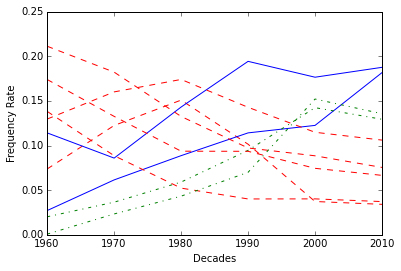

In [40]:
plt.plot(x,y1,'r--')
plt.plot(x,y2,'b-')
plt.plot(x,y3,'g-.')
plt.plot(x,y4,'b-')
plt.plot(x,y5,'r--')
plt.plot(x,yz2,'r--')
plt.plot(x,yz4,'r--')
plt.plot(x,yz6,'g-.')
plt.plot(x,yz8,'r--')
#plt.plot(x,yz9,)
plt.xlabel('Decades')
plt.ylabel('Frequency Rate')
#plt.legend(['y1','y2','y3','y4','y5','yz2','yz4','yz6','yz8','yz9'],loc='best')

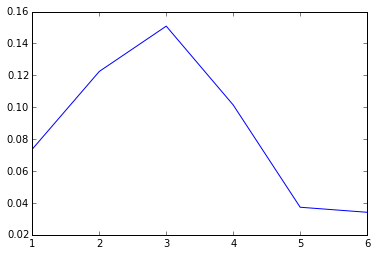

In [8]:
plt.plot(x,y1)

artificial intelligence
das
expert system
level
library
line
microprocessor
operating system
programming language
standard
synchronization
terminal
vlsi

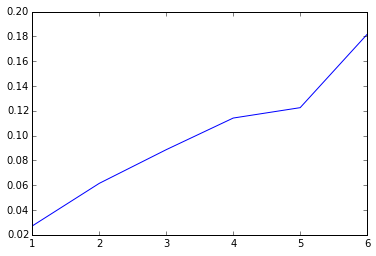

In [9]:
plt.plot(x,y2)

 multiple data
abc
abm
aco
adapters
adaptive learning
adas
adc
additive manufacturing
adms
advanced driver assistance systems
advanced metering infrastructure
advanced technology
affective computing
ahp
aim
ais
amd
amg
ami
amia
amoled
amr
analytical hierarchy process
ansi
applet
appliances
application architecture
application control
application development
application integration
application management
application program
application server
application service provider
asc
ascii
asic
asp
asynchronous transfer mode
augmented reality
authentication service
authorization
automated testing
autonomous system
autonomous vehicles
avatar
avc
avl
backbone
backbone network
backhaul
backplane
balanced scorecard
bam
base station
baseband
batch processing
bcm
benchmarking
bid
bigdata
bimodal
biochips
bioinformatics
biomass
biometric authentication
blob
blog
bluetooth
bluetooth low energy
bookmark
bottleneck
bpa
bpm
bpo
bpr
broadband wireless access
browser
bsc
bsp
bug
bundling
business analytics
business intelligence
business process management
business process modeling
business process outsourcing
bwa
byod
byte
cac
cae
call center
car
carrier frequency
carrier system
cbd
cbr
ccc
ccd
ccm
ccs
cdma2000
cdns
cdr
cec
cellular radio
cgi
change management
channel capacity
checksum
cim
cio
cir
circuit board
circuit switching
cisc
cladding
client
client/server
clipping
cloud computing
cmc
cmp
cms
cns
coaxial cable
cobit
coda
code division multiple access
codec
cold
collaborative commerce
competitive intelligence
compliance
composite application
concentrator
concurrent engineering
conditioning
conductor
configuration management
configure
connection admission control
connectionless
console
consumerization
contact center
content delivery networks
content management
content management systems
content provider
contention
continuous improvement
continuous integration
control charts
control code
cookie
corba
cos
cost optimization
course management
cpa
cpc
cpi
cpm
cpoe
cpr
cps
cpt
cpu
cqi
crc
critical success factor
crl
crm
crowdsourcing
csd
csf
csp
css
cto
customer experience
customer relationship management
cycle time
dab
daemon
dam
darpa
dasd
dashboards
dat
data center
data deduplication
data integration
data replication
data synchronization
data warehouse
dbs
dco
ddm
deep learning
define
demand forecasting
demand response
design thinking
devops
digital business
digital divide
digital forensics
digital network
digital rights management
digital signature
digital subscriber line
digital watermarking
digitalization
digitization
directory services
disaster recovery
discrete manufacturing
discussion forum
distributed antenna system
distributed data management
distributed database management system
distributed function
distributed generation
distributed resource management
dlp
dmb
document management
domain name
download
downtime
dpi
drm
dsl
dsm
dsr
dtc
dual mode
dynamic content
dynamic routing
eap
ecm
eda
ehr
electronic health record
electronic signature
emotion detection
encapsulation
energy management systems
enterprise applications
enterprise architecture
enterprise content management
enterprise portal
enterprise resource planning
erp
esp
eta
ethernet
etsi
eye tracking
fcc
fdd
fddi
federated identity management
federated search
femtocell
femtocells
file server
firewall
fixed wireless
flexible manufacturing system
fmea
fms
folksonomies
folksonomy
framing
fraud detection
frequency band
frequency modulation
frequency reuse
ftp
ftth
fuel cell
galileo
gamification
gateway
gaze control
generation scheduling
geo
geofencing
geographic information system
geostationary satellite
gesture control
gesture recognition
global positioning system
gps
granularity
graphical user interface
gray scale
grid computing
ground segment
groupware
guard interval
gui
handwriting recognition
haptics
health information exchange
heterogeneous architecture
hipaa
hit
hot spot
hpc
html
html5
hub
hybrid electric vehicles
hybrid modeling
hyperlink
iaas
ian
ida
idl
idm
ids
image recognition
information architecture
information delivery
information engineering
information management
innovation management
input/output
inspect
instant messaging
integrated development environment
integrated software
intellectual property
interactive visualization
internet protocol
internet service provider
internet telephony
intranet
introspection
ip address
ip multimedia subsystem
ip telephony
ipa
iphone
iptv
ipv6
isdn
iso
iso 9000
isp
it operations
it risk
it strategy
itg
itil
itu
ivr
java applet
java me
java platform
java platform
javascript
jit
job scheduling
kanban
key performance indicator
knowledge assets
knowledge capture
knowledge management
knowledge map
knowledge organization
knowledge sharing
knowledge use
kpi
lbm
lbs
lcd
lcr
ldap
lean
led
leo
license
line balancing
linux
liquid crystal display
lng
load forecasting
loopback
low earth orbit
low frequency
m2m communications
magnetometer
mainframe
mainframe
manufacturer
manufacturing execution system
manufacturing planning
mapreduce
mashup
mashups
mcm
mda
media access control
media objects
memristor
mesh network
message authentication
message authentication code
message passing
messaging
microblogging
microcode
microgrid
microgrids
mips
mms
mobile advertising
mobile im
mobile ip
mobile middleware
mobile network
mobile payment
mobile social networks
mobile tv
mooc
motion jpeg
moves
mpeg
mps
mso
msp
mss
multicore processor
multipoint
multitenancy
multithreading
multitouch
nanotube
nas
near field communication
network access control
network computer
network computing
network database
network function virtualization
network management
network operating system
network security
network topology
network virtualization
nfc
nfv
nlp
nmos
noc
node b
notebook
oasis
object class
odp
oled
open source
openstack
optical transport
paas
packet switching
pacs
pad
pal
pam
pas
pat
pbx
pcm
pcs
pda
pdc
pde
pdm
penetration testing
perfection
performance management
personal cloud
personal digital assistant
personal health record
phase change memory
phr
picocell
pim
pki
plc
plm
podcast
podcasting
pop
portal
portfolio management
porting
ppm
predictive analytics
predictive modeling
private key
prm
process control
process management
product catalog
product data management
programmable logic controller
project management
protocol stack
proxy servers
psa
psk
public key
pull
pulse width modulation
pwm
qam
qr codes
quadrature amplitude modulation
quality assurance
quantum computer
rack
rad
raid
rapid application development
ras
rcs
rdbms
real time
records management
regulatory compliance
relational database management system
relational dbms
repository
response time
revenue
rf power amplifiers
rfid reader
rfid tags
ria
rich internet application
risc
roaming
roc
roi
rsa
rtt
rvm
saas
sac
san
satellite communications
sax
scada
scalability
scanner
scm
scr
scrambler
screening
sdk
sdma
sdn
sdr
search engine
secret key
selector
semantic data model
service levels
session initiation protocol
sfdr
sfm
shim
shipments
short message service
sideband
siem
signature verification
sink
sip
six sigma
sla
slm
smart antenna
smart card
smart grid
smartphone
smb
sme
smp
sms
smtp
sna
sniffer
snmp
snomed
soa
soap
soc
social computing
social content
social media
social network analysis
social networking
social networking sites
social search
social software
social systems
social tagging
social technologies
social web
sockets
software configuration management
software defined networking
software maintenance
sonet
source routing
space segment
spam
spc
spec
spider
spoofing
spp
spread spectrum
sql
srm
ssl
sso
ssp
statistical multiplexing
statistical process control
stickiness
stm
street
structural change
subnet
subscriber
supply chain management
supply chain planning
swap
swift
switched line
switched network
switchover
symbian
synchronous network
synchronous transfer mode
system integration
system management
tacit knowledge
tcp/ip
tdm
tdma
tdr
telco
telecommunications services
telematics
text analytics
text mining
text retrieval
time out
tlm
tlp
tls
tms
tokenization
transceiver
transducer
transmedia
transmission control protocol
transparency
transponder
tsvs
tunneling
ultracapacitors
url
van
var
variable bit rate
vba
vbr
vdsl
vendor
videoconferencing
virtual channel
virtual machine
virtual private network
virtual reality
virtualization
visual basic
vlan
vod
voicexml
voip
vpn
vrml
vsat
vsm
w3c
wafer
wam
wap
wasp
waste
wave power
wcdma
wearable computer
web analytics
web content management
web crawler
web server
website
wep
wibro
wiki
wimax
windowing
wireless broadband
wireless power
wlan
work management
workflow management
workstations
wpa
xbrl
xsl
xslt
zigbee

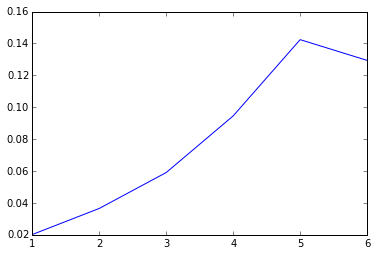

In [10]:
plt.plot(x,y3)

cell
clustering
cmos
component
composition
content
context
edge
event
internet
kernel
multimedia
protocol
spectrum
visualization

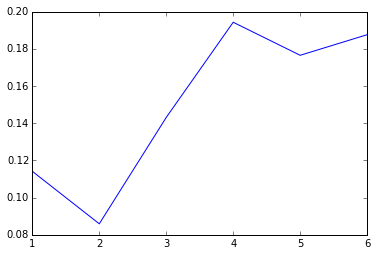

In [11]:
plt.plot(x,y4)

act i
analytics
atm
attenuation
availability
band
bandwidth
binary code
bit
broadband
broadcast
buffer
burst
business process
c++
cache
cdma
clock
cognitive radio
collective
commercial
communities
community
connection
core
data mining
database design
database management system
dbms
deployment
distributed computing
distributed database
downlink
encryption
fuzzy logic
gis
hypertext
i/o
ieee
information technology
interoperability
java
knowledge base
knowledge representation
lan
laser
latency
lisp
load balancing
machine learning
metadata
metalanguage
middleware
multiplexing
organizational
overlay
p2p
page
parallel processing
qos
regulatory
reuse
rfid
scattering
signature
simd
simplex
site
software development
speech recognition
standards
step
streaming
subjective
switch
synchronous
tcp
term
throughput
translator
tuning
web services
xml

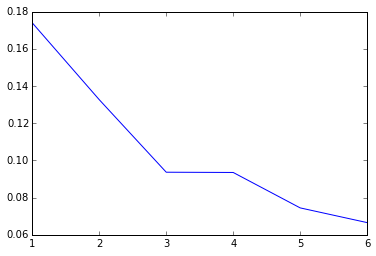

In [12]:
plt.plot(x,y5)

circuit
class
drum
frequency
integration
modulation
presence
redundancy
reliability
specification
strategy
syntax

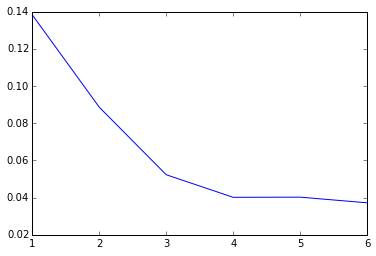

In [13]:
plt.plot(x,yz2)

channel
structure
switching

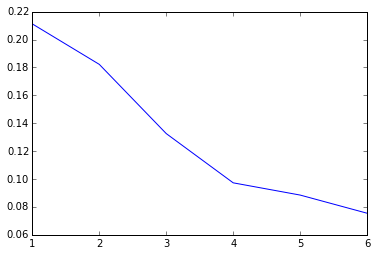

In [14]:
plt.plot(x,yz4)

digital
information

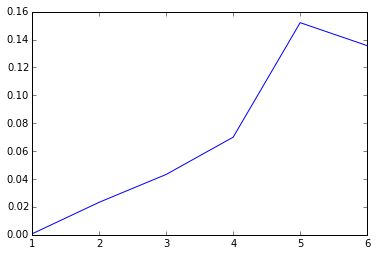

In [399]:
plt.plot(x,yz6)

architecture
framework
mobile
web

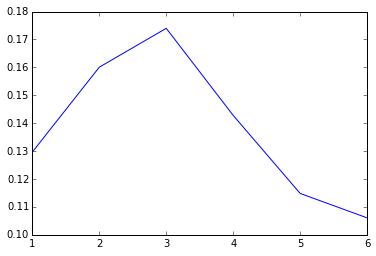

In [400]:
plt.plot(x,yz8)

network
processing
simulation

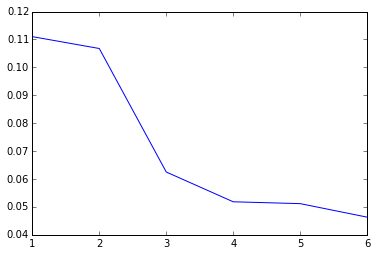

In [401]:
plt.plot(x,yz9)

application
solution

#K=12 

In [375]:
xx=[1,2,3,4,5,6,7,8]
yy1=[0.00000000,0.00000000,0.01940994,0.03975045,0.06396910,0.08429853,0.08122021,0.11425868]
yy2=[0.00000000,0.00000000,0.04347826,0.04420677,0.04880117,0.08613664,0.10950750,0.15196729]
yy3=[0.00000000,0.03389831,0.02251553,0.03475936,0.10325498,0.10702026,0.03173322,0.03350977]
yy4=[0.00000000,0.00000000,0.01552795,0.02317291,0.04149984,0.05184365,0.12381694,0.11729309]

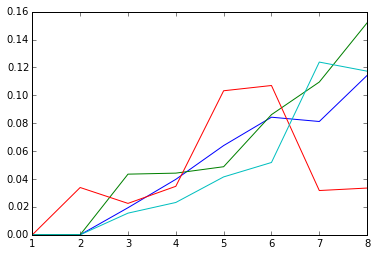

In [376]:
plt.plot(xx,yy1)
plt.plot(xx,yy2)
plt.plot(xx,yy3)
plt.plot(xx,yy4)
#plt.plot(x,y5)

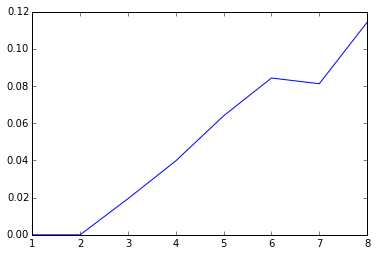

In [377]:
plt.plot(xx,yy1)

 multiple data
abc
abm
aco
adapters
adaptive learning
adas
additive manufacturing
adms
advanced driver assistance systems
advanced metering infrastructure
advanced technology
affective computing
ahp
aim
ais
amd
amg
ami
amia
amoled
amr
analytical hierarchy process
ansi
applet
appliances
application architecture
application control
application development
application integration
application management
application program
application server
application service provider
asc
ascii
asic
asp
asynchronous transfer mode
authentication service
automated testing
autonomous system
autonomous vehicles
avatar
avc
avl
backbone
backbone network
backhaul
backplane
balanced scorecard
bam
base station
baseband
batch processing
bcm
bid
bigdata
bimodal
biochips
biomass
biometric authentication
blob
blog
bluetooth
bluetooth low energy
bookmark
bottleneck
bpa
bpm
bpo
bpr
broadband wireless access
browser
bsc
bsp
bug
bundling
business analytics
business intelligence
business process management
business process modeling
business process outsourcing
bwa
byod
byte
cac
cae
call center
carrier frequency
carrier system
cbd
cbr
ccc
ccd
ccm
ccs
cdma2000
cdns
cdr
cec
cellular radio
cgi
change management
checksum
cim
cio
cir
circuit switching
cisc
cladding
client
client/server
clipping
cmc
cmp
cms
cns
coaxial cable
cobit
coda
code division multiple access
codec
cold
collaborative commerce
competitive intelligence
composite application
concentrator
concurrent engineering
conditioning
conductor
configuration management
configure
connection admission control
connectionless
console
consumerization
contact center
content delivery networks
content management
content management systems
content provider
continuous improvement
continuous integration
control charts
control code
cookie
corba
cos
cost optimization
course management
cpa
cpc
cpi
cpm
cpoe
cpr
cps
cpt
cqi
crc
critical success factor
crl
crm
csd
csf
csp
css
cto
customer experience
customer relationship management
cycle time
dab
daemon
dam
darpa
dasd
dashboards
dat
data deduplication
data integration
data replication
data synchronization
data warehouse
dbs
dco
ddm
deep learning
define
demand forecasting
demand response
design thinking
devops
digital business
digital divide
digital forensics
digital network
digital rights management
digital signature
digital subscriber line
digital watermarking
digitalization
digitization
directory services
disaster recovery
discrete manufacturing
discussion forum
distributed antenna system
distributed data management
distributed database management system
distributed function
distributed generation
distributed resource management
dlp
dmb
document management
domain name
download
downtime
dpi
drm
dsl
dsm
dsr
dtc
dual mode
dynamic content
dynamic routing
eap
ecm
eda
ehr
electronic health record
electronic signature
emotion detection
encapsulation
energy management systems
enterprise applications
enterprise architecture
enterprise content management
enterprise portal
enterprise resource planning
esp
eta
etsi
eye tracking
fcc
fdd
fddi
federated identity management
federated search
femtocell
femtocells
file server
firewall
fixed wireless
flexible manufacturing system
fmea
fms
folksonomies
folksonomy
framing
fraud detection
frequency band
frequency modulation
frequency reuse
ftp
ftth
fuel cell
galileo
gamification
gaze control
generation scheduling
geo
geofencing
geographic information system
geostationary satellite
gesture control
gesture recognition
global positioning system
granularity
graphical user interface
gray scale
grid computing
ground segment
groupware
guard interval
gui
handwriting recognition
haptics
health information exchange
heterogeneous architecture
hipaa
hit
hot spot
hpc
html
html5
hub
hybrid electric vehicles
hybrid modeling
hyperlink
iaas
ian
ida
idl
idm
ids
image recognition
information architecture
information delivery
information engineering
innovation management
input/output
inspect
instant messaging
integrated development environment
integrated software
intellectual property
interactive visualization
internet protocol
internet service provider
internet telephony
intranet
introspection
ip address
ip multimedia subsystem
ip telephony
ipa
iphone
iptv
iso
iso 9000
isp
it operations
it risk
it strategy
itg
itil
itu
ivr
java applet
java me
java platform
java platform
javascript
jit
job scheduling
kanban
key performance indicator
knowledge assets
knowledge capture
knowledge map
knowledge organization
knowledge sharing
knowledge use
kpi
lbm
lbs
lcd
lcr
ldap
lean
led
leo
license
line balancing
linux
liquid crystal display
lng
load forecasting
loopback
low earth orbit
low frequency
m2m communications
magnetometer
mainframe
mainframe
manufacturer
manufacturing execution system
manufacturing planning
mashup
mashups
mcm
mda
media access control
media objects
memristor
message authentication
message authentication code
message passing
messaging
microblogging
microcode
microgrid
microgrids
mips
mms
mobile advertising
mobile im
mobile ip
mobile middleware
mobile payment
mobile social networks
mobile tv
mooc
motion jpeg
moves
mpeg
mps
mso
msp
mss
multicore processor
multipoint
multitenancy
multithreading
multitouch
nanotube
nas
near field communication
network access control
network computer
network computing
network database
network function virtualization
network operating system
network security
network topology
network virtualization
nfc
nfv
nlp
nmos
noc
node b
notebook
oasis
object class
odp
oled
open source
openstack
optical transport
paas
pacs
pad
pal
pam
pas
pat
pbx
pcs
pda
pdc
pde
pdm
penetration testing
perfection
performance management
personal cloud
personal digital assistant
personal health record
phase change memory
phr
picocell
pim
pki
plc
plm
podcast
podcasting
pop
portfolio management
porting
ppm
predictive analytics
predictive modeling
private key
prm
process management
product catalog
product data management
programmable logic controller
project management
protocol stack
proxy servers
psa
psk
public key
pull
pulse width modulation
pwm
qam
qr codes
quadrature amplitude modulation
quality assurance
quantum computer
rack
rad
raid
rapid application development
ras
rcs
rdbms
real time
records management
regulatory compliance
relational database management system
relational dbms
revenue
rf power amplifiers
rfid reader
rfid tags
ria
rich internet application
risc
roaming
roc
roi
rsa
rtt
rvm
saas
sac
san
satellite communications
sax
scada
scanner
scm
scr
scrambler
sdk
sdma
sdn
sdr
secret key
selector
semantic data model
service levels
session initiation protocol
sfdr
sfm
shim
shipments
short message service
sideband
siem
signature verification
sink
sip
six sigma
sla
slm
smart antenna
smart card
smb
sme
smp
sms
smtp
sna
sniffer
snmp
snomed
soap
social computing
social content
social network analysis
social networking
social networking sites
social search
social software
social systems
social tagging
social technologies
social web
sockets
software configuration management
software defined networking
software maintenance
sonet
source routing
space segment
spc
spec
spider
spoofing
spp
spread spectrum
srm
ssl
sso
ssp
statistical multiplexing
statistical process control
stickiness
stm
street
structural change
subnet
subscriber
supply chain management
supply chain planning
swap
swift
switched line
switched network
switchover
symbian
synchronous network
synchronous transfer mode
system integration
system management
tacit knowledge
tcp/ip
tdm
tdma
tdr
telco
telecommunications services
telematics
text analytics
text mining
text retrieval
time out
tlm
tlp
tls
tms
tokenization
transducer
transmedia
transmission control protocol
transparency
transponder
tsvs
tunneling
ultracapacitors
url
var
variable bit rate
vba
vbr
vdsl
vendor
videoconferencing
virtual channel
virtual private network
visual basic
vlan
vod
voicexml
vpn
vrml
vsat
vsm
w3c
wafer
wam
wap
wasp
waste
wave power
wcdma
wearable computer
web analytics
web content management
web crawler
web server
website
wep
wibro
wiki
windowing
wireless broadband
wireless power
workflow management
wpa
xbrl
xsl
xslt
zigbee

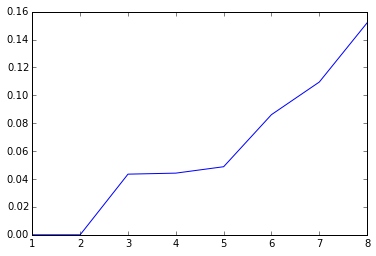

In [378]:
plt.plot(xx,yy2)

adc
analytics
attenuation
augmented reality
authorization
availability
band
benchmarking
bioinformatics
broadband
burst
business process
c++
car
cdma
channel capacity
circuit board
clock
cloud computing
cognitive radio
collective
compliance
contention
cpu
crowdsourcing
data center
data mining
deployment
downlink
erp
ethernet
fuzzy logic
gateway
gis
gps
information management
interoperability
ipv6
isdn
knowledge management
lan
laser
latency
load balancing
machine learning
mapreduce
mesh network
metadata
middleware
mobile network
multiplexing
network management
overlay
packet switching
page
pcm
portal
process control
regulatory
repository
response time
reuse
scalability
scattering
screening
search engine
simd
simplex
site
smart grid
smartphone
soa
soc
social media
spam
sql
subjective
tcp
transceiver
tuning
van
virtual machine
virtual reality
virtualization
voip
web services
wimax
wlan
work management
workstations

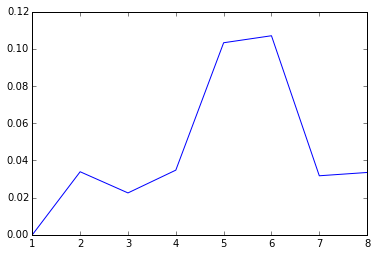

In [379]:
plt.plot(xx,yy3)

act i
atm
buffer
commercial
connection
database design
database management system
dbms
distributed computing
distributed database
edge
hypertext
i/o
information technology
knowledge base
knowledge representation
lisp
metalanguage
microprocessor
organizational
software development
speech recognition
standards
step
term

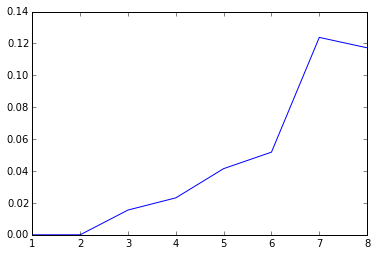

In [380]:
plt.plot(xx,yy4)


broadcast
cache
cell
cmos
communities
community
component
composition
content
encryption
event
ieee
java
kernel
p2p
qos
rfid
signature
spectrum
streaming
throughput
xml